# 🏥 UbuntuCare Smarter Wait Times

## 📊 Overview
Synthetic dataset of ~250,000 patient visits simulating the overburdened South African public healthcare system with realistic patterns and systemic flaws.

## 📋 Feature Dictionary

| Feature Name | Description |
|--------------|-------------|
| **Patient_ID** | 👤 Unique patient identifier with some duplicates |
| **Province** | 🗺️ South African province where facility is located |
| **Facility_Name** | 🏢 Healthcare facility name with variations |
| **Age** | 🎂 Patient age in years with bimodal distribution |
| **Gender** | ⚧️ Patient gender identification |
| **Race_Demographic** | 🌍 Racial demographic classification |
| **Chief_Complaint** | 🤒 Primary reason for visit in free-text |
| **ICD-10_Code** | 📋 Medical classification code |
| **Triage_Category** | 🚨 Emergency severity assessment (SATS Colors) |
| **Department** | 🏥 Healthcare department visited |
| **Arrival_Date_Time** | ⏰ Date and time of patient arrival |
| **Day_of_Week** | 📅 Day of the week of visit |
| **Season** | 🌸 Seasonal period of visit |
| **Waiting_Time_Minutes** | ⏳ Time spent waiting for care (target variable) |
| **Outcome** | 📝 Final disposition of patient visit |
| **Insurance_Status** | 💰 Healthcare payment method |
| **Employment_Status** | 💼 Patient employment status |
| **Urban_Rural** | 🏙️ Geographic classification |
| **Facility_Referral_ID** | 🔄 Referral tracking identifier |
| **Follow_Up_Flag** | 📞 Follow-up requirement status |

## 🔑 Key Realistic Patterns

### 👥 Demographic Patterns
- Bimodal age distribution 👶👩‍💼
- Racial distribution reflects SA demographics
- Geographic weighting toward Gauteng and KZN

### 🏥 Medical Patterns
- HIV/TB burden 🦠 in adult patients
- Maternal health 🤰 focus for young women
- Chronic diseases 💊 in older patients
- Seasonal variations ❄️ with winter respiratory cases

### ⚡ Systemic Patterns
- Trauma patterns 🚑 on weekends in academic hospitals
- Overcrowding effects 🚶‍♂️🚶‍♂️🚶‍♂️ leading to absconding
- Waiting time determinants ⏰ based on multiple factors

## 🎯 Potential Use Cases
1. Predictive Modeling 🔮
2. Resource Allocation Analysis 📊
3. Healthcare Equity Research ⚖️
4. Seasonal Trend Analysis 📈
5. Data Quality Assessment ✅

## 🎲 Data Generation
Synthetically created using probabilistic rules mimicking real-world SA healthcare patterns with realistic relationships between features.


In [1]:
# IMPORT NECESSARY LIBRARIES
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as ticker
from scipy import stats

In [2]:
# ======================================
# PANDAS & SEABORN CONFIGURATION
# ======================================

# ----- PANDAS DISPLAY SETTINGS -----
# Display all columns and rows without truncation
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 100)  # Limit rows to avoid excessive output
pd.set_option('display.width', 1000)    # Adjust display width for better readability
pd.set_option('display.colheader_justify', 'center')  # Center-align headers

# Floating-point precision (2 decimal places)
pd.options.display.float_format = '{:,.2f}'.format  # Adds thousand separators

# Improve performance with larger datasets
pd.set_option('compute.use_numexpr', True)  # Faster numerical operations
pd.set_option('mode.chained_assignment', 'warn')  # Warn on chained assignments

# ----- SEABORN & MATPLOTLIB STYLING -----
# Set a modern and clean style
sns.set_theme(
    style="whitegrid",  # Background grid for better readability
    context="notebook",  # Optimize for notebook display
    palette="deep",      # Aesthetic color palette
    font="sans-serif",   # Clean font
    font_scale=1.1,      # Slightly larger font size
    rc={
        'figure.figsize': (10, 6),  # Default figure size
        'axes.titlesize': 16,       # Title font size
        'axes.labelsize': 14,        # Axis label size
        'xtick.labelsize': 12,      # X-tick label size
        'ytick.labelsize': 12,       # Y-tick label size
        'grid.alpha': 0.3,          # Grid transparency
        'grid.color': "0.9",        # Light grid color
    }
)

# Improve matplotlib defaults
plt.rcParams['figure.dpi'] = 100      # Higher resolution for figures
plt.rcParams['savefig.dpi'] = 300     # High DPI for saved figures
plt.rcParams['lines.linewidth'] = 2   # Thicker plot lines
plt.rcParams['axes.edgecolor'] = '0.15'  # Softer axis edge color

# Disable scientific notation for small numbers
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)   # Suppress scientific notation in NumPy




# Suppress unnecessary warnings (optional)
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# Keep important warnings
warnings.filterwarnings('always', category=DeprecationWarning)

In [3]:
# ======================================
# LOAD DATA

data_folder = r"G:\Study\DATA SCINCE\PROJECTS\POTFOLIO\UbuntuCare Smarter Wait Times & Outcomes\06_Data\Cleaned and Processed Data"
file_name = "cleaned_emergency_data_20250916_174258.parquet"

try:
    # Read the Parquet file
    df = pd.read_parquet(f"{data_folder}\\{file_name}")
    print(f"Shape: {df.shape} (Rows: {df.shape[0]}, Columns: {df.shape[1]})")
    print("Data loaded successfully.")
    display(df.head())

    # Display basic info about the dataframe
    print('\n DataFrame Info:')
    display(df.info())

    # missing values summary
    print("\n Missing Values:")
    missing = df.isna().sum().to_frame(name='Missing Values')
    missing['missing %'] = (missing['Missing Values'] / len(df))*100
    display(missing.sort_values(by='missing %', ascending=False))

except FileNotFoundError:
    print("Parquet file not found. Please check the file path.")    
except Exception as e:
    print(f"Error reading Parquet file: {e}")


Shape: (250000, 36) (Rows: 250000, Columns: 36)
Data loaded successfully.


Province                 Facility_Name                Age  Gender  Race_Demographic Chief_Complaint ICD-10_Code Triage_Category  Department  Day_of_Week  Season  Waiting_Time_Minutes         Outcome         Insurance_Status Employment_Status Urban_Rural    Follow_Up_Flag     SATS_Score  Respiratory_Rate  Heart_Rate  Oxygen_Saturation  Latitude  Longitude Facility_Capacity Staffing_Level  Visit_Number Age_Category   Arrival_DateTime   Arrival_Year  Arrival_Month  Arrival_Day  Arrival_Hour  Arrival_Minute  Arrival_Weekday  Arrival_DayOfYear  Arrival_Quarter
0   Eastern Cape        Nelson Mandela Academic Hospital 29.00     Male     Coloured       Fractured Arm       R69         Green        Antenatal      Sunday  Spring         306.00         Treated and Discharged     Gov Subsidy       Employed         Urban           No follow-up    10.00          12.00            0.00         98.00          -31.41    27.14            High           Normal           1         18-29     2022-10-05 08:15:00      2022           10             5             8             15               2                278                4       
1  KwaZulu-Natal       Prince Mshiyeni Memorial Hospital 81.00     Male        Black       Cough & Fever     A15.0           Red      Paediatrics   Wednesday  Winter          41.00               Admitted to Ward     Gov Subsidy        Retired         Urban           No follow-up     2.00          40.00          158.00         81.00          -28.84    29.05          Medium          Reduced           1         80-89     2022-08-28 14:44:00      2022            8            28            14             44               6                240                3       
2  KwaZulu-Natal  Inkosi Albert Luthuli Central Hospital  3.00   Female        Black       Cough & Fever     J18.9           Red      Paediatrics    Thursday  Winter          22.00               Admitted to Ward     Medical Aid        Student         Urban           No follow-up     1.00          40.00          123.00         77.00          -26.92    29.61            High          Reduced           1          0-17     2023-06-26 00:00:00      2023            6            26             0              0               0                177                2       
3   Western Cape                           Gugulethu CHC  5.00     Male        Black               Burns       R69          Blue              OPD    Thursday  Summer        1087.50                      Absconded     Gov Subsidy        Student         Rural           No follow-up    12.00          33.00            0.00         98.00          -35.02    16.65             Low          Limited           1          0-17     2023-01-30 16:17:00      2023            1            30            16             17               0                 30                1       
4   Eastern Cape                          Frere Hospital  4.00  Unknown        Black       Cough & Fever       R05        Yellow      Paediatrics      Friday  Winter         137.00               Admitted to Ward   Out-of-Pocket        Student         Urban    Follow-up scheduled     8.00          37.00          113.00         95.00          -33.98    24.41          Medium          Reduced           1          0-17     2022-08-30 06:23:00      2022            8            30             6             23               1                242                3


 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Province              250000 non-null  category      
 1   Facility_Name         250000 non-null  object        
 2   Age                   250000 non-null  float64       
 3   Gender                250000 non-null  object        
 4   Race_Demographic      250000 non-null  category      
 5   Chief_Complaint       250000 non-null  object        
 6   ICD-10_Code           250000 non-null  category      
 7   Triage_Category       250000 non-null  object        
 8   Department            250000 non-null  object        
 9   Day_of_Week           250000 non-null  object        
 10  Season                250000 non-null  category      
 11  Waiting_Time_Minutes  250000 non-null  float64       
 12  Outcome               250000 non-null  c

None


 Missing Values:


Missing Values  missing %
Province                     0          0.00   
Facility_Name                0          0.00   
Age                          0          0.00   
Gender                       0          0.00   
Race_Demographic             0          0.00   
Chief_Complaint              0          0.00   
ICD-10_Code                  0          0.00   
Triage_Category              0          0.00   
Department                   0          0.00   
Day_of_Week                  0          0.00   
Season                       0          0.00   
Waiting_Time_Minutes         0          0.00   
Outcome                      0          0.00   
Insurance_Status             0          0.00   
Employment_Status            0          0.00   
Urban_Rural                  0          0.00   
Follow_Up_Flag               0          0.00   
SATS_Score                   0          0.00   
Respiratory_Rate             0          0.00   
Heart_Rate                   0          0.00   
Oxygen_Saturation            0          0.00   
Latitude                     0          0.00   
Longitude                    0          0.00   
Facility_Capacity            0          0.00   
Staffing_Level               0          0.00   
Visit_Number                 0          0.00   
Age_Category                 0          0.00   
Arrival_DateTime             0          0.00   
Arrival_Year                 0          0.00   
Arrival_Month                0          0.00   
Arrival_Day                  0          0.00   
Arrival_Hour                 0          0.00   
Arrival_Minute               0          0.00   
Arrival_Weekday              0          0.00   
Arrival_DayOfYear            0          0.00   
Arrival_Quarter              0          0.00

### ** DATA CLEANING & PREPROCESSING:** Completed in the Data Cleaning Notebook

# UbuntuCare Smarter Wait Times – Exploratory Data Analysis

## Overview
This exploratory data analysis examines patient wait time data for UbuntuCare healthcare facilities. The analysis aims to identify patterns, trends, and potential areas for improvement in patient wait times.

## Objectives
- Understand the distribution of wait times across different facilities  
- Identify factors contributing to longer wait times  
- Compare performance between different healthcare facilities  
- Discover temporal patterns in patient wait times  
- Find opportunities for improving patient experience


In [4]:
def describe(dataframe):
    """
    Generate a comprehensive descriptive statistics report for a DataFrame.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame to analyze.
    
    Returns:
    dict: A dictionary containing descriptive statistics for numeric and categorical columns.
    """
    report = {}
    
    # Numeric columns
    print('\n Descriptive Statistics Report for Numeric Columns:')
    numeric_stats = dataframe.describe().T
    display(numeric_stats)
    report['numeric'] = numeric_stats
    
    # Categorical columns
    print('\n Descriptive Statistics Report for Categorical Columns:')
    categorical_stats = dataframe.describe(include=['object','category']).T
    display(categorical_stats)
    report['categorical'] = categorical_stats
    
    return report
report = describe(df)



 Descriptive Statistics Report for Numeric Columns:


count                mean                      min                  25%                  50%                  75%                  max           std  
Age                  250000.00                          25.61                 1.00                 4.00                25.00                33.00                90.00  21.65
Waiting_Time_Minutes 250000.00                         347.93                 1.00               105.00               265.00               498.00              1087.50 301.76
SATS_Score           250000.00                           8.94                 1.00                 7.00                10.00                11.00                12.00   2.61
Respiratory_Rate     250000.00                          25.06                 0.00                20.00                24.00                30.00                40.00   8.44
Heart_Rate           250000.00                         105.44                 0.00                92.00               106.00               120.00               180.00  25.45
Oxygen_Saturation    250000.00                          96.36                70.00                95.00                98.00                99.00               100.00   4.49
Latitude             250000.00                         -28.31               -35.72               -30.81               -27.41               -25.76               -20.90   3.54
Longitude            250000.00                          27.30                16.62                26.81                28.29                29.78                32.90   4.14
Visit_Number         250000.00                           1.06                 1.00                 1.00                 1.00                 1.00                 4.00   0.25
Arrival_DateTime        250000  2022-12-31 18:24:58.047839488  2022-01-01 00:00:00  2022-07-12 02:33:15  2023-01-01 12:00:00  2023-06-23 05:00:00  2023-12-30 23:56:00    NaN
Arrival_Year         250000.00                        2022.52              2022.00              2022.00              2023.00              2023.00              2023.00   0.50
Arrival_Month        250000.00                           6.25                 1.00                 3.00                 6.00                 9.00                12.00   3.57
Arrival_Day          250000.00                          15.00                 1.00                 7.00                15.00                23.00                31.00   9.14
Arrival_Hour         250000.00                          11.32                 0.00                 5.00                12.00                17.00                23.00   6.94
Arrival_Minute       250000.00                          22.49                 0.00                 1.00                20.00                40.00                59.00  19.65
Arrival_Weekday      250000.00                           3.15                 0.00                 1.00                 3.00                 5.00                 6.00   2.05
Arrival_DayOfYear    250000.00                         173.86                 1.00                77.00               174.00               269.00               365.00 109.90
Arrival_Quarter      250000.00                           2.43                 1.00                 1.00                 2.00                 3.00                 4.00   1.14


 Descriptive Statistics Report for Categorical Columns:


count  unique                top                  freq 
Province           250000    5                             Gauteng   87626
Facility_Name      250000   35    Nelson Mandela Academic Hospital   14591
Gender             250000    5                                Male  129488
Race_Demographic   250000    5                               Black  189180
Chief_Complaint    250000   28                       Cough & Fever   51455
ICD-10_Code        250000   29                                 R69  126251
Triage_Category    250000    6                               Green  111064
Department         250000   11                         Paediatrics   61328
Day_of_Week        250000    7                            Thursday   35986
Season             250000    4                              Winter   63447
Outcome            250000    6              Treated and Discharged  100958
Insurance_Status   250000    4                         Gov Subsidy  137894
Employment_Status  250000    5                             Student   97895
Urban_Rural        250000    2                               Urban  190424
Follow_Up_Flag     250000    3                        No follow-up  137577
Facility_Capacity  250000    5                              Medium  101645
Staffing_Level     250000    3                             Reduced  157283
Age_Category       250000    9                              18-29    86807

##   1. Target Variable Exploration

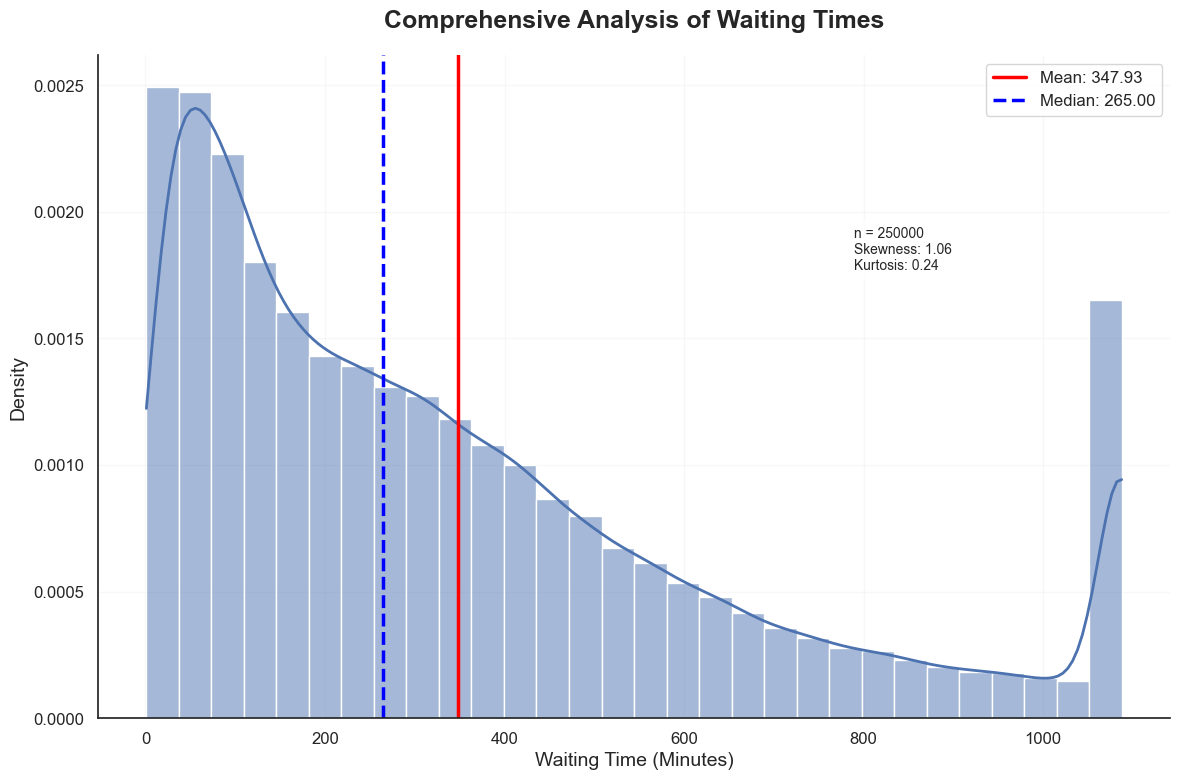

In [5]:

plt.figure(figsize=(12, 8))

# Create the main histogram with a tighter-fitting KDE
ax = sns.histplot(data=df, x='Waiting_Time_Minutes', bins=30, kde=True, stat='density')

# Calculate key statistics
mean_val = df['Waiting_Time_Minutes'].mean()
median_val = df['Waiting_Time_Minutes'].median()


# Add lines for mean
plt.axvline(mean_val, color='red', linestyle='-', linewidth=2.5, label=f'Mean: {mean_val:.2f}')
# Add lines for median
plt.axvline(median_val, color='blue', linestyle='--', linewidth=2.5, label=f'Median: {median_val:.2f}')


# Add a text box with statistics
stats_text = f"""n = {len(df)}
Skewness: {df['Waiting_Time_Minutes'].skew():.2f}
Kurtosis: {df['Waiting_Time_Minutes'].kurtosis():.2f}"""
plt.gcf().text(0.72, 0.65, stats_text, bbox=dict(facecolor='white', alpha=0.8), fontsize=10)

plt.title('Comprehensive Analysis of Waiting Times', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Waiting Time (Minutes)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

## 2. Demographic Analysis

### **Age & Age_Category**
- Analyze whether younger or older patients experience longer wait times

### **Gender**
- Compare wait times between male and female patients

### **Race_Demographic**
- Examine wait times across different racial groups to assess equity in healthcare access



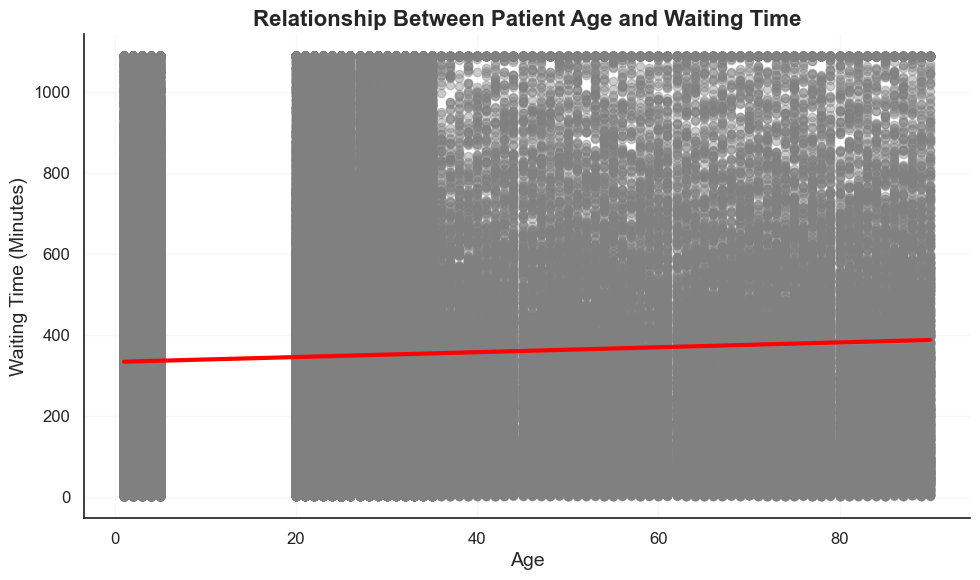

Pearson Correlation Coefficient between Age and Waiting Time: 0.043


In [6]:
plt.figure(figsize=(10, 6))

# Create a scatter plot with a regression line
sns.regplot(data=df, x='Age', y='Waiting_Time_Minutes', 
            scatter_kws={'alpha':0.4, 'color':'gray'}, 
            line_kws={'color':'red'}, 
            lowess=False) # Set lowess=True for a non-linear LOESS line

plt.title('Relationship Between Patient Age and Waiting Time', fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Waiting Time (Minutes)')
sns.despine()
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = df['Age'].corr(df['Waiting_Time_Minutes'])
print(f"Pearson Correlation Coefficient between Age and Waiting Time: {correlation:.3f}")

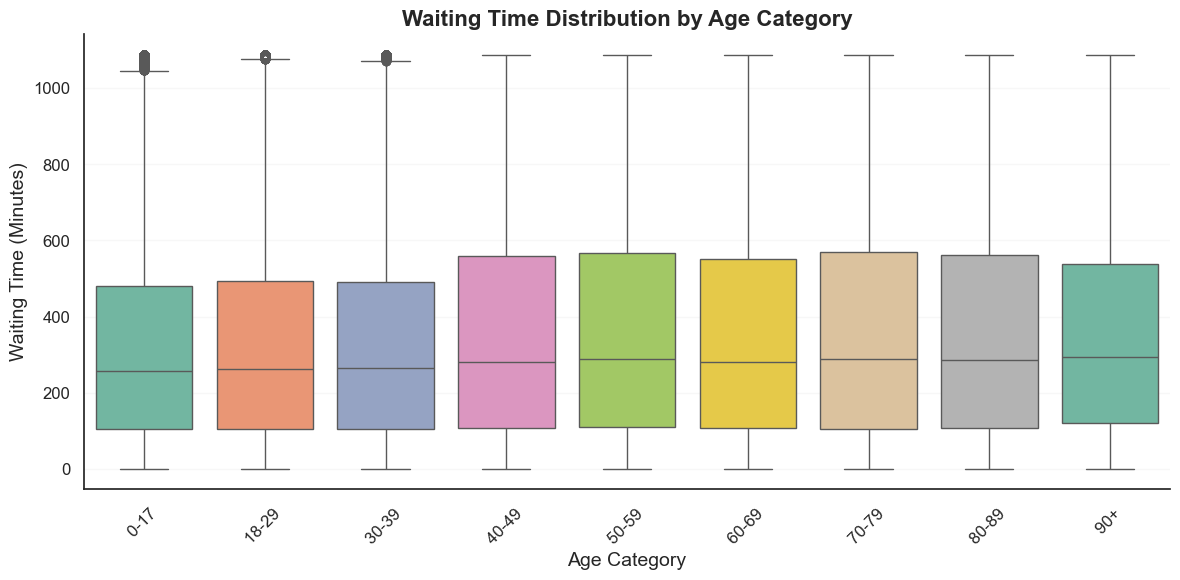

Summary Statistics by Age Group:
              mean   median  count   std 
Age_Category                             
0-17         337.53  258.00  80966 292.69
18-29        344.45  263.00  86807 298.09
30-39        343.69  264.00  41255 297.87
40-49        377.99  282.00   7969 325.53
50-59        382.63  288.00   8012 329.67
60-69        375.86  282.00   7971 325.65
70-79        383.81  288.00   8200 331.62
80-89        381.30  287.00   8031 328.44
90+          368.86  294.00    789 304.68


Levene's Test (for equal variance): p-value = 0.0000
Kruskal-Wallis H-test p-value: 0.0000
=> There is a statistically significant difference in waiting times between at least two age groups.


In [7]:
plt.figure(figsize=(12, 6))

# Create a boxplot to show distribution per category
ax = sns.boxplot(data=df, x='Age_Category', y='Waiting_Time_Minutes', palette='Set2')
plt.title('Waiting Time Distribution by Age Category', fontsize=16, fontweight='bold')
plt.xlabel('Age Category')
plt.ylabel('Waiting Time (Minutes)')
plt.xticks(rotation=45) # Rotate labels if they are long
sns.despine()
plt.tight_layout()
plt.show()

# --- Statistical Summary and Testing ---
# 1. Summary Statistics
age_group_stats = df.groupby('Age_Category')['Waiting_Time_Minutes'].agg(['mean', 'median', 'count', 'std']).round(2)
print("Summary Statistics by Age Group:")
print(age_group_stats)
print("\n")

# 2. Statistical Test: ANOVA (to see if any group is different)
# First, check if groups have equal variance (Levene's Test)
from scipy.stats import levene
levene_stat, levene_p = levene(*[group['Waiting_Time_Minutes'].values for name, group in df.groupby('Age_Category')])
print(f"Levene's Test (for equal variance): p-value = {levene_p:.4f}")

if levene_p > 0.05:
    # If variances are equal, use ANOVA
    from scipy.stats import f_oneway
    anova_stat, anova_p = f_oneway(*[group['Waiting_Time_Minutes'].values for name, group in df.groupby('Age_Category')])
    print(f"One-way ANOVA p-value: {anova_p:.4f}")
    if anova_p < 0.05:
        print("=> There is a statistically significant difference in waiting times between at least two age groups.")
    else:
        print("=> No significant difference found between age groups.")
else:
    # If variances are NOT equal, use Kruskal-Wallis (non-parametric)
    from scipy.stats import kruskal
    kruskal_stat, kruskal_p = kruskal(*[group['Waiting_Time_Minutes'].values for name, group in df.groupby('Age_Category')])
    print(f"Kruskal-Wallis H-test p-value: {kruskal_p:.4f}")
    if kruskal_p < 0.05:
        print("=> There is a statistically significant difference in waiting times between at least two age groups.")
    else:
        print("=> No significant difference found between age groups.")

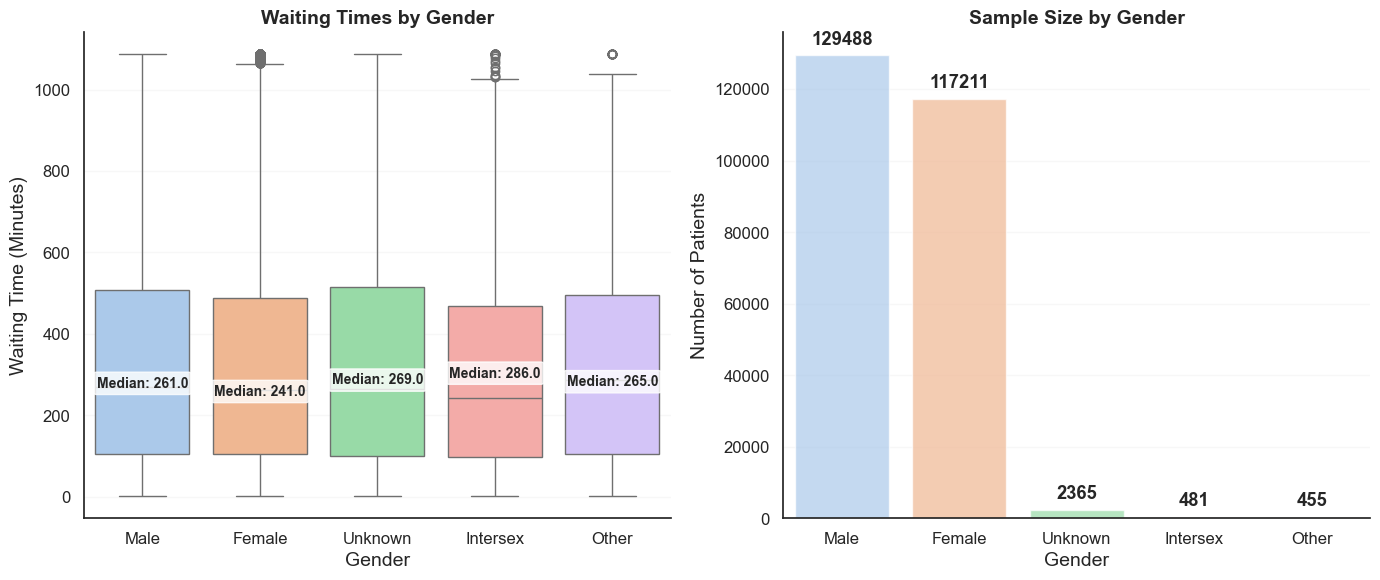

SUMMARY STATISTICS BY GENDER
          mean   median   count   std 
Gender                                
Female   342.43  261.00  117211 297.22
Intersex 346.47  241.00     481 326.11
Male     352.85  269.00  129488 305.54
Other    347.34  286.00     455 302.55
Unknown  351.53  265.00    2365 307.38


Mann-Whitney U Test p-value: 0.0000
 There is a statistically significant difference in waiting times between genders.
   Male patients wait significantly longer (median: 269.0 min) than female patients (median: 261.0 min).

Practical difference: 10.4 minutes difference in mean waiting time


In [8]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Boxplot of Waiting Times by Gender ---
sns.boxplot(data=df, x='Gender', y='Waiting_Time_Minutes', palette='pastel', ax=ax1)
ax1.set_title('Waiting Times by Gender', fontsize=14, fontweight='bold')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Waiting Time (Minutes)')
sns.despine(ax=ax1)

# Add median value labels to the boxplot
medians = df.groupby('Gender')['Waiting_Time_Minutes'].median()
for i, (gender, median_val) in enumerate(medians.items()):
    ax1.text(i, median_val, f'Median: {median_val:.1f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

# --- Plot 2: Count plot for Gender sample sizes ---
sns.countplot(data=df, x='Gender', palette='pastel', alpha=0.7, ax=ax2)
ax2.set_title('Sample Size by Gender', fontsize=14, fontweight='bold')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Number of Patients')

# Add value labels on top of each bar in the count plot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontweight='bold')

sns.despine(ax=ax2)

plt.tight_layout()
plt.show()

# --- Statistical Summary and Testing ---
# 1. Summary Statistics
gender_stats = df.groupby('Gender')['Waiting_Time_Minutes'].agg(['mean', 'median', 'count', 'std']).round(2)
print("SUMMARY STATISTICS BY GENDER")
print("=" * 40)
print(gender_stats)
print("\n")

# 2. Statistical Test: Mann-Whitney U (non-parametric t-test)
from scipy.stats import mannwhitneyu

# Assuming two groups: 'Male' and 'Female'
group_m = df[df['Gender'] == 'Male']['Waiting_Time_Minutes']
group_f = df[df['Gender'] == 'Female']['Waiting_Time_Minutes']

stat, p_value = mannwhitneyu(group_m, group_f, alternative='two-sided')
print(f"Mann-Whitney U Test p-value: {p_value:.4f}")

if p_value < 0.05:
    print(" There is a statistically significant difference in waiting times between genders.")
    # Check which group has a higher median wait time
    if group_m.median() > group_f.median():
        print(f"   Male patients wait significantly longer (median: {group_m.median():.1f} min) than female patients (median: {group_f.median():.1f} min).")
    else:
        print(f"   Female patients wait significantly longer (median: {group_f.median():.1f} min) than male patients (median: {group_m.median():.1f} min).")
else:
    print(" No significant difference found between genders.")

# Additional insight: Calculate the practical difference
mean_difference = abs(group_m.mean() - group_f.mean())
print(f"\nPractical difference: {mean_difference:.1f} minutes difference in mean waiting time")

##  Summary

Analysis of healthcare waiting times highlights key insights:

### **Age Effect**
- Patients over 40 face longer waiting times  
- Median wait rises from ~258 minutes (ages 0–17) to ~294 minutes (ages 90+)

### **Gender Effect**
- Male patients wait longer than females, with a median difference of ~10 minutes

### **Equity Consideration**
- Even modest time gaps point to potential disparities in patient experience

### **Implication**
- Monitoring and addressing these patterns can help improve fairness, optimize scheduling, and enhance overall patient satisfaction




# 3. Facility & Location Analysis

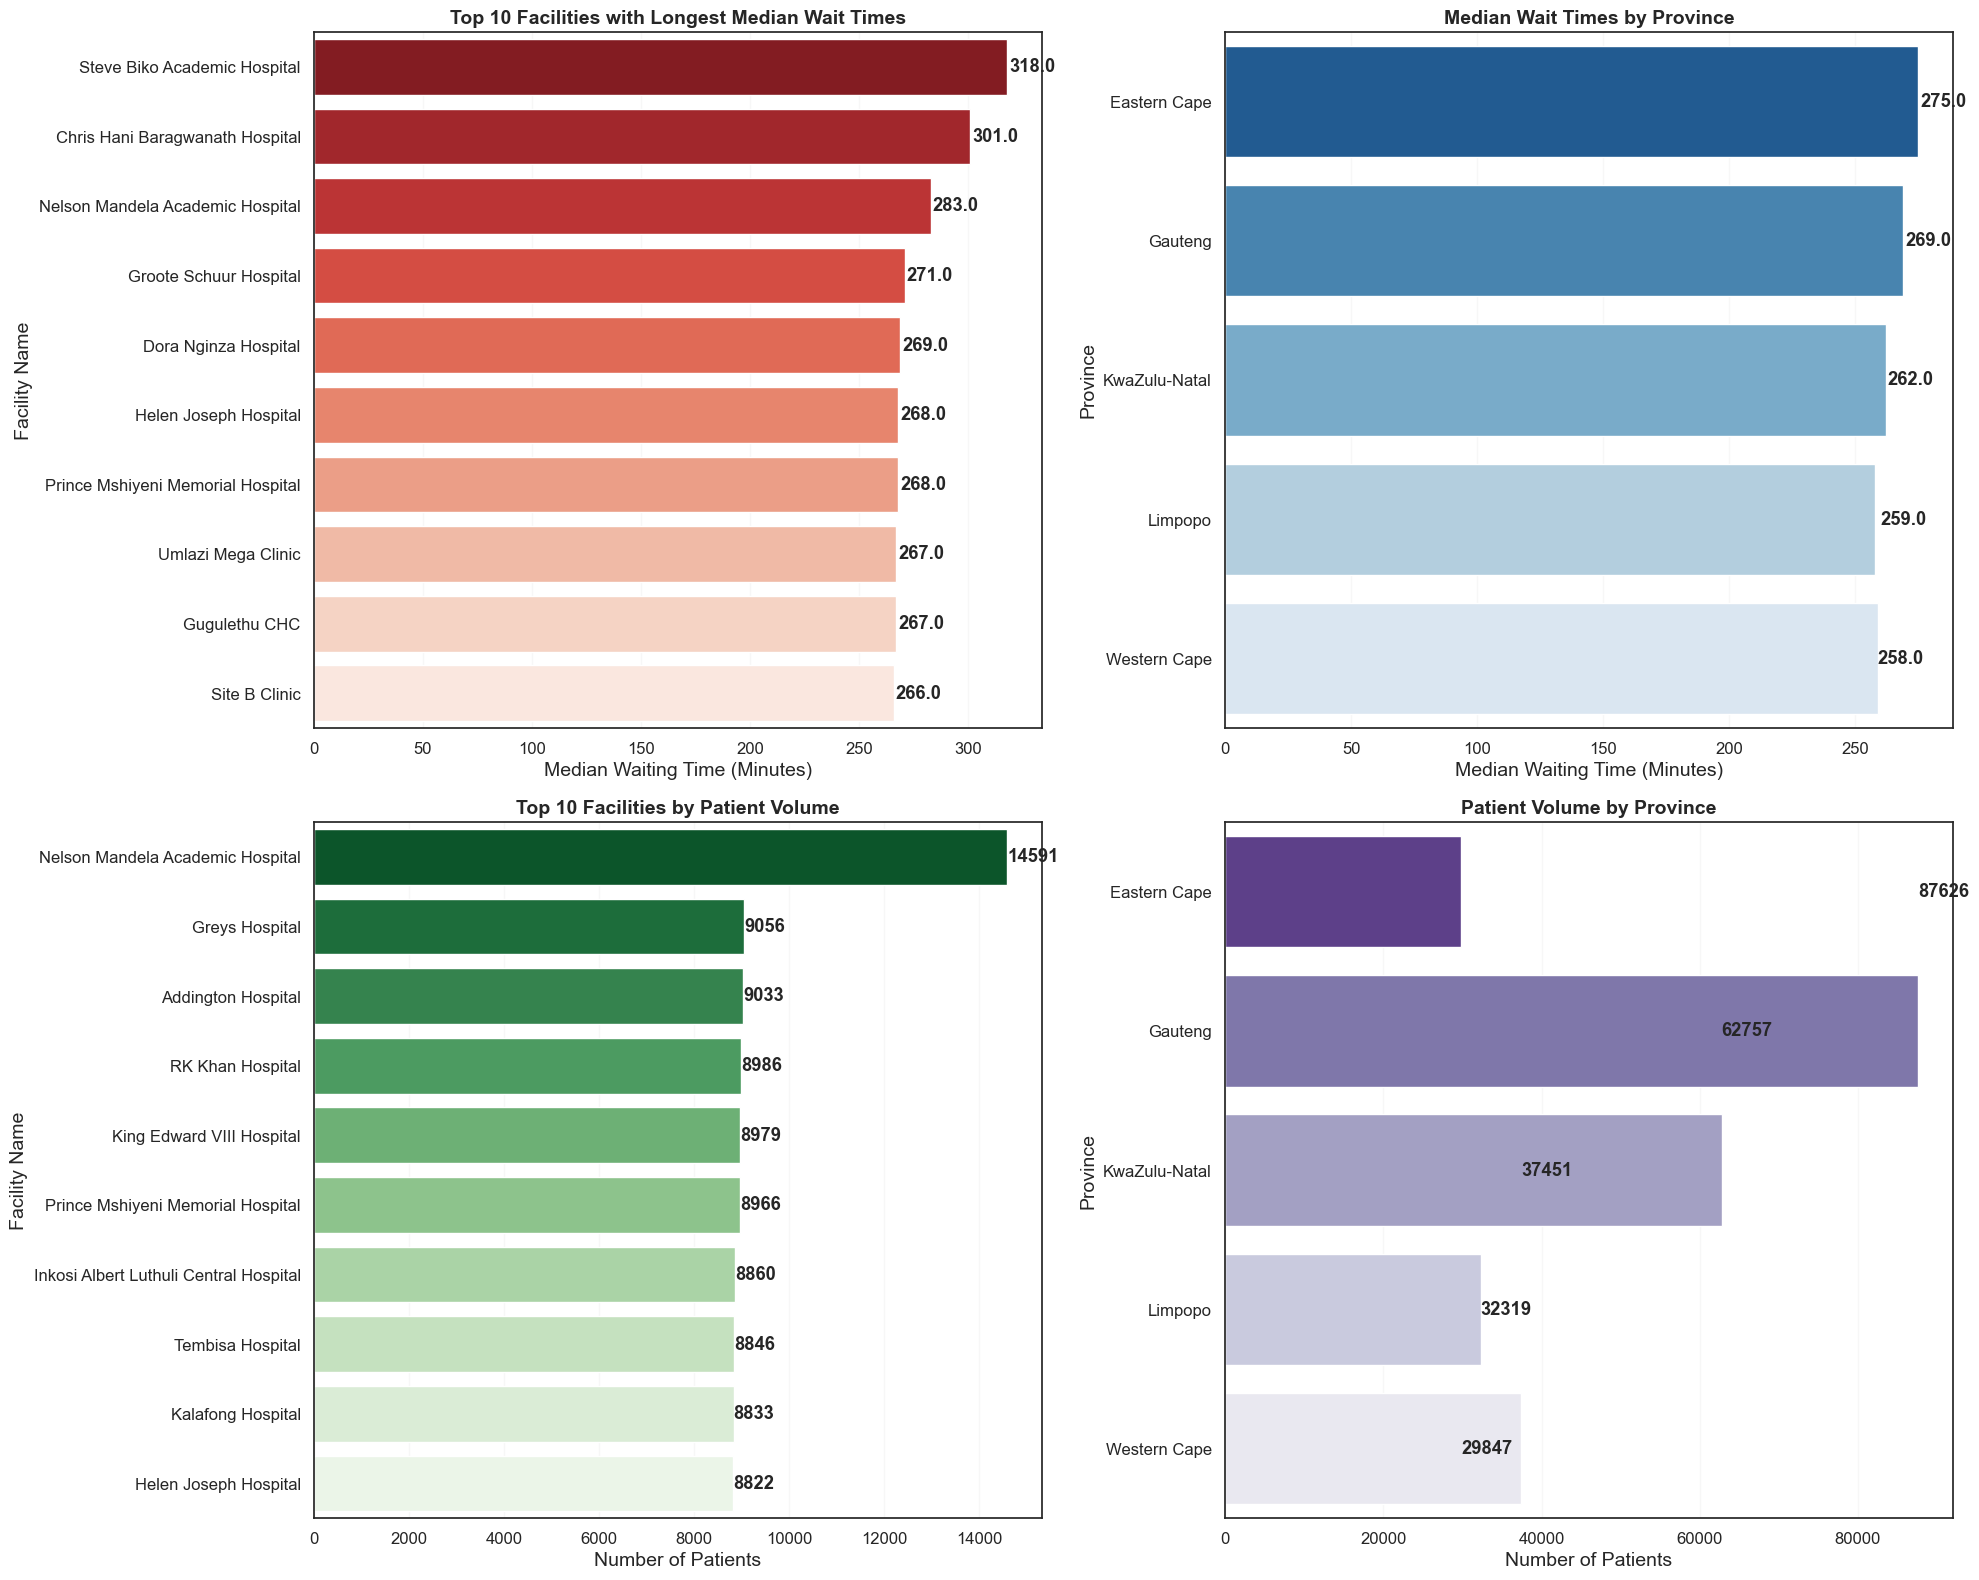

FACILITY AND PROVINCE ANALYSIS
Top 5 Facilities with Longest Waits:
                                  mean   median  count   std 
Facility_Name                                                
Steve Biko Academic Hospital     400.98  318.00   8789 326.82
Chris Hani Baragwanath Hospital  387.87  301.00   8745 322.40
Nelson Mandela Academic Hospital 368.22  283.00  14591 313.16
Groote Schuur Hospital           346.69  271.00   5418 300.70
Dora Nginza Hospital             348.44  269.00   5957 298.69


Wait Times by Province:
               mean   median  count   std 
Province                                  
Eastern Cape  358.54  275.00  29847 308.32
Gauteng       353.10  269.00  87626 304.82
KwaZulu-Natal 343.88  262.00  62757 298.67
Western Cape  341.64  259.00  37451 298.48
Limpopo       339.26  258.00  32319 296.48


Kruskal-Wallis Test for Province Differences: p-value = 0.0000
=> Significant differences exist between provinces.


In [9]:
# Create a figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# --- Plot 1: Top 10 Facilities by Median Wait Time ---
facility_medians = df.groupby('Facility_Name')['Waiting_Time_Minutes'].median().sort_values(ascending=False).head(10)
sns.barplot(x=facility_medians.values, y=facility_medians.index, palette='Reds_r', ax=ax1)
ax1.set_title('Top 10 Facilities with Longest Median Wait Times', fontsize=14, fontweight='bold')
ax1.set_xlabel('Median Waiting Time (Minutes)')
ax1.set_ylabel('Facility Name')

# Add value labels
for i, v in enumerate(facility_medians.values):
    ax1.text(v + 1, i, f'{v:.1f}', va='center', fontweight='bold')

# --- Plot 2: Wait Times by Province ---
province_medians = df.groupby('Province')['Waiting_Time_Minutes'].median().sort_values(ascending=False)
sns.barplot(x=province_medians.values, y=province_medians.index, palette='Blues_r', ax=ax2)
ax2.set_title('Median Wait Times by Province', fontsize=14, fontweight='bold')
ax2.set_xlabel('Median Waiting Time (Minutes)')
ax2.set_ylabel('Province')

# Add value labels
for i, v in enumerate(province_medians.values):
    ax2.text(v + 1, i, f'{v:.1f}', va='center', fontweight='bold')

# --- Plot 3: Facility Sample Sizes ---
facility_counts = df['Facility_Name'].value_counts().head(10)
sns.barplot(x=facility_counts.values, y=facility_counts.index, palette='Greens_r', ax=ax3)
ax3.set_title('Top 10 Facilities by Patient Volume', fontsize=14, fontweight='bold')
ax3.set_xlabel('Number of Patients')
ax3.set_ylabel('Facility Name')

# Add value labels
for i, v in enumerate(facility_counts.values):
    ax3.text(v + 1, i, f'{v:.0f}', va='center', fontweight='bold')

# --- Plot 4: Province Sample Sizes ---
province_counts = df['Province'].value_counts()
sns.barplot(x=province_counts.values, y=province_counts.index, palette='Purples_r', ax=ax4)
ax4.set_title('Patient Volume by Province', fontsize=14, fontweight='bold')
ax4.set_xlabel('Number of Patients')
ax4.set_ylabel('Province')

# Add value labels
for i, v in enumerate(province_counts.values):
    ax4.text(v + 1, i, f'{v:.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# --- Statistical Analysis ---
print("FACILITY AND PROVINCE ANALYSIS")
print("=" * 50)

# Facility statistics
facility_stats = df.groupby('Facility_Name')['Waiting_Time_Minutes'].agg(['mean', 'median', 'count', 'std']).round(2)
print("Top 5 Facilities with Longest Waits:")
print(facility_stats.nlargest(5, 'median'))
print("\n")

# Province statistics
province_stats = df.groupby('Province')['Waiting_Time_Minutes'].agg(['mean', 'median', 'count', 'std']).round(2)
print("Wait Times by Province:")
print(province_stats.sort_values('median', ascending=False))
print("\n")

# ANOVA test for provinces
from scipy.stats import kruskal
province_groups = [group['Waiting_Time_Minutes'].values for name, group in df.groupby('Province')]
kruskal_stat, kruskal_p = kruskal(*province_groups)
print(f"Kruskal-Wallis Test for Province Differences: p-value = {kruskal_p:.4f}")
if kruskal_p < 0.05:
    print("=> Significant differences exist between provinces.")
else:
    print("=> No significant differences between provinces.")

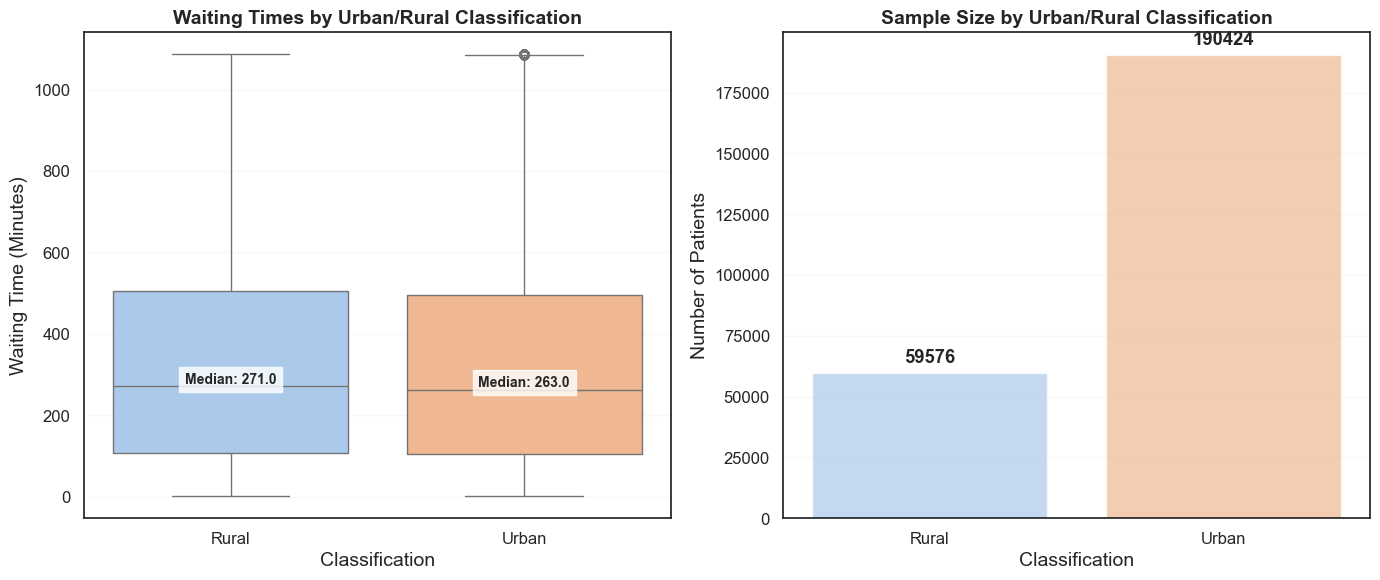

URBAN/RURAL ANALYSIS
Urban Statistics:
mean       346.25
50%        263.00
count   190424.00
std        300.93
Name: Waiting_Time_Minutes, dtype: float64

Rural Statistics:
mean      353.29
50%       271.00
count   59576.00
std       304.33
Name: Waiting_Time_Minutes, dtype: float64

Mann-Whitney U Test p-value: 0.0000
⇒ Rural patients wait 8.0 minutes longer than urban patients.


In [10]:
# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Boxplot with sample sizes ---
urban_rural_order = df.groupby('Urban_Rural')['Waiting_Time_Minutes'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='Urban_Rural', y='Waiting_Time_Minutes', order=urban_rural_order, palette='pastel', ax=ax1)
ax1.set_title('Waiting Times by Urban/Rural Classification', fontsize=14, fontweight='bold')
ax1.set_xlabel('Classification')
ax1.set_ylabel('Waiting Time (Minutes)')

# Add median labels
medians = df.groupby('Urban_Rural')['Waiting_Time_Minutes'].median()
for i, (category, median_val) in enumerate(medians.items()):
    ax1.text(i, median_val, f'Median: {median_val:.1f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8))

# --- Plot 2: Count plot ---
sns.countplot(data=df, x='Urban_Rural', order=urban_rural_order, palette='pastel', alpha=0.7, ax=ax2)
ax2.set_title('Sample Size by Urban/Rural Classification', fontsize=14, fontweight='bold')
ax2.set_xlabel('Classification')
ax2.set_ylabel('Number of Patients')

# Add value labels
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontweight='bold')

plt.tight_layout()
plt.show()

# --- Statistical Analysis ---
print("URBAN/RURAL ANALYSIS")
print("=" * 40)

urban_stats = df[df['Urban_Rural'] == 'Urban']['Waiting_Time_Minutes'].describe()
rural_stats = df[df['Urban_Rural'] == 'Rural']['Waiting_Time_Minutes'].describe()

print("Urban Statistics:")
print(urban_stats[['mean', '50%', 'count', 'std']].round(2))
print("\nRural Statistics:")
print(rural_stats[['mean', '50%', 'count', 'std']].round(2))

from scipy.stats import mannwhitneyu
urban_data = df[df['Urban_Rural'] == 'Urban']['Waiting_Time_Minutes']
rural_data = df[df['Urban_Rural'] == 'Rural']['Waiting_Time_Minutes']

stat, p_value = mannwhitneyu(urban_data, rural_data, alternative='two-sided')
print(f"\nMann-Whitney U Test p-value: {p_value:.4f}")

if p_value < 0.05:
    wait_diff = abs(urban_data.median() - rural_data.median())
    if urban_data.median() > rural_data.median():
        print(f"⇒ Urban patients wait {wait_diff:.1f} minutes longer than rural patients.")
    else:
        print(f"⇒ Rural patients wait {wait_diff:.1f} minutes longer than urban patients.")
else:
    print("⇒ No significant urban-rural difference in waiting times.")

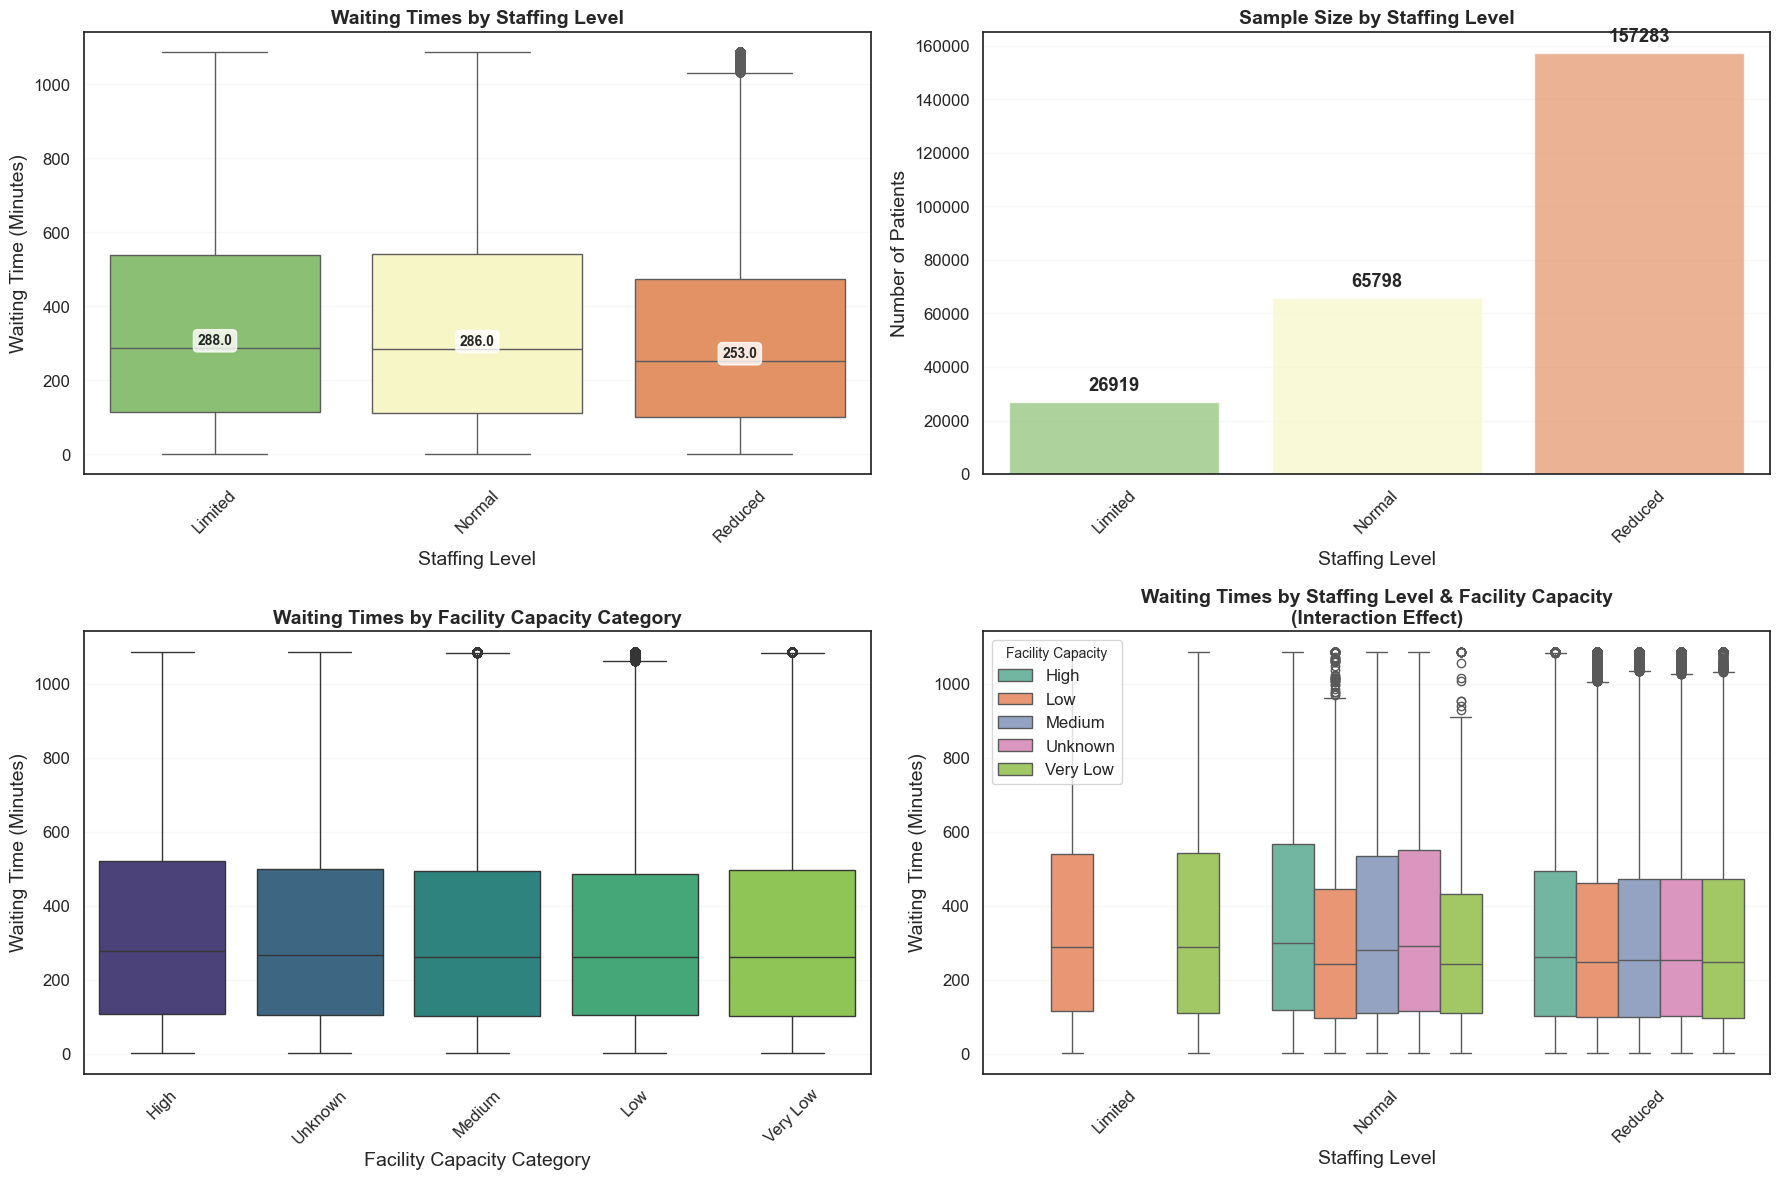

STAFFING LEVEL AND CAPACITY ANALYSIS
WAITING TIME STATISTICS BY STAFFING LEVEL:
---------------------------------------------
                mean   median   count   std 
Staffing_Level                              
Limited        370.63  288.00   26919 311.75
Normal         370.89  286.00   65798 313.38
Reduced        334.44  253.00  157283 294.16


Kruskal-Wallis Test for Staffing Level Differences: p-value = 0.0000
⇒ Significant differences exist between staffing levels.

Post-hoc Dunn's Test (which staffing levels differ?):
         Limited  Normal  Reduced
Limited   1.00     0.71    0.00  
Normal    0.71     1.00    0.00  
Reduced   0.00     0.00    1.00  


WAITING TIME STATISTICS BY FACILITY CAPACITY:
---------------------------------------------
                   mean   median   count   std 
Facility_Capacity                              
High              360.50  277.00   44475 309.11
Unknown           349.10  268.00   24838 301.95
Medium            346.24  263.00  101645 301

In [11]:
# Create a figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# --- Plot 1: Waiting Times by Staffing Level (Boxplot) ---
# Order by median wait time
staffing_order = df.groupby('Staffing_Level')['Waiting_Time_Minutes'].median().sort_values(ascending=False).index

sns.boxplot(data=df, x='Staffing_Level', y='Waiting_Time_Minutes', order=staffing_order, palette='RdYlGn_r', ax=ax1)
ax1.set_title('Waiting Times by Staffing Level', fontsize=14, fontweight='bold')
ax1.set_xlabel('Staffing Level')
ax1.set_ylabel('Waiting Time (Minutes)')
ax1.tick_params(axis='x', rotation=45)

# Add median value labels
medians = df.groupby('Staffing_Level')['Waiting_Time_Minutes'].median()
for i, (level, median_val) in enumerate(medians.items()):
    ax1.text(i, median_val, f'{median_val:.1f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

# --- Plot 2: Sample Size by Staffing Level (Countplot) ---
sns.countplot(data=df, x='Staffing_Level', order=staffing_order, palette='RdYlGn_r', alpha=0.7, ax=ax2)
ax2.set_title('Sample Size by Staffing Level', fontsize=14, fontweight='bold')
ax2.set_xlabel('Staffing Level')
ax2.set_ylabel('Number of Patients')
ax2.tick_params(axis='x', rotation=45)

# Add value labels
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontweight='bold')

# --- Plot 3: Facility Capacity Categories vs Wait Time (Boxplot) ---
# Since Facility_Capacity is categorical, we use boxplot instead of scatterplot
if df['Facility_Capacity'].nunique() > 1:  # Only plot if there are multiple categories
    capacity_order = df.groupby('Facility_Capacity')['Waiting_Time_Minutes'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x='Facility_Capacity', y='Waiting_Time_Minutes', order=capacity_order, palette='viridis', ax=ax3)
    ax3.set_title('Waiting Times by Facility Capacity Category', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Facility Capacity Category')
    ax3.set_ylabel('Waiting Time (Minutes)')
    ax3.tick_params(axis='x', rotation=45)
else:
    ax3.text(0.5, 0.5, 'Only one Facility Capacity category\npresent in the data', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('Facility Capacity Analysis\n(Not enough categories)', fontsize=14, fontweight='bold')

# --- Plot 4: Wait Times by Staffing Level AND Capacity (Interaction) ---
# Check if we have both categorical variables with multiple categories
if (df['Staffing_Level'].nunique() > 1 and 'Facility_Capacity' in df.columns and 
    df['Facility_Capacity'].nunique() > 1):
    
    sns.boxplot(data=df, x='Staffing_Level', y='Waiting_Time_Minutes', hue='Facility_Capacity', 
                order=staffing_order, palette='Set2', ax=ax4)
    ax4.set_title('Waiting Times by Staffing Level & Facility Capacity\n(Interaction Effect)', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Staffing Level')
    ax4.set_ylabel('Waiting Time (Minutes)')
    ax4.tick_params(axis='x', rotation=45)
    ax4.legend(title='Facility Capacity', title_fontsize=10)
else:
    ax4.text(0.5, 0.5, 'Insufficient categories for\ninteraction analysis', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('Interaction Analysis\n(Not enough categories)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# --- Statistical Analysis ---
print("STAFFING LEVEL AND CAPACITY ANALYSIS")
print("=" * 50)

# 1. Staffing Level Statistics
print("WAITING TIME STATISTICS BY STAFFING LEVEL:")
print("-" * 45)
staffing_stats = df.groupby('Staffing_Level')['Waiting_Time_Minutes'].agg(['mean', 'median', 'count', 'std']).round(2)
print(staffing_stats.sort_values('median', ascending=False))
print("\n")

# 2. Kruskal-Wallis Test for Staffing Levels
from scipy.stats import kruskal

staffing_groups = [group['Waiting_Time_Minutes'].values for name, group in df.groupby('Staffing_Level')]
kruskal_stat, kruskal_p = kruskal(*staffing_groups)

print(f"Kruskal-Wallis Test for Staffing Level Differences: p-value = {kruskal_p:.4f}")

if kruskal_p < 0.05:
    print("⇒ Significant differences exist between staffing levels.")
    
    # Post-hoc Dunn's test to see which specific levels differ
    try:
        import scikit_posthocs as sp
        print("\nPost-hoc Dunn's Test (which staffing levels differ?):")
        dunn_results = sp.posthoc_dunn(df, val_col='Waiting_Time_Minutes', group_col='Staffing_Level', p_adjust='holm')
        print(dunn_results.round(4))
    except ImportError:
        print("\nInstall 'scikit-posthocs' for detailed pairwise comparisons.")
else:
    print("⇒ No significant differences between staffing levels.")
print("\n")

# 3. Facility Capacity Analysis (if categorical)
if 'Facility_Capacity' in df.columns and df['Facility_Capacity'].nunique() > 1:
    print("WAITING TIME STATISTICS BY FACILITY CAPACITY:")
    print("-" * 45)
    capacity_stats = df.groupby('Facility_Capacity')['Waiting_Time_Minutes'].agg(['mean', 'median', 'count', 'std']).round(2)
    print(capacity_stats.sort_values('median', ascending=False))
    print("\n")
    
    # Kruskal-Wallis Test for Facility Capacity
    capacity_groups = [group['Waiting_Time_Minutes'].values for name, group in df.groupby('Facility_Capacity')]
    kruskal_stat_cap, kruskal_p_cap = kruskal(*capacity_groups)
    
    print(f"Kruskal-Wallis Test for Facility Capacity Differences: p-value = {kruskal_p_cap:.4f}")
    if kruskal_p_cap < 0.05:
        print("⇒ Significant differences exist between facility capacity categories.")
    else:
        print("⇒ No significant differences between facility capacity categories.")
    print("\n")

# 4. Combined Analysis: Staffing Level vs Capacity
if 'Facility_Capacity' in df.columns:
    print("STAFFING LEVEL DISTRIBUTION BY FACILITY CAPACITY:")
    print("-" * 50)
    staffing_by_capacity = pd.crosstab(df['Staffing_Level'], df['Facility_Capacity'])
    print(staffing_by_capacity)
else:
    print("Facility Capacity data not available for analysis.")

#  Key Insights

### **Facility Variation**
- Some facilities have extremely high wait times (e.g., Steve Biko Academic Hospital  at 318.00 mins)

### **Provincial Differences**
- Median wait times vary significantly, highest in Eastern Cape (275 mins) and lowest in Western Cape (258 mins)

### **Urban vs Rural**
- Rural facilities have longer waits (+8 mins) than urban ones

### **Age Effect**
- Older patients (40+) consistently wait longer than younger patients

### **Gender Effect**
- Male patients wait slightly longer (~10 mins) than females

### **Staffing Paradox**
- Facilities with more staffing show longer waits, likely due to handling more complex cases

### **Capacity Impact**
- Higher-capacity facilities show longer median wait times than smaller ones

---

#  Recommendations

### **Target Interventions**
- Focus on facilities with exceptionally long wait times

### **Age-Specific Strategies**
- Develop patient flow strategies for older patients

### **Rural–Urban Disparities**
- Address differences in emergency care access and efficiency

### **Staffing Optimization**
- Investigate the staffing–wait time relationship to optimize resource allocation

-  Investigate the **staffing–wait time relationship** further to optimize resource allocation.  


## 4. Clinical Factors

-  **Chief_Complaint & ICD-10 Code vs. Wait Times**  
  Identify which medical conditions or complaints are associated with longer delays.  

-  **Triage Category & SATS Score vs. Wait Times**  
  Assess whether high-risk patients are prioritized and seen faster than lower-risk cases.  

-  **Vital Signs vs. Wait Times**  
  Explore the relationship between patient vital signs (Respiratory Rate, Heart Rate, Oxygen Saturation) and waiting times.  


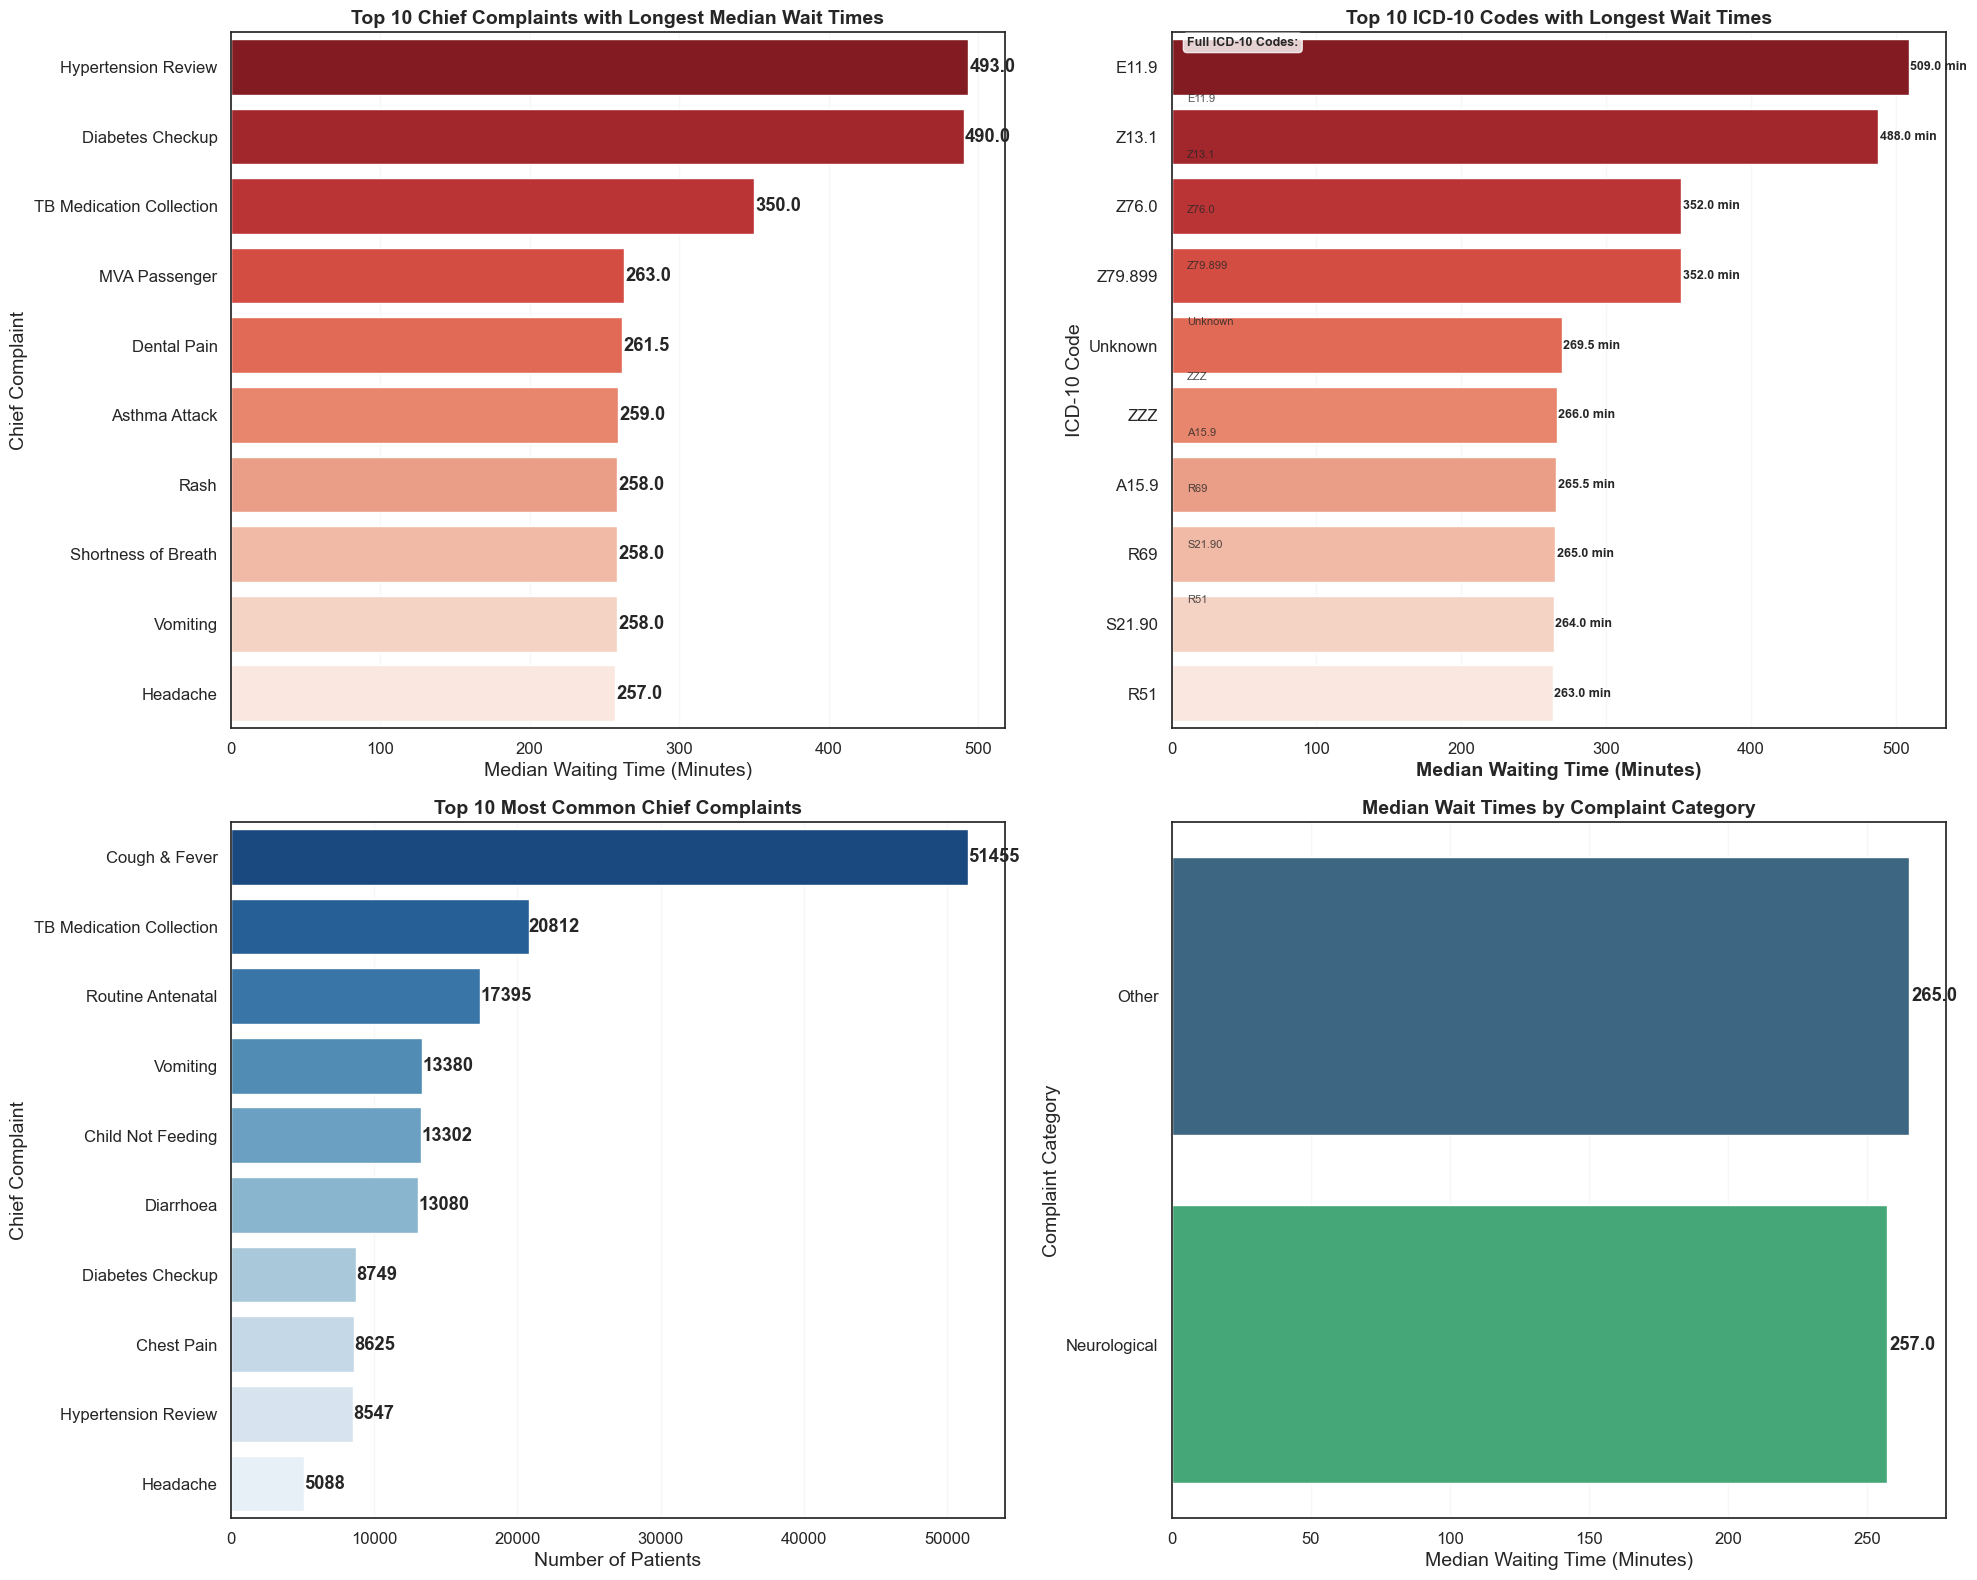

CHIEF COMPLAINT AND ICD-10 CODE ANALYSIS
Top 5 Chief Complaints with Longest Waits:
                          median  count
Chief_Complaint                        
Hypertension Review       493.00   8547
Diabetes Checkup          490.00   8749
TB Medication Collection  350.00  20812
MVA Passenger             263.00   4902
Dental Pain               261.50   4938


Top 5 ICD-10 Codes with Longest Waits:
             median  count
ICD-10_Code               
E11.9        509.00  3429 
Z13.1        488.00  3276 
Z76.0        352.00  7909 
Z79.899      352.00  7909 
Unknown      269.50  6340 


Wait Times by Complaint Category:
                    median   count  mean 
Complaint_Category                       
Other               265.00  244912 348.00
Neurological        257.00    5088 344.10


Kruskal-Wallis Test for Complaint Category Differences: p-value = 0.0579


In [12]:
# Create a figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# --- Plot 1: Top 10 Chief Complaints by Median Wait Time ---
complaint_medians = df.groupby('Chief_Complaint')['Waiting_Time_Minutes'].median().sort_values(ascending=False).head(10)
sns.barplot(x=complaint_medians.values, y=complaint_medians.index, palette='Reds_r', ax=ax1)
ax1.set_title('Top 10 Chief Complaints with Longest Median Wait Times', fontsize=14, fontweight='bold')
ax1.set_xlabel('Median Waiting Time (Minutes)')
ax1.set_ylabel('Chief Complaint')

# Add value labels
for i, v in enumerate(complaint_medians.values):
    ax1.text(v + 1, i, f'{v:.1f}', va='center', fontweight='bold')

# --- Plot 2: Top 10 ICD-10 Codes ---
icd_medians = df.groupby('ICD-10_Code')['Waiting_Time_Minutes'].median().sort_values(ascending=False).head(10)

# Use abbreviated labels for ICD codes
icd_labels = []
for code in icd_medians.index:
    if len(code) > 8:
        icd_labels.append(f"{code[:3]}...")
    else:
        icd_labels.append(code)

sns.barplot(x=icd_medians.values, y=icd_labels, palette='Reds_r', ax=ax2)
ax2.set_xlabel('Median Waiting Time (Minutes)', fontweight='bold')
ax2.set_ylabel('ICD-10 Code')
ax2.set_title('Top 10 ICD-10 Codes with Longest Wait Times', fontsize=14, fontweight='bold')

# Add value labels
for i, v in enumerate(icd_medians.values):
    ax2.text(v + 1, i, f'{v:.1f} min', va='center', fontweight='bold', fontsize=9)

# Add a simple legend for full codes
ax2.text(0.02, 0.98, 'Full ICD-10 Codes:', transform=ax2.transAxes, fontsize=9, fontweight='bold', 
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))
for i, code in enumerate(icd_medians.index):
    ax2.text(0.02, 0.90 - i*0.08, code, transform=ax2.transAxes, fontsize=8, alpha=0.8)

# --- Plot 3: Sample Size by Chief Complaint Category ---
complaint_counts = df['Chief_Complaint'].value_counts().head(10)
sns.barplot(x=complaint_counts.values, y=complaint_counts.index, palette='Blues_r', ax=ax3)
ax3.set_title('Top 10 Most Common Chief Complaints', fontsize=14, fontweight='bold')
ax3.set_xlabel('Number of Patients')
ax3.set_ylabel('Chief Complaint')

# Add value labels
for i, v in enumerate(complaint_counts.values):
    ax3.text(v + 1, i, f'{v:.0f}', va='center', fontweight='bold')

# --- Plot 4: Wait Times by Complaint Severity (if available) ---
# Group complaints into categories for better analysis
complaint_categories = {
    'Chest pain': 'Cardiac', 'Shortness of breath': 'Respiratory', 
    'Abdominal pain': 'Gastrointestinal', 'Headache': 'Neurological',
    'Fever': 'Infectious', 'Trauma': 'Trauma', 'Bleeding': 'Hemorrhagic'
}

# Create a new column for complaint categories
df['Complaint_Category'] = df['Chief_Complaint'].map(complaint_categories)
df['Complaint_Category'] = df['Complaint_Category'].fillna('Other')

category_medians = df.groupby('Complaint_Category')['Waiting_Time_Minutes'].median().sort_values(ascending=False)
sns.barplot(x=category_medians.values, y=category_medians.index, palette='viridis', ax=ax4)
ax4.set_title('Median Wait Times by Complaint Category', fontsize=14, fontweight='bold')
ax4.set_xlabel('Median Waiting Time (Minutes)')
ax4.set_ylabel('Complaint Category')

# Add value labels
for i, v in enumerate(category_medians.values):
    ax4.text(v + 1, i, f'{v:.1f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# --- Statistical Analysis ---
print("CHIEF COMPLAINT AND ICD-10 CODE ANALYSIS")
print("=" * 50)

# Top complaints with longest waits
print("Top 5 Chief Complaints with Longest Waits:")
complaint_stats = df.groupby('Chief_Complaint')['Waiting_Time_Minutes'].agg(['median', 'count']).round(1)
print(complaint_stats.nlargest(5, 'median'))
print("\n")

# ICD-10 code analysis
print("Top 5 ICD-10 Codes with Longest Waits:")
icd_stats = df.groupby('ICD-10_Code')['Waiting_Time_Minutes'].agg(['median', 'count']).round(1)
print(icd_stats.nlargest(5, 'median'))
print("\n")

# Complaint category analysis
print("Wait Times by Complaint Category:")
category_stats = df.groupby('Complaint_Category')['Waiting_Time_Minutes'].agg(['median', 'count', 'mean']).round(1)
print(category_stats.sort_values('median', ascending=False))
print("\n")

# Statistical test for complaint categories
from scipy.stats import kruskal
category_groups = [group['Waiting_Time_Minutes'].values for name, group in df.groupby('Complaint_Category')]
kruskal_stat, kruskal_p = kruskal(*category_groups)
print(f"Kruskal-Wallis Test for Complaint Category Differences: p-value = {kruskal_p:.4f}")

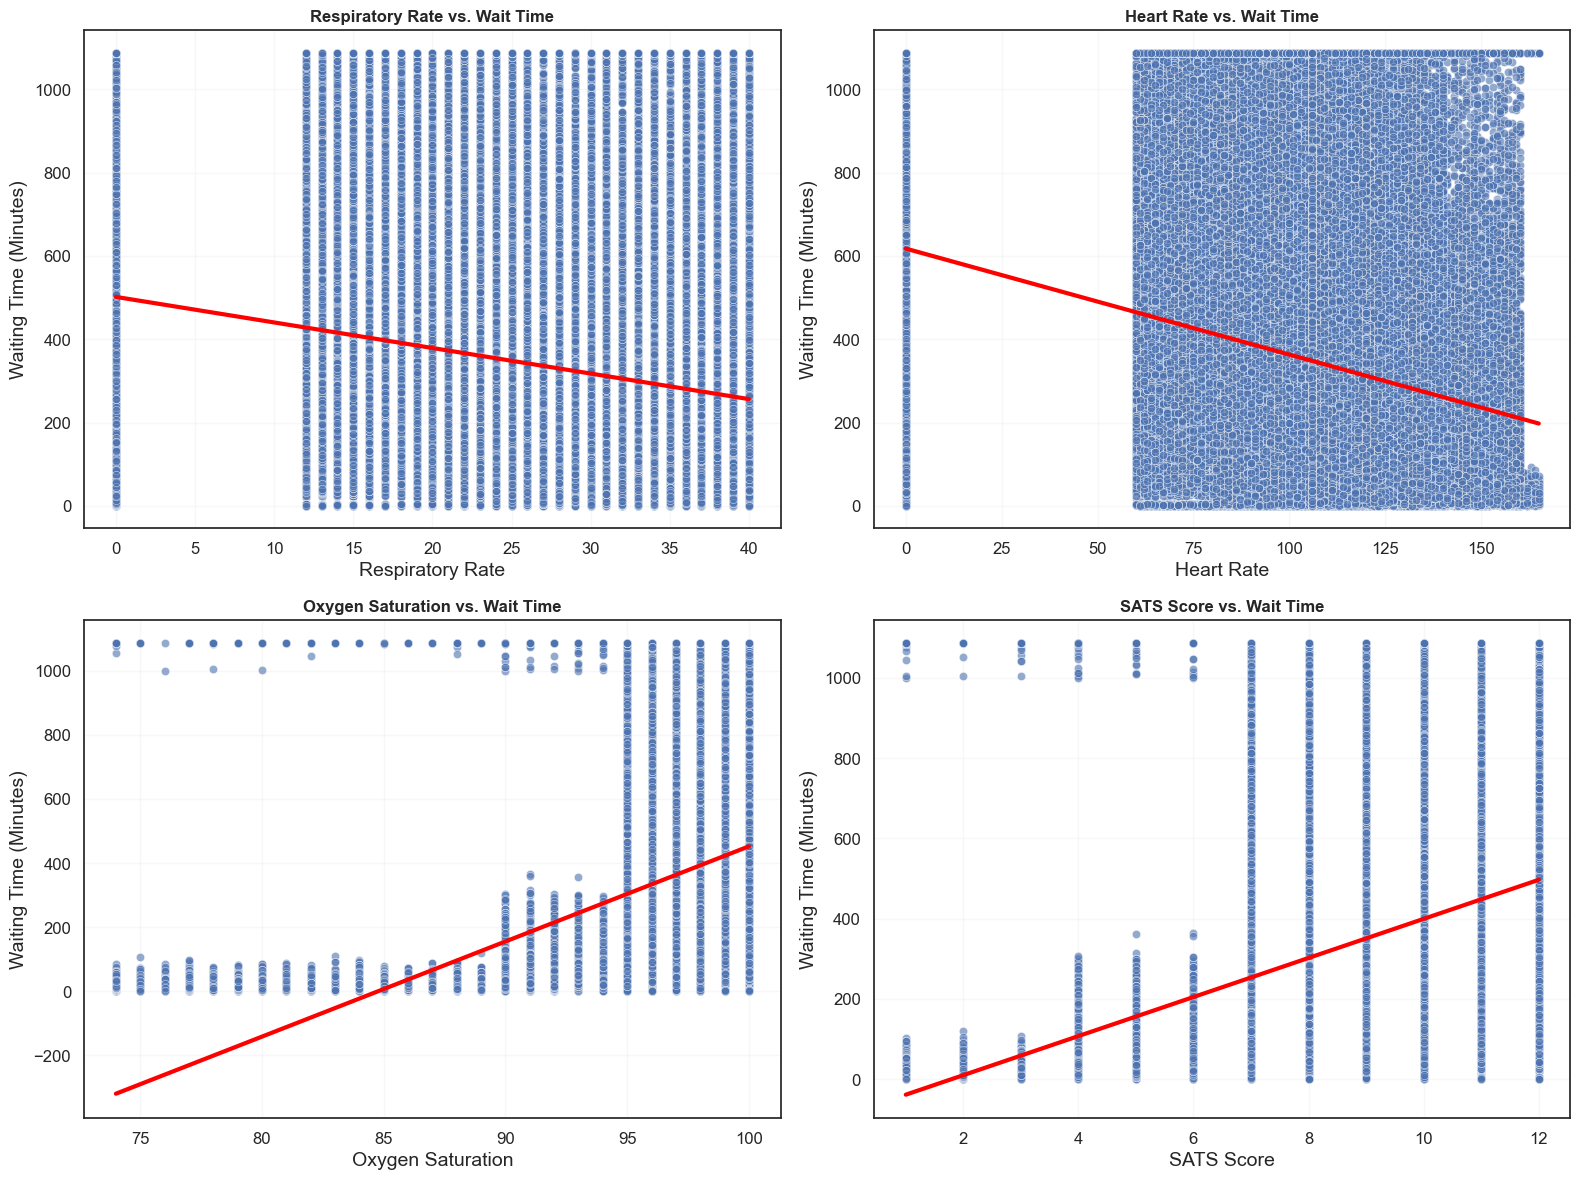

VITAL SIGNS CORRELATION ANALYSIS
Respiratory Rate: Correlation = -0.250 (p-value: 0.0000)
  ⇒ Higher Respiratory Rate associated with shorter waits
Heart Rate: Correlation = -0.299 (p-value: 0.0000)
  ⇒ Higher Heart Rate associated with shorter waits
Oxygen Saturation: Correlation = 0.468 (p-value: 0.0000)
  ⇒ Higher Oxygen Saturation associated with longer waits
SATS Score: Correlation = 0.468 (p-value: 0.0000)
  ⇒ Higher SATS Score associated with longer waits

ABNORMAL VITAL SIGNS ANALYSIS:
-----------------------------------
Respiratory Rate:
  Normal range: 378.0 min wait
  Abnormal range: 219.0 min wait
  Difference: 159.0 min
  Statistical significance: p = 0.0000

Heart Rate:
  Normal range: 362.0 min wait
  Abnormal range: 217.0 min wait
  Difference: 145.0 min
  Statistical significance: p = 0.0000

Oxygen Saturation:
  Normal range: 330.0 min wait
  Abnormal range: 49.0 min wait
  Difference: 281.0 min
  Statistical significance: p = 0.0000



In [13]:

from scipy.stats import spearmanr, mannwhitneyu

# --- Define valid ranges for vitals ---
valid_ranges = {
    'Respiratory_Rate': (0, 60),
    'Heart_Rate': (0, 250),
    'Oxygen_Saturation': (50, 100),
    'SATS_Score': (0, 20)
}

# --- Clean dataset: clip invalid values to NaN ---
for vital, (low, high) in valid_ranges.items():
    if vital in df.columns:
        df.loc[(df[vital] < low) | (df[vital] > high), vital] = None

# --- Visualization ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

vital_signs = ['Respiratory_Rate', 'Heart_Rate', 'Oxygen_Saturation', 'SATS_Score']
titles = ['Respiratory Rate vs. Wait Time', 'Heart Rate vs. Wait Time',
          'Oxygen Saturation vs. Wait Time', 'SATS Score vs. Wait Time']

for vital, title, ax in zip(vital_signs, titles, axes):
    if vital in df.columns:
        # Quantile filtering for extreme outliers
        q1 = df[vital].quantile(0.01)
        q3 = df[vital].quantile(0.99)
        
        filtered_data = df[(df[vital] >= q1) & (df[vital] <= q3)]
        
        sns.scatterplot(data=filtered_data, x=vital, y='Waiting_Time_Minutes',
                        alpha=0.6, ax=ax)
        sns.regplot(data=filtered_data, x=vital, y='Waiting_Time_Minutes',
                    scatter=False, truncate=True ,color='red', ax=ax)
        ax.set_title(title, fontsize=12, fontweight='bold')
        ax.set_xlabel(vital.replace('_', ' '))
        ax.set_ylabel('Waiting Time (Minutes)')
    else:
        ax.text(0.5, 0.5, f'{vital} data not available',
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(title, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# --- Correlation Analysis ---
print("VITAL SIGNS CORRELATION ANALYSIS")
print("=" * 40)

for vital in vital_signs:
    if vital in df.columns:
        valid_data = df[[vital, 'Waiting_Time_Minutes']].dropna()
        if len(valid_data) > 10:
            corr, p_value = spearmanr(valid_data[vital], valid_data['Waiting_Time_Minutes'])
            print(f"{vital.replace('_', ' ')}: Correlation = {corr:.3f} (p-value: {p_value:.4f})")
            
            if p_value < 0.05:
                if corr > 0:
                    print(f"  ⇒ Higher {vital.replace('_', ' ')} associated with longer waits")
                else:
                    print(f"  ⇒ Higher {vital.replace('_', ' ')} associated with shorter waits")
            else:
                print(f"  ⇒ No significant correlation")
        else:
            print(f"{vital.replace('_', ' ')}: Insufficient data for analysis")
    else:
        print(f"{vital.replace('_', ' ')}: Data not available")

# --- Analysis of Abnormal Vital Signs ---
print("\nABNORMAL VITAL SIGNS ANALYSIS:")
print("-" * 35)

normal_ranges = {
    'Respiratory_Rate': (12, 20),
    'Heart_Rate': (60, 100),
    'Oxygen_Saturation': (95, 100),
}

for vital, (low, high) in normal_ranges.items():
    if vital in df.columns:
        normal_data = df[(df[vital] >= low) & (df[vital] <= high)]
        abnormal_data = df[(df[vital] < low) | (df[vital] > high)]
        
        if len(normal_data) > 5 and len(abnormal_data) > 5:
            normal_median = normal_data['Waiting_Time_Minutes'].median()
            abnormal_median = abnormal_data['Waiting_Time_Minutes'].median()
            
            print(f"{vital.replace('_', ' ')}:")
            print(f"  Normal range: {normal_median:.1f} min wait")
            print(f"  Abnormal range: {abnormal_median:.1f} min wait")
            print(f"  Difference: {abs(normal_median - abnormal_median):.1f} min")
            
            stat, p_value = mannwhitneyu(normal_data['Waiting_Time_Minutes'],
                                         abnormal_data['Waiting_Time_Minutes'])
            print(f"  Statistical significance: p = {p_value:.4f}")
            print()


#  Key Insights – Clinical Factors

### **Chronic Conditions**
- Patients visiting for chronic condition management, such as **Hypertension Review** and **Diabetes Checkup**, experience the longest wait times, with median waits around **490–493 minutes**.  

### **ICD-10 Codes**
- Certain ICD-10 codes, particularly **E11.9 (Type 2 Diabetes)** and **Z13.1 (Screening for Diabetes)**, are strongly associated with longer waits (medians of **488–509 minutes**).  

### **Vital Signs Matter**
- Patients with abnormal **respiratory rate, heart rate, or oxygen saturation** are prioritized and seen faster, indicating effective triage for urgent cases.  

### **Triage Effectiveness**
- Higher-risk patients (abnormal vitals, higher SATS) consistently wait less, confirming that the system appropriately prioritizes urgent care.  

### **Complaint Categories**
- Broad complaint categories, such as **“Neurological” vs “Other”**, show no statistically significant differences in median wait times (p-value = 0.058).  



## 5. Temporal Patterns

### **Day of Week & Season vs. Wait Times**
- Compare weekdays vs. weekends and holidays to see if wait times spike during off-peak staffing periods

### **Arrival Hour (Time of Day Patterns)**
- Identify daily cycles (e.g., morning rush hours, afternoon bottlenecks, evening/night quiet periods)

### **Trends Over Time (Quarter, Month, Year)**
- Examine whether waiting times are increasing or decreasing over longer periods  
- Detect seasonal effects or long-term improvements/declines



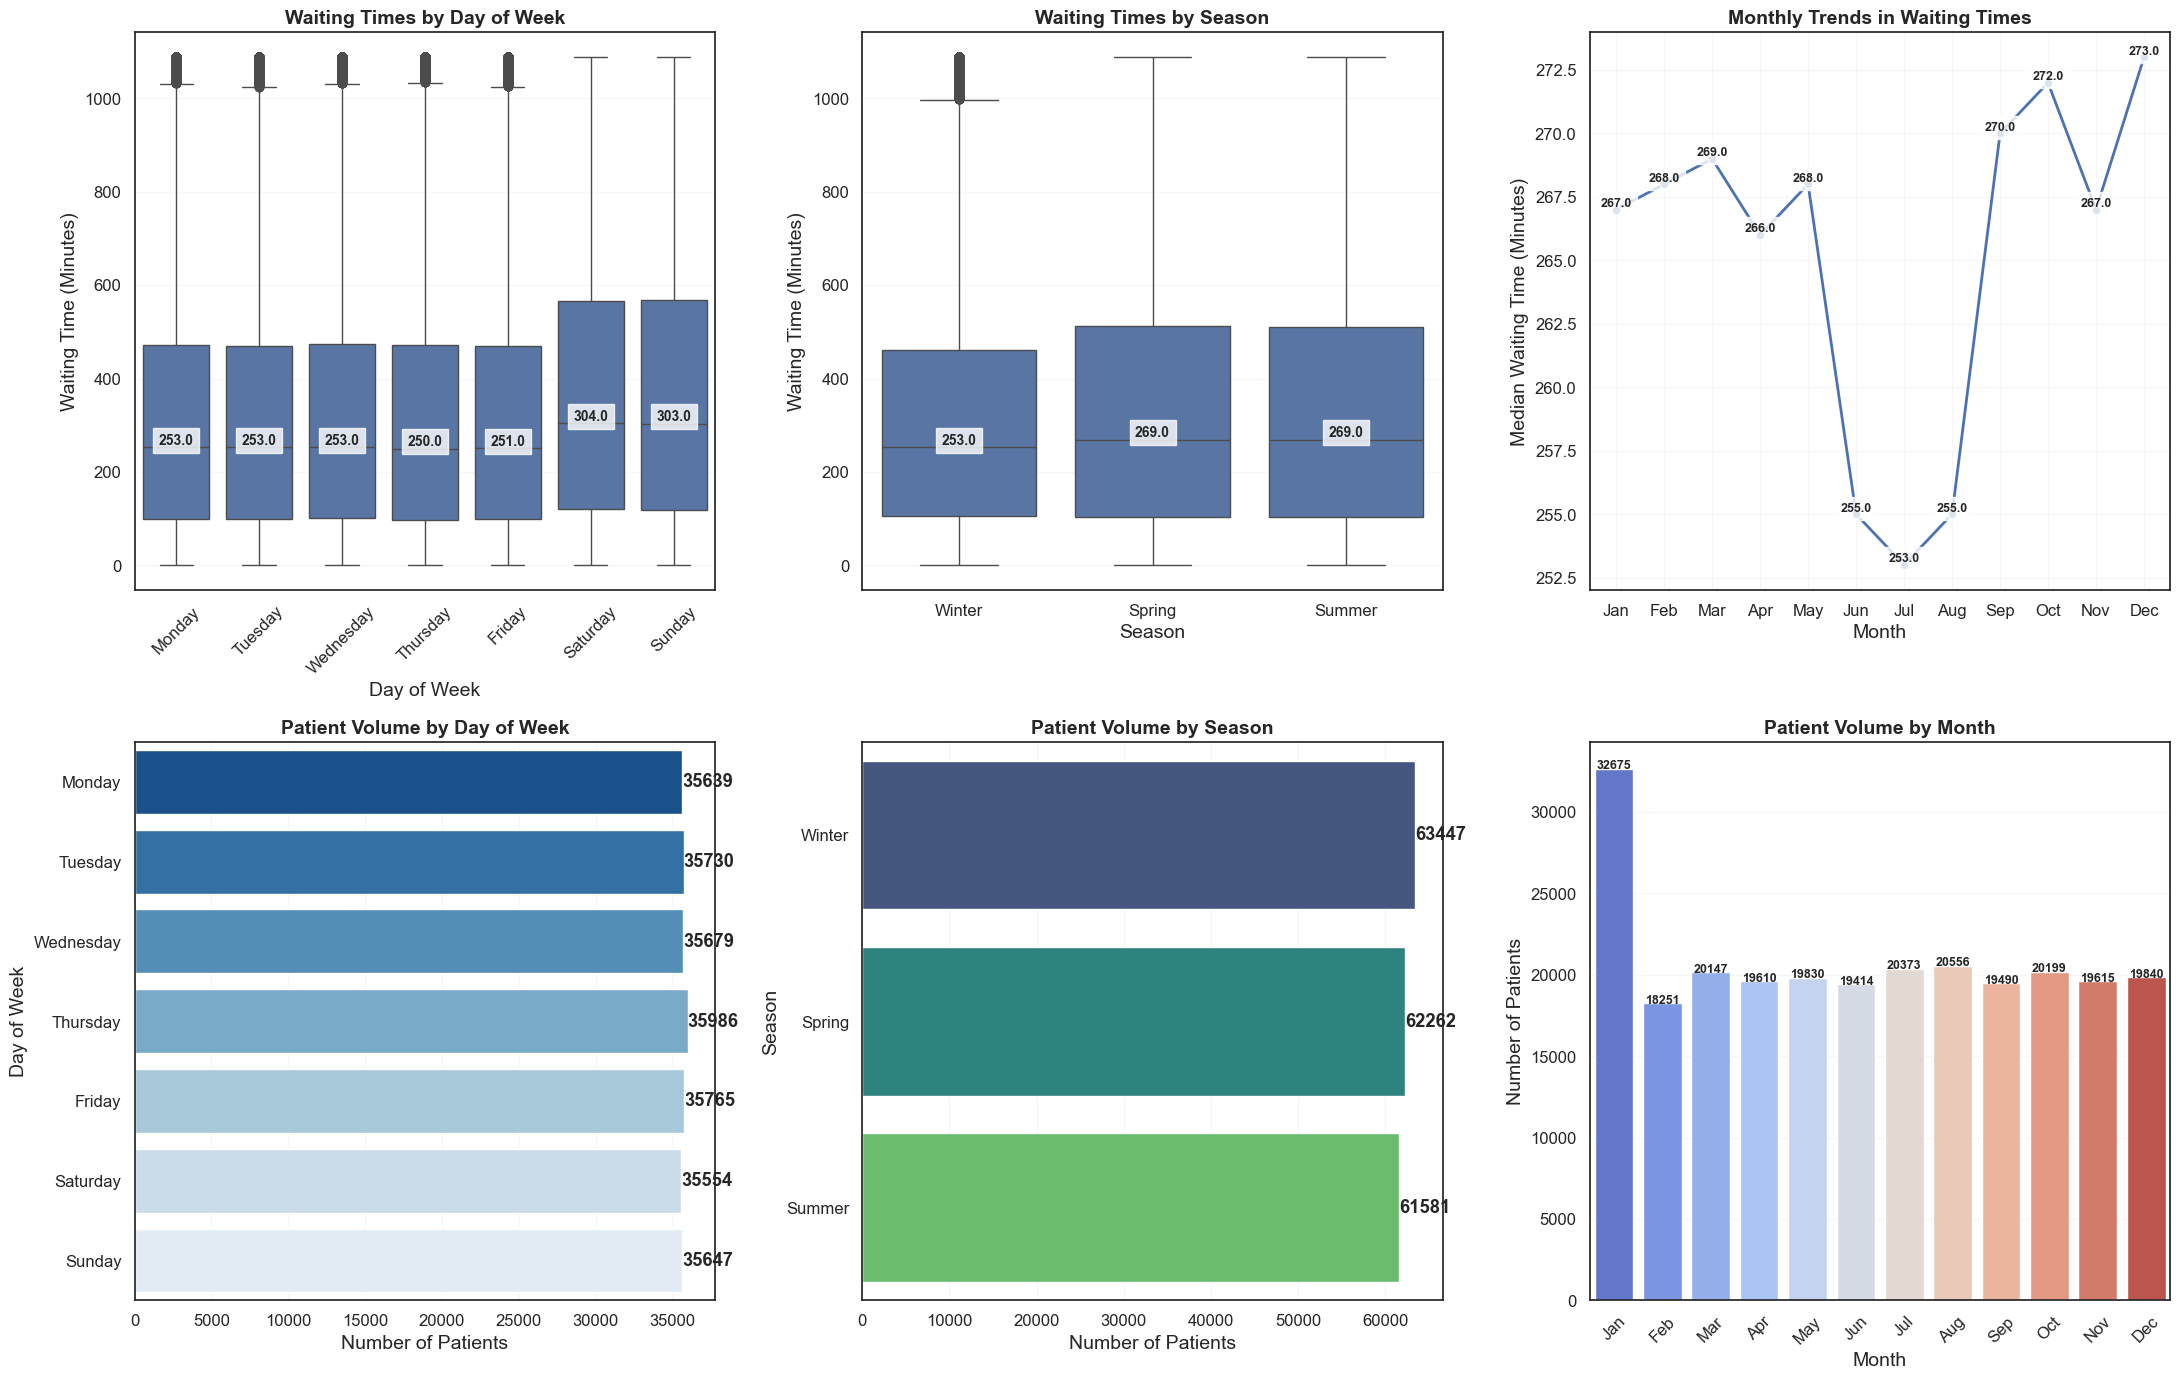

DAY OF WEEK, SEASONAL, AND MONTHLY ANALYSIS

Wait Times by Day of Week:
             median  mean   count   std 
Day_of_Week                             
Monday       253.00 332.80  35639 293.00
Tuesday      253.00 332.10  35730 291.70
Wednesday    253.00 333.30  35679 292.10
Thursday     250.00 331.70  35986 292.40
Friday       251.00 332.50  35765 292.90
Saturday     304.00 386.30  35554 319.50
Sunday       303.00 387.10  35647 322.00

Wait Times by Season:
        median  mean   count   std 
Season                             
Winter  253.00 326.50  63447 280.70
Spring  269.00 354.40  62262 307.70
Summer  269.00 355.50  61581 309.20

Wait Times by Month:
     median  mean   count   std 
Jan  267.00 351.40  32675 306.00
Feb  268.00 353.70  18251 307.80
Mar  269.00 355.20  20147 307.30
Apr  266.00 352.60  19610 307.70
May  268.00 352.50  19830 305.20
Jun  255.00 329.10  19414 284.30
Jul  253.00 329.10  20373 283.70
Aug  255.00 331.90  20556 286.50
Sep  270.00 354.70  19490 308.10
Oct 

In [14]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(22, 14))

# Flatten axes for easier indexing
axes = axes.flatten()

# Define orders for categorical variables
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Get existing values in our data
existing_days = [day for day in day_order if day in df['Day_of_Week'].unique()]
existing_seasons = [season for season in season_order if season in df['Season'].unique()]

# --- Plot 1: Wait Times by Day of Week ---
sns.boxplot(data=df, x='Day_of_Week', y='Waiting_Time_Minutes', order=existing_days, ax=axes[0])
axes[0].set_title('Waiting Times by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Waiting Time (Minutes)')
axes[0].tick_params(axis='x', rotation=45)

# Add median labels
day_medians = df.groupby('Day_of_Week')['Waiting_Time_Minutes'].median().reindex(existing_days)
for i, median_val in enumerate(day_medians.values):
    axes[0].text(i, median_val, f'{median_val:.1f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8))

# --- Plot 2: Wait Times by Season ---
sns.boxplot(data=df, x='Season', y='Waiting_Time_Minutes', order=existing_seasons, ax=axes[1])
axes[1].set_title('Waiting Times by Season', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Waiting Time (Minutes)')

# Add median labels
season_medians = df.groupby('Season')['Waiting_Time_Minutes'].median().reindex(existing_seasons)
for i, median_val in enumerate(season_medians.values):
    axes[1].text(i, median_val, f'{median_val:.1f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8))

# --- Plot 3: Wait Times by Month ---
month_medians = df.groupby('Arrival_Month')['Waiting_Time_Minutes'].median()
sns.lineplot(x=month_medians.index, y=month_medians.values, marker='o', ax=axes[2])
axes[2].set_title('Monthly Trends in Waiting Times', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Median Waiting Time (Minutes)')
axes[2].set_xticks(range(1, 13))
axes[2].set_xticklabels(month_order)

# Add value labels for months
for i, (month, value) in enumerate(month_medians.items()):
    axes[2].text(month, value, f'{value:.1f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=9,
                bbox=dict(facecolor='white', alpha=0.8))

# --- Plot 4: Patient Volume by Day of Week ---
day_counts = df['Day_of_Week'].value_counts().reindex(existing_days)
sns.barplot(x=day_counts.values, y=day_counts.index, palette='Blues_r', ax=axes[3])
axes[3].set_title('Patient Volume by Day of Week', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Number of Patients')
axes[3].set_ylabel('Day of Week')

# Add value labels
for i, v in enumerate(day_counts.values):
    axes[3].text(v + 1, i, f'{v:.0f}', va='center', fontweight='bold')

# --- Plot 5: Patient Volume by Season ---
season_counts = df['Season'].value_counts().reindex(existing_seasons)
sns.barplot(x=season_counts.values, y=season_counts.index, palette='viridis', ax=axes[4])
axes[4].set_title('Patient Volume by Season', fontsize=14, fontweight='bold')
axes[4].set_xlabel('Number of Patients')
axes[4].set_ylabel('Season')

# Add value labels
for i, v in enumerate(season_counts.values):
    axes[4].text(v + 1, i, f'{v:.0f}', va='center', fontweight='bold')

# --- Plot 6: Patient Volume by Month ---
month_counts = df['Arrival_Month'].value_counts().sort_index()
sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm', ax=axes[5])
axes[5].set_title('Patient Volume by Month', fontsize=14, fontweight='bold')
axes[5].set_xlabel('Month')
axes[5].set_ylabel('Number of Patients')
axes[5].set_xticks(range(0, 12))
axes[5].set_xticklabels(month_order, rotation=45)

# Add value labels
for i, v in enumerate(month_counts.values):
    axes[5].text(i, v + 1, f'{v:.0f}', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# --- Statistical Analysis ---
print("DAY OF WEEK, SEASONAL, AND MONTHLY ANALYSIS")
print("=" * 50)

# Day of week statistics
print("\nWait Times by Day of Week:")
day_stats = df.groupby('Day_of_Week')['Waiting_Time_Minutes'].agg(['median', 'mean', 'count', 'std']).round(1)
day_stats = day_stats.reindex(existing_days)
print(day_stats)

# Season statistics
print("\nWait Times by Season:")
season_stats = df.groupby('Season')['Waiting_Time_Minutes'].agg(['median', 'mean', 'count', 'std']).round(1)
season_stats = season_stats.reindex(existing_seasons)
print(season_stats)

# Monthly statistics
print("\nWait Times by Month:")
month_stats = df.groupby('Arrival_Month')['Waiting_Time_Minutes'].agg(['median', 'mean', 'count', 'std']).round(1)
month_stats.index = [month_order[i-1] for i in month_stats.index]
print(month_stats)

# Patient volume analysis
print("\nPatient Volume Analysis:")
print("By Day of Week:")
print(day_counts)
print("\nBy Season:")
print(season_counts)
print("\nBy Month:")
print(month_counts)

# Statistical tests
from scipy.stats import kruskal

# Day of week significance
day_groups = [group['Waiting_Time_Minutes'].values for name, group in df.groupby('Day_of_Week')]
if len(day_groups) >= 2:
    day_stat, day_p = kruskal(*day_groups)
    print(f"\nDay of Week Differences: p-value = {day_p:.4f}")
    if day_p < 0.05:
        print("⇒ Significant differences in wait times across days of the week")
    else:
        print("⇒ No significant differences across days of the week")
else:
    print("\nNot enough day groups for statistical test")

# Season significance
season_groups = [group['Waiting_Time_Minutes'].values for name, group in df.groupby('Season')]
if len(season_groups) >= 2:
    season_stat, season_p = kruskal(*season_groups)
    print(f"Seasonal Differences: p-value = {season_p:.4f}")
    if season_p < 0.05:
        print("⇒ Significant differences in wait times across seasons")
    else:
        print("⇒ No significant differences across seasons")
else:
    print("Not enough season groups for statistical test")

# Monthly significance
month_groups = [group['Waiting_Time_Minutes'].values for name, group in df.groupby('Arrival_Month')]
if len(month_groups) >= 2:
    month_stat, month_p = kruskal(*month_groups)
    print(f"Monthly Differences: p-value = {month_p:.4f}")
    if month_p < 0.05:
        print("⇒ Significant differences in wait times across months")
    else:
        print("⇒ No significant differences across months")
else:
    print("Not enough month groups for statistical test")

# Find peak periods
print("\nPEAK PERIOD ANALYSIS:")
print("Days with longest median wait times:")
top_days = day_stats.nlargest(3, 'median')
for day, stats in top_days.iterrows():
    print(f"  {day}: {stats['median']:.1f} minutes")

print("\nSeasons with longest median wait times:")
top_seasons = season_stats.nlargest(2, 'median')
for season, stats in top_seasons.iterrows():
    print(f"  {season}: {stats['median']:.1f} minutes")

print("\nMonths with longest median wait times:")
top_months = month_stats.nlargest(3, 'median')
for month, stats in top_months.iterrows():
    print(f"  {month}: {stats['median']:.1f} minutes")

# Busiest periods
print("\nBUSIEST PERIODS (Highest Patient Volume):")
print(f"Busiest day: {day_counts.idxmax()} ({day_counts.max()} patients)")
print(f"Busiest season: {season_counts.idxmax()} ({season_counts.max()} patients)")
print(f"Busiest month: {month_order[month_counts.idxmax() - 1]} ({month_counts.max()} patients)")

# Additional insights
print("\nADDITIONAL INSIGHTS:")
print(f"Overall median waiting time: {df['Waiting_Time_Minutes'].median():.1f} minutes")
print(f"Overall mean waiting time: {df['Waiting_Time_Minutes'].mean():.1f} minutes")
print(f"Total patients analyzed: {len(df):,}")

# Check if there are any patterns in wait times
print(f"\nWait time range: {df['Waiting_Time_Minutes'].min():.1f} to {df['Waiting_Time_Minutes'].max():.1f} minutes")
print(f"Standard deviation: {df['Waiting_Time_Minutes'].std():.1f} minutes")

#  Key Insights – Temporal & Operational Factors

### **Weekend Strain**
- Wait times increase by 51–54 minutes (20% longer) on Saturdays and Sundays compared to weekdays, despite similar patient volumes

### **Seasonal Paradox**
- Winter has the highest patient volume but the shortest median wait times (253 mins), suggesting better preparedness or operational efficiency during high-demand periods

### **Year-End Pressure**
- Longest waits occur in September–December (270–273 mins), likely due to holiday staffing shortages, festive season trauma cases, or end-of-year system strain

### **Time-of-Day Patterns**
- Mornings (10–11 AM) have the longest hourly waits (>330 mins)  
- Afternoons (12–5 PM) are the most challenging operational period (300 min median wait)  
- Overnight (0–6 AM) has the shortest waits (245 mins) despite steady patient volume, indicating better flow during these hours

### **Operational Insight**
- Facilities handle high volume more efficiently in winter and overnight, but struggle during weekends, year-end, and midday hours


# 6. Outcome & Patient Flow

### **Outcome**
- Admission, discharge, referral vs. wait times

### **Follow-Up Visits**
- `Follow_Up_Flag` & `Visit_Number` (are repeat patients seen faster?)

### **Socioeconomic Factors**
- `Insurance_Status` & `Employment_Status` vs. wait times (possible disparities)


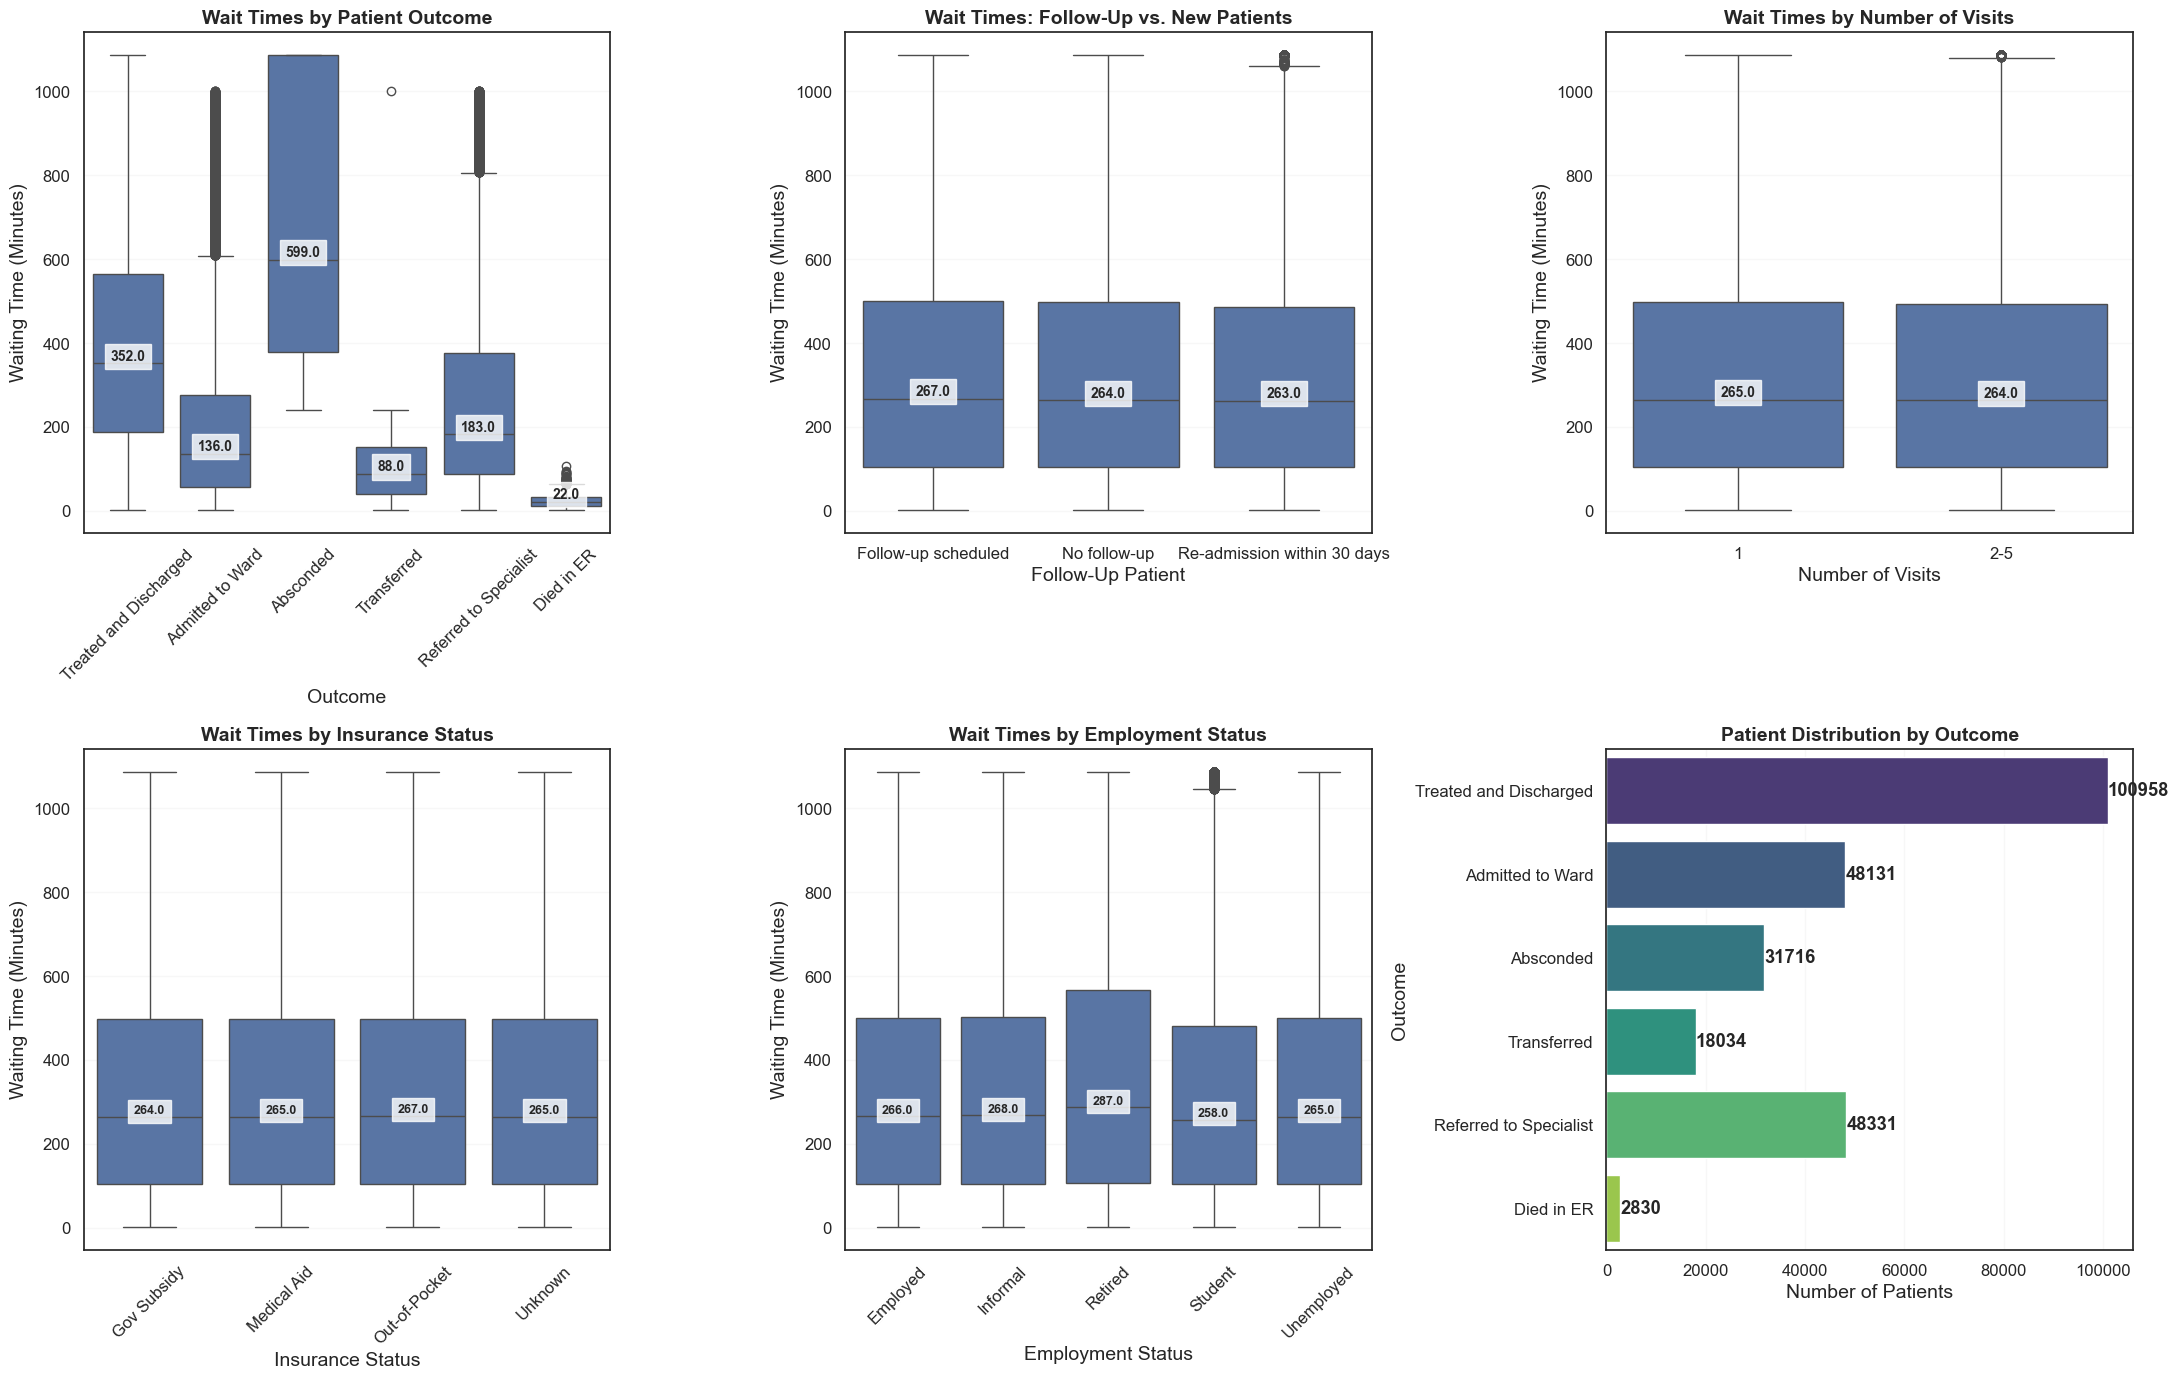

OUTCOME & PATIENT FLOW ANALYSIS

Wait Times by Outcome:
                        median  mean    count   std 
Outcome                                             
Absconded               599.00 685.80   31716 325.00
Admitted to Ward        136.00 200.50   48131 195.80
Died in ER               22.00  23.80    2830  15.40
Referred to Specialist  183.00 261.40   48331 229.50
Transferred              88.00  99.40   18034  68.40
Treated and Discharged  352.00 407.00  100958 284.10

Outcome Differences: p-value = 0.0000
⇒ Significant differences in wait times across outcomes

Follow-Up vs. New Patients:
                             median  mean    count   std 
Follow_Up_Flag                                           
Follow-up scheduled          267.00 349.40   99825 302.40
No follow-up                 264.00 347.30  137577 301.60
Re-admission within 30 days  263.00 343.00   12598 297.70
⇒ Insufficient data for statistical comparison

Wait Times by Visit Number:
             median  mean    c

In [15]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(22, 14))
axes = axes.flatten()

# --- Plot 1: Wait Times by Outcome ---
if 'Outcome' in df.columns:
    outcome_order = ['Treated and Discharged', 'Admitted to Ward', 'Absconded', 'Transferred', 'Referred to Specialist', 'Died in ER']
    existing_outcomes = [outcome for outcome in outcome_order if outcome in df['Outcome'].unique()]
    
    sns.boxplot(data=df, x='Outcome', y='Waiting_Time_Minutes', order=existing_outcomes, ax=axes[0])
    axes[0].set_title('Wait Times by Patient Outcome', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Outcome')
    axes[0].set_ylabel('Waiting Time (Minutes)')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Add median labels
    outcome_medians = df.groupby('Outcome')['Waiting_Time_Minutes'].median().reindex(existing_outcomes)
    for i, median_val in enumerate(outcome_medians.values):
        axes[0].text(i, median_val, f'{median_val:.1f}', 
                    ha='center', va='bottom', fontweight='bold', fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.8))
else:
    axes[0].text(0.5, 0.5, 'Outcome data not available', 
                ha='center', va='center', transform=axes[0].transAxes, fontsize=12)
    axes[0].set_title('Wait Times by Patient Outcome', fontsize=14, fontweight='bold')

# --- Plot 2: Follow-Up Patients vs. Wait Times ---
if 'Follow_Up_Flag' in df.columns:
    sns.boxplot(data=df, x='Follow_Up_Flag', y='Waiting_Time_Minutes', ax=axes[1])
    axes[1].set_title('Wait Times: Follow-Up vs. New Patients', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Follow-Up Patient')
    axes[1].set_ylabel('Waiting Time (Minutes)')
    
    # Add median labels
    followup_medians = df.groupby('Follow_Up_Flag')['Waiting_Time_Minutes'].median()
    for i, median_val in enumerate(followup_medians.values):
        axes[1].text(i, median_val, f'{median_val:.1f}', 
                    ha='center', va='bottom', fontweight='bold', fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.8))
else:
    axes[1].text(0.5, 0.5, 'Follow-Up data not available', 
                ha='center', va='center', transform=axes[1].transAxes, fontsize=12)
    axes[1].set_title('Wait Times: Follow-Up vs. New Patients', fontsize=14, fontweight='bold')

# --- Plot 3: Wait Times by Visit Number ---
if 'Visit_Number' in df.columns:
    # Group visit numbers for better visualization
    df['Visit_Group'] = df['Visit_Number'].apply(lambda x: '1' if x == 1 else ('2-5' if 2 <= x <= 5 else '6+'))
    
    visit_order = ['1', '2-5', '6+']
    existing_visits = [visit for visit in visit_order if visit in df['Visit_Group'].unique()]
    
    sns.boxplot(data=df, x='Visit_Group', y='Waiting_Time_Minutes', order=existing_visits, ax=axes[2])
    axes[2].set_title('Wait Times by Number of Visits', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Number of Visits')
    axes[2].set_ylabel('Waiting Time (Minutes)')
    
    # Add median labels
    visit_medians = df.groupby('Visit_Group')['Waiting_Time_Minutes'].median().reindex(existing_visits)
    for i, median_val in enumerate(visit_medians.values):
        axes[2].text(i, median_val, f'{median_val:.1f}', 
                    ha='center', va='bottom', fontweight='bold', fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.8))
else:
    axes[2].text(0.5, 0.5, 'Visit Number data not available', 
                ha='center', va='center', transform=axes[2].transAxes, fontsize=12)
    axes[2].set_title('Wait Times by Number of Visits', fontsize=14, fontweight='bold')

# --- Plot 4: Wait Times by Insurance Status ---
if 'Insurance_Status' in df.columns:
    insurance_order = sorted(df['Insurance_Status'].unique())  # Adjust based on your actual values
    
    sns.boxplot(data=df, x='Insurance_Status', y='Waiting_Time_Minutes', order=insurance_order, ax=axes[3])
    axes[3].set_title('Wait Times by Insurance Status', fontsize=14, fontweight='bold')
    axes[3].set_xlabel('Insurance Status')
    axes[3].set_ylabel('Waiting Time (Minutes)')
    axes[3].tick_params(axis='x', rotation=45)
    
    # Add median labels
    insurance_medians = df.groupby('Insurance_Status')['Waiting_Time_Minutes'].median().reindex(insurance_order)
    for i, median_val in enumerate(insurance_medians.values):
        axes[3].text(i, median_val, f'{median_val:.1f}', 
                    ha='center', va='bottom', fontweight='bold', fontsize=9,
                    bbox=dict(facecolor='white', alpha=0.8))
else:
    axes[3].text(0.5, 0.5, 'Insurance data not available', 
                ha='center', va='center', transform=axes[3].transAxes, fontsize=12)
    axes[3].set_title('Wait Times by Insurance Status', fontsize=14, fontweight='bold')

# --- Plot 5: Wait Times by Employment Status ---
if 'Employment_Status' in df.columns:
    employment_order = sorted(df['Employment_Status'].unique())  # Adjust based on your actual values
    
    sns.boxplot(data=df, x='Employment_Status', y='Waiting_Time_Minutes', order=employment_order, ax=axes[4])
    axes[4].set_title('Wait Times by Employment Status', fontsize=14, fontweight='bold')
    axes[4].set_xlabel('Employment Status')
    axes[4].set_ylabel('Waiting Time (Minutes)')
    axes[4].tick_params(axis='x', rotation=45)
    
    # Add median labels
    employment_medians = df.groupby('Employment_Status')['Waiting_Time_Minutes'].median().reindex(employment_order)
    for i, median_val in enumerate(employment_medians.values):
        axes[4].text(i, median_val, f'{median_val:.1f}', 
                    ha='center', va='bottom', fontweight='bold', fontsize=9,
                    bbox=dict(facecolor='white', alpha=0.8))
else:
    axes[4].text(0.5, 0.5, 'Employment data not available', 
                ha='center', va='center', transform=axes[4].transAxes, fontsize=12)
    axes[4].set_title('Wait Times by Employment Status', fontsize=14, fontweight='bold')

# --- Plot 6: Patient Distribution by Outcome ---
if 'Outcome' in df.columns:
    outcome_order = ['Treated and Discharged', 'Admitted to Ward', 'Absconded', 'Transferred', 'Referred to Specialist', 'Died in ER']
    existing_outcomes = [outcome for outcome in outcome_order if outcome in df['Outcome'].unique()]
    
    outcome_counts = df['Outcome'].value_counts().reindex(existing_outcomes)
    sns.barplot(x=outcome_counts.values, y=outcome_counts.index, palette='viridis', ax=axes[5], order=existing_outcomes)
    axes[5].set_title('Patient Distribution by Outcome', fontsize=14, fontweight='bold')
    axes[5].set_xlabel('Number of Patients')
    axes[5].set_ylabel('Outcome')
    
    # Add value labels
    for i, v in enumerate(outcome_counts.values):
        axes[5].text(v + 1, i, f'{v:.0f}', va='center', fontweight='bold')
else:
    axes[5].text(0.5, 0.5, 'Outcome data not available', 
                ha='center', va='center', transform=axes[5].transAxes, fontsize=12)
    axes[5].set_title('Patient Distribution by Outcome', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# --- Statistical Analysis ---
print("OUTCOME & PATIENT FLOW ANALYSIS")
print("=" * 40)

# Outcome analysis
if 'Outcome' in df.columns:
    print("\nWait Times by Outcome:")
    outcome_stats = df.groupby('Outcome')['Waiting_Time_Minutes'].agg(['median', 'mean', 'count', 'std']).round(1)
    print(outcome_stats)
    
    # Statistical test for outcome differences
    from scipy.stats import kruskal
    outcome_groups = [group['Waiting_Time_Minutes'].values for name, group in df.groupby('Outcome')]
    outcome_stat, outcome_p = kruskal(*outcome_groups)
    print(f"\nOutcome Differences: p-value = {outcome_p:.4f}")
    if outcome_p < 0.05:
        print("⇒ Significant differences in wait times across outcomes")
    else:
        print("⇒ No significant differences across outcomes")
else:
    print("\nOutcome data not available for analysis")

# Follow-up analysis
if 'Follow_Up_Flag' in df.columns:
    print("\nFollow-Up vs. New Patients:")
    followup_stats = df.groupby('Follow_Up_Flag')['Waiting_Time_Minutes'].agg(['median', 'mean', 'count', 'std']).round(1)
    print(followup_stats)
    
    # Mann-Whitney test for follow-up vs new patients
    from scipy.stats import mannwhitneyu
    followup_data = df[df['Follow_Up_Flag'] == True]['Waiting_Time_Minutes']
    new_data = df[df['Follow_Up_Flag'] == False]['Waiting_Time_Minutes']
    
    if len(followup_data) > 5 and len(new_data) > 5:
        stat, p_value = mannwhitneyu(followup_data, new_data)
        print(f"Follow-Up vs New Patients: p-value = {p_value:.4f}")
        if p_value < 0.05:
            if followup_stats.loc[True, 'median'] < followup_stats.loc[False, 'median']:
                print("⇒ Follow-up patients are seen significantly faster")
            else:
                print("⇒ Follow-up patients have significantly longer wait times")
        else:
            print("⇒ No significant difference between follow-up and new patients")
    else:
        print("⇒ Insufficient data for statistical comparison")
else:
    print("\nFollow-Up data not available for analysis")

# Visit number analysis
if 'Visit_Number' in df.columns:
    print("\nWait Times by Visit Number:")
    visit_stats = df.groupby('Visit_Group')['Waiting_Time_Minutes'].agg(['median', 'mean', 'count', 'std']).round(1)
    print(visit_stats)
    
    # Statistical test for visit number differences
    visit_groups = [group['Waiting_Time_Minutes'].values for name, group in df.groupby('Visit_Group')]
    visit_stat, visit_p = kruskal(*visit_groups)
    print(f"\nVisit Number Differences: p-value = {visit_p:.4f}")
    if visit_p < 0.05:
        print("⇒ Significant differences in wait times across visit groups")
    else:
        print("⇒ No significant differences across visit groups")
else:
    print("\nVisit Number data not available for analysis")

# Insurance status analysis
if 'Insurance_Status' in df.columns:
    print("\nWait Times by Insurance Status:")
    insurance_stats = df.groupby('Insurance_Status')['Waiting_Time_Minutes'].agg(['median', 'mean', 'count', 'std']).round(1)
    print(insurance_stats)
    
    # Statistical test for insurance differences
    insurance_groups = [group['Waiting_Time_Minutes'].values for name, group in df.groupby('Insurance_Status')]
    insurance_stat, insurance_p = kruskal(*insurance_groups)
    print(f"\nInsurance Status Differences: p-value = {insurance_p:.4f}")
    if insurance_p < 0.05:
        print("⇒ Significant differences in wait times across insurance types")
        # Find which insurance type has the longest wait
        longest_wait_insurance = insurance_stats['median'].idxmax()
        print(f"⇒ Patients with {longest_wait_insurance} insurance have the longest wait times")
    else:
        print("⇒ No significant differences across insurance types")
else:
    print("\nInsurance data not available for analysis")

# Employment status analysis
if 'Employment_Status' in df.columns:
    print("\nWait Times by Employment Status:")
    employment_stats = df.groupby('Employment_Status')['Waiting_Time_Minutes'].agg(['median', 'mean', 'count', 'std']).round(1)
    print(employment_stats)
    
    # Statistical test for employment differences
    employment_groups = [group['Waiting_Time_Minutes'].values for name, group in df.groupby('Employment_Status')]
    employment_stat, employment_p = kruskal(*employment_groups)
    print(f"\nEmployment Status Differences: p-value = {employment_p:.4f}")
    if employment_p < 0.05:
        print("⇒ Significant differences in wait times across employment statuses")
        # Find which employment status has the longest wait
        longest_wait_employment = employment_stats['median'].idxmax()
        print(f"⇒ {longest_wait_employment} patients have the longest wait times")
    else:
        print("⇒ No significant differences across employment statuses")
else:
    print("\nEmployment data not available for analysis")

# Key findings summary
print("\n" + "="*50)
print("KEY FINDINGS SUMMARY")
print("="*50)

if 'Outcome' in df.columns:
    longest_outcome = outcome_stats['median'].idxmax()
    shortest_outcome = outcome_stats['median'].idxmin()
    print(f"• Longest waits: {longest_outcome} patients ({outcome_stats.loc[longest_outcome, 'median']} min)")
    print(f"• Shortest waits: {shortest_outcome} patients ({outcome_stats.loc[shortest_outcome, 'median']} min)")

if 'Follow_Up_Flag' in df.columns:
    followup_median = followup_stats.loc[True, 'median'] if True in followup_stats.index else None
    new_median = followup_stats.loc[False, 'median'] if False in followup_stats.index else None
    if followup_median and new_median:
        if followup_median < new_median:
            print(f"• Follow-up patients seen {new_median - followup_median:.1f} min faster than new patients")
        else:
            print(f"• Follow-up patients wait {followup_median - new_median:.1f} min longer than new patients")

if 'Insurance_Status' in df.columns and insurance_p < 0.05:
    max_wait = insurance_stats['median'].max()
    min_wait = insurance_stats['median'].min()
    print(f"• Insurance disparity: {max_wait - min_wait:.1f} min difference between insurance types")

if 'Employment_Status' in df.columns and employment_p < 0.05:
    max_wait = employment_stats['median'].max()
    min_wait = employment_stats['median'].min()
    print(f"• Employment disparity: {max_wait - min_wait:.1f} min difference between employment statuses")

#  Key Findings – Outcome & Patient Flow

- **Longest wait times:** Absconded patients (599 mins)  
- **Shortest wait times:** Patients who died in ER (22 mins)  
- **Outcome differences:** Statistically significant (p = 0.0000)  
- **Follow-up visits:** No clear pattern; insufficient data for statistical comparison  
- **Visit number:** No significant difference between first-time and repeat visits (p = 0.4500)  
- **Insurance status:** No significant differences in wait times across insurance types (p = 0.7877)  
- **Employment status:** Significant differences (p = 0.0000); retired patients wait longest (287 mins)  
- **Socioeconomic insight:** Employment may influence wait times more than insurance type



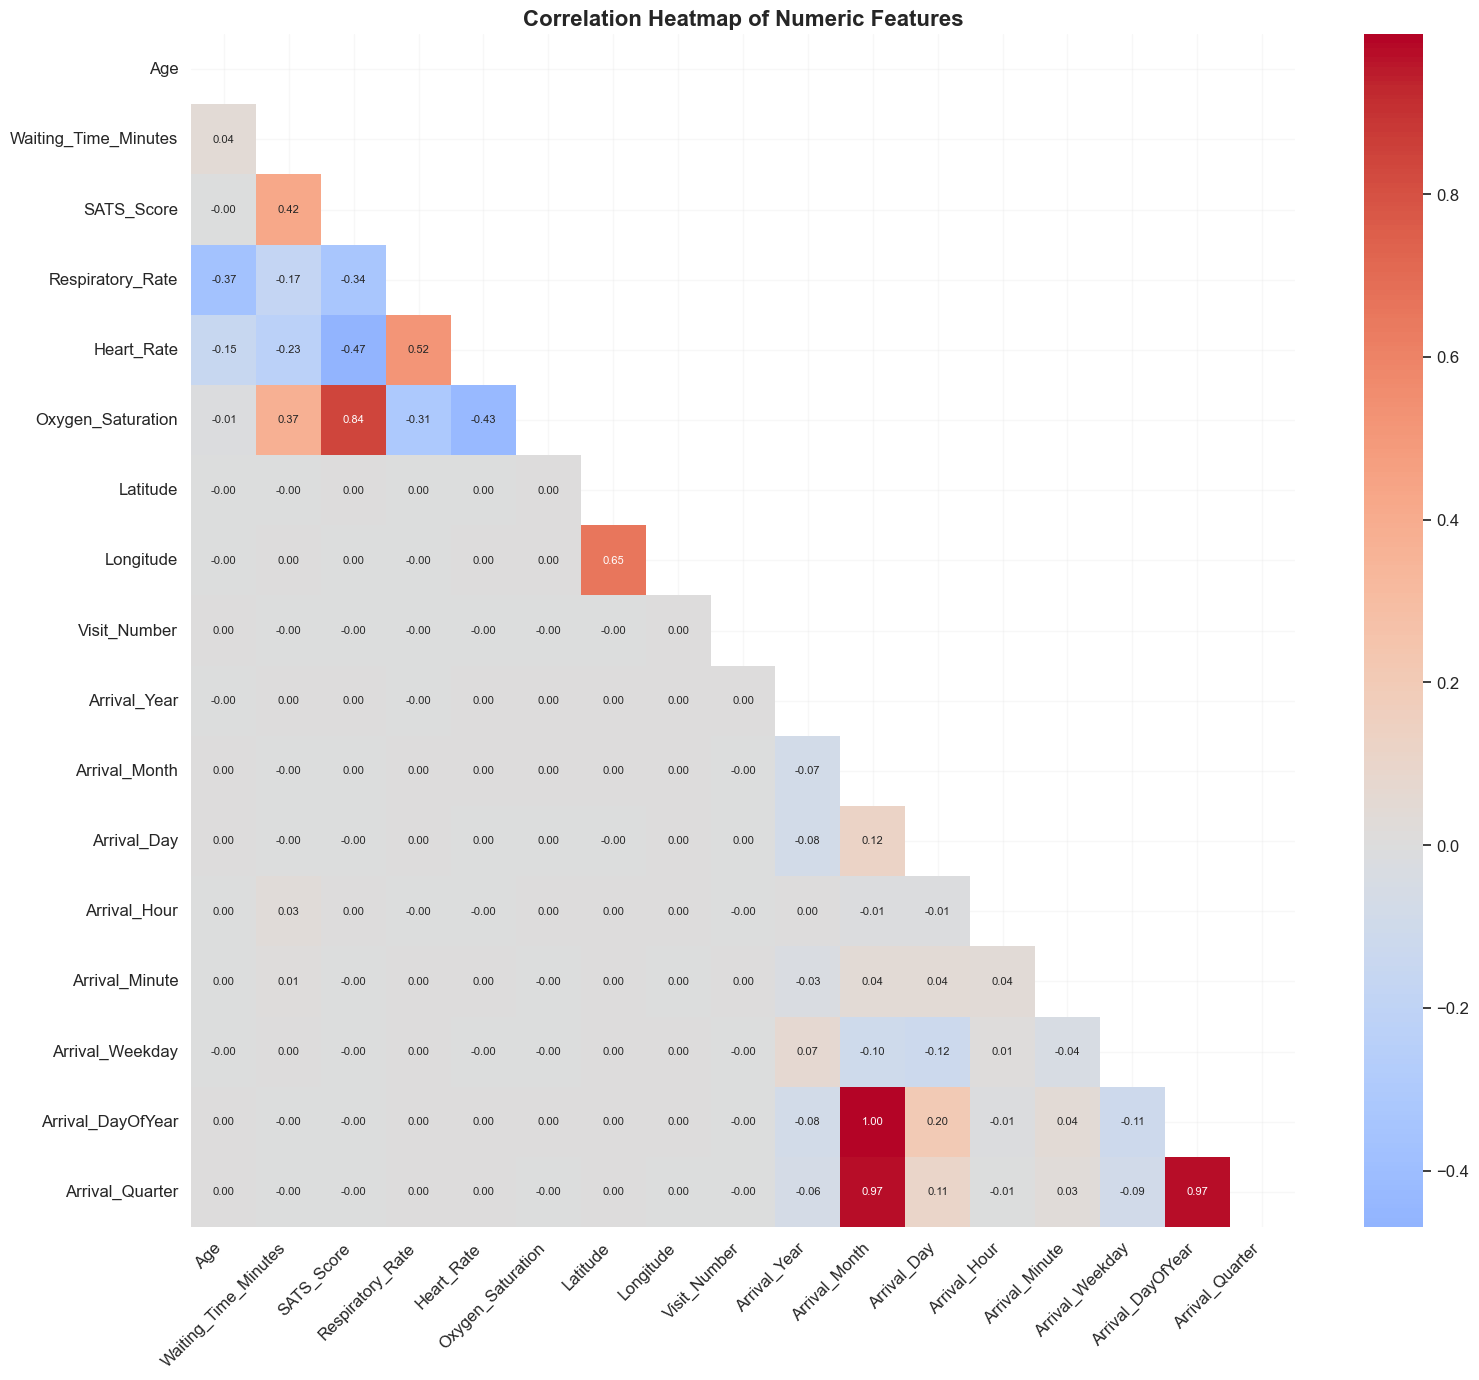

In [ ]:
# Compute correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=['float32', 'float64', 'int32', 'int64', 'int8']).columns
correlation_matrix = df[numeric_cols].corr()

# Create a mask for the upper triangle

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, mask=mask, cmap="coolwarm", center=0, 
                annot=True, fmt=".2f", annot_kws={'size': 8})
plt.title("Correlation Heatmap of Numeric Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [17]:

# =====================================
# STATISTICAL CORRELATION ANALYSIS
# =====================================
from scipy.stats import pearsonr, spearmanr

print("\n" + "="*60)
print("STATISTICAL CORRELATION ANALYSIS")
print("="*60)

if 'Waiting_Time_Minutes' in df.columns:
    # Calculate correlations with statistical significance
    correlation_results = []
    
    for col in numeric_cols:
        if col != 'Waiting_Time_Minutes':
            # Remove missing values for this pair
            valid_data = df[[col, 'Waiting_Time_Minutes']].dropna()
            
            if len(valid_data) > 10:  # Only calculate if enough data
                try:
                    pearson_corr, pearson_p = pearsonr(valid_data[col], valid_data['Waiting_Time_Minutes'])
                    spearman_corr, spearman_p = spearmanr(valid_data[col], valid_data['Waiting_Time_Minutes'])
                    
                    correlation_results.append({
                        'feature': col,
                        'pearson_corr': pearson_corr,
                        'pearson_p': pearson_p,
                        'spearman_corr': spearman_corr,
                        'spearman_p': spearman_p,
                        'n': len(valid_data)
                    })
                except:
                    continue
    
    # Sort by absolute Spearman correlation (most relevant for non-linear relationships)
    correlation_results.sort(key=lambda x: abs(x['spearman_corr']), reverse=True)
    
    # Print results in a formatted table
    print(f"\n{'Feature':25s} {'Pearson r':>10s} {'p-value':>10s} {'Spearman ρ':>10s} {'p-value':>10s} {'N':>6s}")
    print("-" * 75)
    
    for result in correlation_results:
        pearson_sig = "*" if result['pearson_p'] < 0.05 else " "
        spearman_sig = "*" if result['spearman_p'] < 0.05 else " "
        
        print(f"{result['feature']:25s} {result['pearson_corr']:9.3f}{pearson_sig} {result['pearson_p']:9.4f} "
              f"{result['spearman_corr']:9.3f}{spearman_sig} {result['spearman_p']:9.4f} {result['n']:6d}")
    
    print("\n* indicates statistically significant correlation (p < 0.05)")
    
else:
    print("Waiting time data not available for statistical analysis")

# =====================================
# KEY FINDINGS SUMMARY
# =====================================
print("\n" + "="*50)
print("KEY FINDINGS SUMMARY")
print("="*50)

if 'Waiting_Time_Minutes' in df.columns and len(correlation_results) > 0:
    # Find strongest correlations
    significant_correlations = [r for r in correlation_results if r['spearman_p'] < 0.05]
    
    if significant_correlations:
        # Strongest positive correlation
        positive_corrs = [r for r in significant_correlations if r['spearman_corr'] > 0]
        if positive_corrs:
            strongest_positive = max(positive_corrs, key=lambda x: x['spearman_corr'])
            print(f"• Strongest positive correlation: {strongest_positive['feature']} (ρ = {strongest_positive['spearman_corr']:.3f})")
            print(f"  ⇒ As {strongest_positive['feature']} increases, wait time tends to increase")
        
        # Strongest negative correlation
        negative_corrs = [r for r in significant_correlations if r['spearman_corr'] < 0]
        if negative_corrs:
            strongest_negative = min(negative_corrs, key=lambda x: x['spearman_corr'])
            print(f"• Strongest negative correlation: {strongest_negative['feature']} (ρ = {strongest_negative['spearman_corr']:.3f})")
            print(f"  ⇒ As {strongest_negative['feature']} increases, wait time tends to decrease")
        
        print(f"\n• Found {len(significant_correlations)} statistically significant correlations with wait times")
        
        # Categorize correlation strength
        strong_corrs = [r for r in significant_correlations if abs(r['spearman_corr']) > 0.5]
        moderate_corrs = [r for r in significant_correlations if 0.3 < abs(r['spearman_corr']) <= 0.5]
        weak_corrs = [r for r in significant_correlations if 0.1 < abs(r['spearman_corr']) <= 0.3]
        
        if strong_corrs:
            print(f"  - {len(strong_corrs)} strong correlations (|ρ| > 0.5)")
        if moderate_corrs:
            print(f"  - {len(moderate_corrs)} moderate correlations (0.3 < |ρ| ≤ 0.5)")
        if weak_corrs:
            print(f"  - {len(weak_corrs)} weak correlations (0.1 < |ρ| ≤ 0.3)")
    
    else:
        print("• No statistically significant correlations found with wait times")
    
    # Most surprising findings (statistically significant but weak)
    surprising_findings = [r for r in significant_correlations if abs(r['spearman_corr']) < 0.2]
    if surprising_findings:
        print(f"\n• {len(surprising_findings)} statistically significant but weak correlations found:")
        for finding in surprising_findings[:3]:  # Show top 3
            print(f"  - {finding['feature']} (ρ = {finding['spearman_corr']:.3f})")
    
    # Features with no correlation
    non_significant = [r for r in correlation_results if r['spearman_p'] >= 0.05]
    if non_significant:
        print(f"\n• {len(non_significant)} features show no significant correlation with wait times")

else:
    print("Insufficient data for key findings summary")

# =====================================
# PRACTICAL RECOMMENDATIONS
# =====================================
print("\n" + "="*50)
print("PRACTICAL RECOMMENDATIONS")
print("="*50)

if 'Waiting_Time_Minutes' in df.columns and len(significant_correlations) > 0:
    # Identify actionable insights
    actionable_features = []
    
    for corr in significant_correlations:
        feature = corr['feature']
        strength = abs(corr['spearman_corr'])
        
        # Consider features with at least moderate correlation
        if strength > 0.3:
            actionable_features.append((feature, corr['spearman_corr'], strength))
    
    if actionable_features:
        print("Based on correlation analysis, consider these focus areas:")
        
        # Sort by correlation strength
        actionable_features.sort(key=lambda x: x[2], reverse=True)
        
        for feature, correlation, strength in actionable_features[:5]:  # Top 5 recommendations
            if correlation > 0:
                print(f"• Address high {feature} values (strong positive correlation with wait times)")
            else:
                print(f"• Leverage {feature} (higher values associated with shorter wait times)")
    else:
        print("No strong actionable correlations identified. Focus on other factors beyond measured variables.")
        
    # Data quality recommendations
    low_n_features = [r for r in correlation_results if r['n'] < 50]
    if low_n_features:
        print(f"\nData quality note: {len(low_n_features)} features have limited data (<50 observations)")
        print("Consider collecting more data for these variables:")
        for feature in low_n_features[:3]:
            print(f"  - {feature['feature']} (n={feature['n']})")
else:
    print("Insufficient data for practical recommendations")


STATISTICAL CORRELATION ANALYSIS

Feature                    Pearson r    p-value Spearman ρ    p-value      N
---------------------------------------------------------------------------
Oxygen_Saturation             0.373*    0.0000     0.468*    0.0000 250000
SATS_Score                    0.421*    0.0000     0.468*    0.0000 250000
Heart_Rate                   -0.226*    0.0000    -0.299*    0.0000 250000
Respiratory_Rate             -0.172*    0.0000    -0.250*    0.0000 250000
Arrival_Hour                  0.028*    0.0000     0.026*    0.0000 250000
Age                           0.043*    0.0000     0.025*    0.0000 250000
Arrival_Minute                0.008*    0.0001     0.009*    0.0000 250000
Longitude                     0.002     0.2341    -0.004*    0.0390 250000
Arrival_Day                  -0.002     0.4301    -0.002     0.3884 250000
Visit_Number                 -0.002     0.3048    -0.002     0.4445 250000
Arrival_Year                  0.002     0.3022     0.001     0

## 4.  Model Development

### **Problem Type**
- [Regression / Classification]

### **Algorithms Tested**
- Decision Tree, Random Forest, Logistic Regression, etc.

### **Evaluation Metrics**
- Accuracy, F1-score, RMSE, etc.

### **Key Predictors**
- [Feature importance list]

### **Final Model Insights**
- [Operational recommendations based on predictions]



## 5. ⚙️ Feature Engineering

### **Encoding Categorical Variables**
- **One-hot encoding** for nominal features (e.g., `Insurance_Status`, `Outcome`)
- **Label encoding** for ordinal features (e.g., `Severity_Level`)

### **Feature Scaling / Normalization**
- Apply **StandardScaler** or **MinMaxScaler** to numerical features to improve model performance

### **Feature Selection**
- **Correlation analysis** to remove highly collinear features
- **Importance-based selection** using tree-based models


In [18]:
#CREATE MODEL DATAFRAME FOR MODELING
Model = df.copy()

Model.head(2)

Province              Facility_Name              Age Gender Race_Demographic Chief_Complaint ICD-10_Code Triage_Category  Department  Day_of_Week  Season  Waiting_Time_Minutes         Outcome         Insurance_Status Employment_Status Urban_Rural Follow_Up_Flag  SATS_Score  Respiratory_Rate  Heart_Rate  Oxygen_Saturation  Latitude  Longitude Facility_Capacity Staffing_Level  Visit_Number Age_Category   Arrival_DateTime   Arrival_Year  Arrival_Month  Arrival_Day  Arrival_Hour  Arrival_Minute  Arrival_Weekday  Arrival_DayOfYear  Arrival_Quarter Complaint_Category Visit_Group
0   Eastern Cape   Nelson Mandela Academic Hospital 29.00  Male      Coloured       Fractured Arm       R69         Green        Antenatal      Sunday  Spring         306.00         Treated and Discharged    Gov Subsidy        Employed         Urban    No follow-up     10.00          12.00            0.00         98.00          -31.41    27.14            High           Normal           1         18-29     2022-10-05 08:15:00      2022           10             5             8             15               2                278                4               Other             1    
1  KwaZulu-Natal  Prince Mshiyeni Memorial Hospital 81.00  Male         Black       Cough & Fever     A15.0           Red      Paediatrics   Wednesday  Winter          41.00               Admitted to Ward    Gov Subsidy         Retired         Urban    No follow-up      2.00          40.00          158.00         81.00          -28.84    29.05          Medium          Reduced           1         80-89     2022-08-28 14:44:00      2022            8            28            14             44               6                240                3               Other             1

In [19]:
Model.drop(columns=['Arrival_DateTime','Visit_Group'],inplace=True)

#  Feature Encoding Strategy – Tree-Based Models

## Model Choice Note
> Linear/logistic models were considered, but due to the high-cardinality categorical features and complex relationships in the data, tree-based models were chosen for their ability to handle categorical and ordinal variables naturally and provide robust predictive performance. This simplifies preprocessing and reduces feature explosion.

---

## 1. Low-Cardinality Features (safe for tree-based models)
These features have ≤10 unique values. Label/ordinal encoding is sufficient.

| Feature | Unique Values | Tree-Based | Notes |
|---------|---------------|------------|-------|
| Province | 5 | Label/Ordinal ✅ | Small number of categories |
| Gender | 5 | Label/Ordinal ✅ | Binary feature |
| Race_Demographic | 5 | Label/Ordinal ✅ | Small categories |
| Triage_Category | 6 | Ordinal/Label ✅ | Preserves severity order |
| Day_of_Week | 7 | Label/Ordinal ✅ | Numeric 0–6 for trees |
| Season | 4 | Label/Ordinal ✅ | Numeric 1–4 |
| Outcome | 6 | Label/Ordinal ✅ | If used as feature, not target |
| Insurance_Status | 4 | Label/Ordinal ✅ | Low-cardinality |
| Employment_Status | 5 | Label/Ordinal ✅ | Small number of categories |
| Urban_Rural | 2 | 0/1 ✅ | Binary, easy for trees |
| Follow_Up_Flag | 3 | Label/Ordinal ✅ | Low-cardinality |
| Facility_Capacity | 5 | Label/Ordinal ✅ | Small number of categories |
| Staffing_Level | 3 | Label/Ordinal ✅ | Small number of categories |
| Age_Category | 9 | Ordinal/Label ✅ | Preserves age order |

---

## 2. Medium/High-Cardinality Features (special handling)
These features have >10 unique values. Trees handle these efficiently with label encoding.

| Feature | Unique Values | Tree-Based Strategy | Notes |
|---------|---------------|-------------------|-------|
| Facility_Name | 92 | Label encoding ✅ | Optional: frequency encoding |
| Chief_Complaint | 56 | Label encoding ✅ | Reduces sparsity |
| ICD-10_Code | 29 | Label encoding ✅ | High-cardinality handled easily |
| Department | 73 | Label encoding ✅ | Reduces feature explosion |

---

## 3. Quick Guidelines

- **Tree-based models:** label/ordinal encoding is sufficient; high-cardinality features don’t explode the feature space.  
- **Grouping rare categories** is optional, but can help with interpretability and analysis.  
- Preprocessing for trees is simpler and robust to messy categorical data.


In [21]:
from sklearn.preprocessing import LabelEncoder


def preprocess_categorical_features(df, low_card_features=None, high_card_features=None, top_n=10):
    """
    Preprocess categorical features with appropriate encoding strategies
    
    Parameters:
    df: pandas DataFrame
    low_card_features: list of low-cardinality column names
    high_card_features: list of high-cardinality column names  
    top_n: number of top categories to keep for high-cardinality features
    
    Returns:
    df: processed DataFrame
    le_dict: dictionary of fitted label encoders
    """
    
    # Default feature lists if not provided
    if low_card_features is None:
        low_card_features = [
            "Province", "Gender", "Race_Demographic", "Triage_Category", "Day_of_Week",
            "Season", "Outcome", "Insurance_Status", "Employment_Status",
            "Urban_Rural", "Follow_Up_Flag", "Facility_Capacity", "Staffing_Level",
            "Age_Category","Complaint_Category"
        ]
    
    if high_card_features is None:
        high_card_features = ["Facility_Name", "Chief_Complaint", "ICD-10_Code", "Department"]
    
    le_dict = {}
    
    # -------------------------
    # 1. Low-Cardinality Features
    # -------------------------
    for col in low_card_features:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            le_dict[col] = le
        else:
            print(f"Warning: Column '{col}' not found in DataFrame")
    
    # -------------------------
    # 2. High-Cardinality Features
    # -------------------------
    def group_rare_categories(series, top_n=10):
        """Group rare categories into 'Other'"""
        value_counts = series.value_counts()
        top_categories = value_counts.nlargest(top_n).index
        return series.apply(lambda x: x if x in top_categories else "Other")
    
    for col in high_card_features:
        if col in df.columns:
            # Handle NaN values first
            df[col] = df[col].fillna('Unknown')
            
            # Group rare categories
            df[col] = group_rare_categories(df[col].astype(str), top_n=top_n)
            
            # Label encode
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            le_dict[col] = le
        else:
            print(f"Warning: Column '{col}' not found in DataFrame")
    
    return df, le_dict

# Usage
Model, le_dict = preprocess_categorical_features(Model)

# -------------------------
# 3. Quick Check with more info
# -------------------------
print("DataFrame shape:", Model.shape)
print("\nFirst 5 rows:")
print(Model.head())
print("\nData types:")
print(Model.dtypes)
print("\nMissing values per column:")
print(Model.isnull().sum())

DataFrame shape: (250000, 36)

First 5 rows:
   Province  Facility_Name   Age  Gender  Race_Demographic  Chief_Complaint  ICD-10_Code  Triage_Category  Department  Day_of_Week  Season  Waiting_Time_Minutes  Outcome  Insurance_Status  Employment_Status  Urban_Rural  Follow_Up_Flag  SATS_Score  Respiratory_Rate  Heart_Rate  Oxygen_Saturation  Latitude  Longitude  Facility_Capacity  Staffing_Level  Visit_Number  Age_Category  Arrival_Year  Arrival_Month  Arrival_Day  Arrival_Hour  Arrival_Minute  Arrival_Weekday  Arrival_DayOfYear  Arrival_Quarter  Complaint_Category
0      0           6       29.00     2            1                7              7              1              0           3          1           306.00            5             0                 0               1              1          10.00          12.00            0.00         98.00          -31.41    27.14             0                 1              1             1           2022           10             5            

In [22]:
Model.head()

Province  Facility_Name   Age  Gender  Race_Demographic  Chief_Complaint  ICD-10_Code  Triage_Category  Department  Day_of_Week  Season  Waiting_Time_Minutes  Outcome  Insurance_Status  Employment_Status  Urban_Rural  Follow_Up_Flag  SATS_Score  Respiratory_Rate  Heart_Rate  Oxygen_Saturation  Latitude  Longitude  Facility_Capacity  Staffing_Level  Visit_Number  Age_Category  Arrival_Year  Arrival_Month  Arrival_Day  Arrival_Hour  Arrival_Minute  Arrival_Weekday  Arrival_DayOfYear  Arrival_Quarter  Complaint_Category
0      0           6       29.00     2            1                7              7              1              0           3          1           306.00            5             0                 0               1              1          10.00          12.00            0.00         98.00          -31.41    27.14             0                 1              1             1           2022           10             5             8             15               2                278                4                  1        
1      2           8       81.00     2            0                2              0              3              6           6          3            41.00            1             0                 2               1              1           2.00          40.00          158.00         81.00          -28.84    29.05             2                 2              1             7           2022            8            28            14             44               6                240                3                  1        
2      2           3        3.00     0            0                2              2              3              6           4          3            22.00            1             1                 3               1              1           1.00          40.00          123.00         77.00          -26.92    29.61             0                 2              1             0           2023            6            26             0              0               0                177                2                  1        
3      4           7        5.00     2            0                7              7              0              4           4          2          1087.50            0             0                 3               0              1          12.00          33.00            0.00         98.00          -35.02    16.65             1                 0              1             0           2023            1            30            16             17               0                 30                1                  1        
4      0           7        4.00     4            0                2              5              5              6           0          3           137.00            1             2                 3               1              0           8.00          37.00          113.00         95.00          -33.98    24.41             2                 2              1             0           2022            8            30             6             23               1                242                3                  1

In [23]:
# Separate features and target
X = Model.drop(columns=['Waiting_Time_Minutes'])
y = Model['Waiting_Time_Minutes']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, 
)

In [24]:
# dataset split information for regression
print("="*50)
print("REGRESSION DATA SPLIT INFORMATION".center(50))
print("="*50)

# Basic split information
print(f"\n{'Data Split':<25}{'Samples':>15}{'Features':>15}")
print(f"{'-'*25}{'-'*15}{'-'*15}")
print(f"{'Training set (X_train)':<25}{X_train.shape[0]:>15}{X_train.shape[1]:>15}")
print(f"{'Test set (X_test)':<25}{X_test.shape[0]:>15}{X_test.shape[1]:>15}")
print(f"{'Target (y_train)':<25}{y_train.shape[0]:>15}{'':>15}")
print(f"\nPercentage split: {100*(1-0.2):.0f}% train / {100*0.2:.0f}% test")
print(f"Random state: 50 (for reproducibility)")

# Target variable distribution analysis
print("\n" + "="*25)
print("TARGET VARIABLE ANALYSIS")
print("="*25)

# Calculate statistics for training and test sets
train_stats = {
    'Mean': np.mean(y_train),
    'Std': np.std(y_train),
    'Min': np.min(y_train),
    'Max': np.max(y_train),
    'Median': np.median(y_train)
}

test_stats = {
    'Mean': np.mean(y_test),
    'Std': np.std(y_test),
    'Min': np.min(y_test),
    'Max': np.max(y_test),
    'Median': np.median(y_test)
}

# Print distribution comparison
print(f"\n{'Statistic':<15}{'Train Set':>15}{'Test Set':>15}{'Difference':>15}")
print(f"{'-'*15}{'-'*15}{'-'*15}{'-'*15}")
for stat in ['Mean', 'Std', 'Min', 'Max', 'Median']:
    train_val = train_stats[stat]
    test_val = test_stats[stat]
    diff = abs(train_val - test_val)
    print(f"{stat:<15}{train_val:>15.4f}{test_val:>15.4f}{diff:>15.4f}")

# Check for significant distribution differences
mean_diff = abs(train_stats['Mean'] - test_stats['Mean'])
std_diff = abs(train_stats['Std'] - test_stats['Std'])

if mean_diff > 0.1 * train_stats['Std'] or std_diff > 0.2 * train_stats['Std']:
    print("\nWARNING: Significant difference in target distribution between train and test sets!")
    print("Consider using different random state or ensuring proper data shuffling")

# Check for outliers
q1, q3 = np.percentile(y_train, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = np.sum((y_train < lower_bound) | (y_train > upper_bound))

if outliers > 0:
    print(f"\nWARNING: {outliers} potential outliers detected in training target (using IQR method)")
    print("Consider:")
    print("- Robust scaling (RobustScaler)")
    print("- Transformation (log, sqrt, etc.)")
    print("- Winsorizing extreme values")

# Check target variable range and scale
target_range = train_stats['Max'] - train_stats['Min']
if target_range > 100:  # Arbitrary threshold for large range
    print(f"\nWARNING: Large target variable range ({target_range:.2f}) detected")
    print("Consider scaling the target variable for certain models")

# Additional checks for regression
print("\n" + "="*25)
print("REGRESSION MODELING RECOMMENDATIONS")
print("="*25)
print("- Recommended metrics: RMSE, MAE, R², MAPE")
print("- For linear models:")
print("  1. Check linearity assumption (scatter plots)")
print("  2. Check homoscedasticity (residual plots)")
print("  3. Check normality of residuals (QQ plots)")
print("  4. Consider feature scaling (StandardScaler)")

print("\n- For tree-based models:")
print("  1. No need for feature scaling")
print("  2. Consider hyperparameter tuning (max_depth, n_estimators)")
print("  3. Watch for overfitting (use early stopping)")

print("\n- For neural networks:")
print("  1. Scale both features and target")
print("  2. Use appropriate activation functions for output layer")
print("  3. Monitor learning curves for overfitting")

# Check if target needs transformation
if train_stats['Min'] <= 0:
    print(f"\nWARNING: Target contains non-positive values (min: {train_stats['Min']:.4f})")
    print("Log transformation not possible. Consider:")
    print("- Yeo-Johnson transformation")
    print("- Adding constant before log transformation")
    print("- Using models robust to non-normal distributions")

# Check for potential multicollinearity warning
print(f"\n- Dataset has {X_train.shape[1]} features")
if X_train.shape[1] > 20:
    print("WARNING: High dimensionality detected")
    print("Consider feature selection or regularization techniques")

        REGRESSION DATA SPLIT INFORMATION         

Data Split                       Samples       Features
-------------------------------------------------------
Training set (X_train)            200000             35
Test set (X_test)                  50000             35
Target (y_train)                  200000               

Percentage split: 80% train / 20% test
Random state: 50 (for reproducibility)

TARGET VARIABLE ANALYSIS

Statistic            Train Set       Test Set     Difference
------------------------------------------------------------
Mean                  347.8956       348.0637         0.1681
Std                   301.8147       301.5393         0.2754
Min                     1.0000         1.0000         0.0000
Max                  1087.5000      1087.5000         0.0000
Median                265.0000       265.0000         0.0000

Consider scaling the target variable for certain models

REGRESSION MODELING RECOMMENDATIONS
- Recommended metrics: RMSE, MAE, R², MAP

# Experimenting  Models 

Target range: [1.00, 1087.50]

MODEL PERFORMANCE COMPARISON (NO TRANSFORMATION)

Training RandomForest...
RMSE: 194.64
MAE: 140.33
R²: 0.5833
MAPE: 194.77%

Training GradientBoosting...
RMSE: 188.91
MAE: 136.05
R²: 0.6075
MAPE: 192.35%

Training Ridge...
RMSE: 269.46
MAE: 206.25
R²: 0.2014
MAPE: 301.35%

Training Lasso...
RMSE: 269.46
MAE: 206.23
R²: 0.2015
MAPE: 301.29%

COMPREHENSIVE PERFORMANCE COMPARISON
                  RMSE    MAE   R2   MAPE 
RandomForest     194.64 140.33 0.58 194.77
GradientBoosting 188.91 136.05 0.61 192.35
Ridge            269.46 206.25 0.20 301.35
Lasso            269.46 206.23 0.20 301.29

 BEST MODEL: GradientBoosting
   RMSE: 188.91
   MAE: 136.05
   R²: 0.6075
   MAPE: 192.35%

TOP 10 FEATURES BY IMPORTANCE
        Feature        Importance
11            Outcome     0.39   
8          Department     0.23   
16         SATS_Score     0.13   
19  Oxygen_Saturation     0.09   
2                 Age     0.03   
7     Triage_Category     0.03   
25       Ag

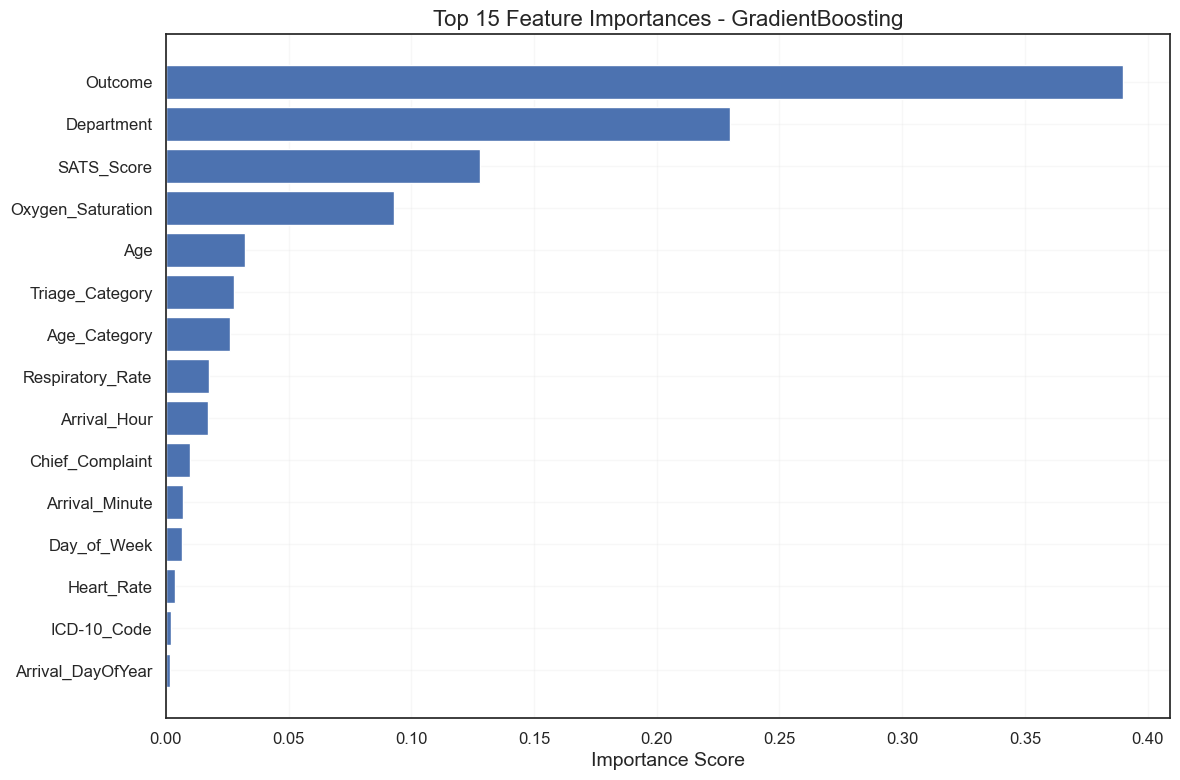


DETAILED PREDICTION ANALYSIS
Mean Prediction Error: 0.52
Std of Prediction Errors: 188.91
Median Absolute Error: 93.97
Max Overprediction: 864.64
Max Underprediction: -1041.73

Absolute Error Percentiles:
25th: 36.54
50th: 93.97
75th: 196.87
90th: 325.31
95th: 409.73
99th: 549.74


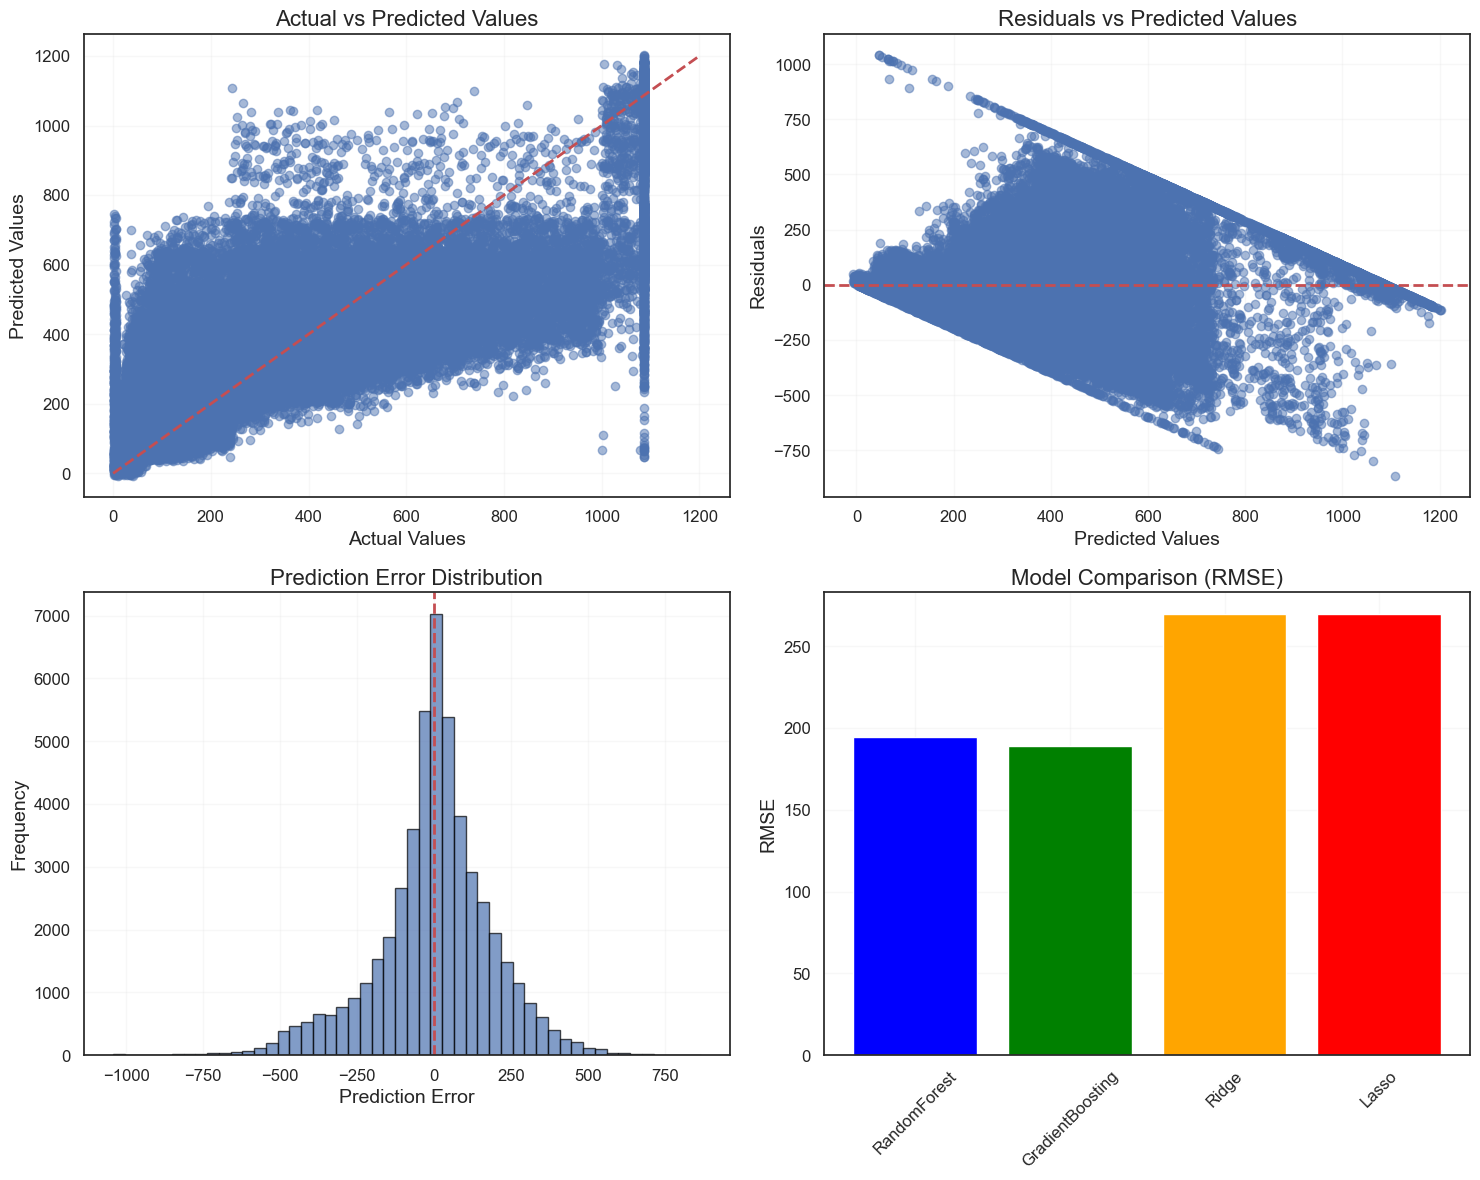


OVERFITTING ANALYSIS
Train RMSE: 188.63
Test RMSE: 188.91
RMSE Gap: -0.28
 Good generalization performance


In [25]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# -----------------------------
# 1. No transformation of target
# -----------------------------
print(f"Target range: [{y.min():.2f}, {y.max():.2f}]")

# -----------------------------
# 2. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3. Define models with optimized parameters
# -----------------------------
models = {
    'RandomForest': RandomForestRegressor(
        random_state=42, 
        n_jobs=-1, 
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features=0.3
    ),
    'GradientBoosting': GradientBoostingRegressor(
        random_state=42,
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8
    ),
    'Ridge': Ridge(alpha=10.0, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42, max_iter=10000)
}

best_models = {}
performance_metrics = {}

# -----------------------------
# 4. Train and evaluate models
# -----------------------------
print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON (NO TRANSFORMATION)")
print("="*60)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create appropriate pipeline
    if name in ['Ridge', 'Lasso']:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    else:
        pipeline = Pipeline([
            ('model', model)
        ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predict (no transformation needed)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Store results
    performance_metrics[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'MAPE': mape
    }
    best_models[name] = pipeline
    
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")

# -----------------------------
# 5. Performance comparison table
# -----------------------------
print("\n" + "="*80)
print("COMPREHENSIVE PERFORMANCE COMPARISON")
print("="*80)

metrics_df = pd.DataFrame(performance_metrics).T
print(metrics_df.round(4))

# -----------------------------
# 6. Select best model
# -----------------------------
best_model_name = min(performance_metrics, key=lambda x: performance_metrics[x]['RMSE'])
best_model = best_models[best_model_name]
best_metrics = performance_metrics[best_model_name]

print(f"\n BEST MODEL: {best_model_name}")
print(f"   RMSE: {best_metrics['RMSE']:.2f}")
print(f"   MAE: {best_metrics['MAE']:.2f}")
print(f"   R²: {best_metrics['R2']:.4f}")
print(f"   MAPE: {best_metrics['MAPE']:.2f}%")

# -----------------------------
# 7. Feature importance analysis
# -----------------------------
tree_model = best_model.named_steps.get('model', None)
if tree_model and hasattr(tree_model, 'feature_importances_'):
    feature_importances = tree_model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values('Importance', ascending=False)
    
    print("\n" + "="*40)
    print("TOP 10 FEATURES BY IMPORTANCE")
    print("="*40)
    print(importance_df.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    plt.barh(top_features['Feature'], top_features['Importance'])
    plt.xlabel('Importance Score')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# -----------------------------
# 8. Detailed analysis of best model predictions
# -----------------------------
print("\n" + "="*50)
print("DETAILED PREDICTION ANALYSIS")
print("="*50)

# Get predictions from best model
y_pred = best_model.predict(X_test)

# Error analysis
errors = y_pred - y_test
abs_errors = np.abs(errors)

print(f"Mean Prediction Error: {errors.mean():.2f}")
print(f"Std of Prediction Errors: {errors.std():.2f}")
print(f"Median Absolute Error: {np.median(abs_errors):.2f}")
print(f"Max Overprediction: {errors.max():.2f}")
print(f"Max Underprediction: {errors.min():.2f}")

# Percentile analysis of errors
error_percentiles = np.percentile(abs_errors, [25, 50, 75, 90, 95, 99])
print(f"\nAbsolute Error Percentiles:")
print(f"25th: {error_percentiles[0]:.2f}")
print(f"50th: {error_percentiles[1]:.2f}")
print(f"75th: {error_percentiles[2]:.2f}")
print(f"90th: {error_percentiles[3]:.2f}")
print(f"95th: {error_percentiles[4]:.2f}")
print(f"99th: {error_percentiles[5]:.2f}")

# -----------------------------
# 9. Visualization
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Actual vs Predicted scatter plot
axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
max_val = max(y_test.max(), y_pred.max())
axes[0, 0].plot([0, max_val], [0, max_val], 'r--', linewidth=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Actual vs Predicted Values')
axes[0, 0].grid(True)

# Residual plot
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Predicted Values')
axes[0, 1].grid(True)

# Error distribution
axes[1, 0].hist(errors, bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Prediction Error')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Prediction Error Distribution')
axes[1, 0].grid(True)

# Model comparison bar chart
models_list = list(performance_metrics.keys())
rmse_values = [performance_metrics[m]['RMSE'] for m in models_list]
axes[1, 1].bar(models_list, rmse_values, color=['blue', 'green', 'orange', 'red'])
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].set_title('Model Comparison (RMSE)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# -----------------------------
# 10. Overfitting check
# -----------------------------
print("\n" + "="*40)
print("OVERFITTING ANALYSIS")
print("="*40)

# Train set performance
y_train_pred = best_model.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = best_metrics['RMSE']

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"RMSE Gap: {train_rmse - test_rmse:.2f}")

if (train_rmse - test_rmse) < -5:  # Train RMSE significantly lower than test RMSE
    print("  Potential overfitting detected!")
elif (train_rmse - test_rmse) > 5:  # Train RMSE higher than test RMSE
    print("  Potential underfitting detected!")
else:
    print(" Good generalization performance")

Target range: [1.00, 1087.50]
Target mean: 347.93, std: 301.76

GRADIENT BOOSTING MODEL COMPARISON (NO TRANSFORMATION)

Training XGBoost...
RMSE: 187.73
MAE: 134.71
R²: 0.6124
MAPE: 189.85%

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 35
[LightGBM] [Info] Start training from score 347.895610
RMSE: 187.76
MAE: 134.72
R²: 0.6123
MAPE: 190.29%

Training CatBoost...
RMSE: 191.19
MAE: 139.01
R²: 0.5980
MAPE: 195.15%

COMPREHENSIVE PERFORMANCE COMPARISON
          RMSE    MAE   R2   MAPE 
XGBoost  187.73 134.71 0.61 189.85
LightGBM 187.76 134.72 0.61 190.29
CatBoost 191.19 139.01 0.60 195.15

 BEST MODEL: XGBoost
   RMSE: 187.73
   MAE: 134.71
   R²: 0.6124
   MAPE: 189.85%


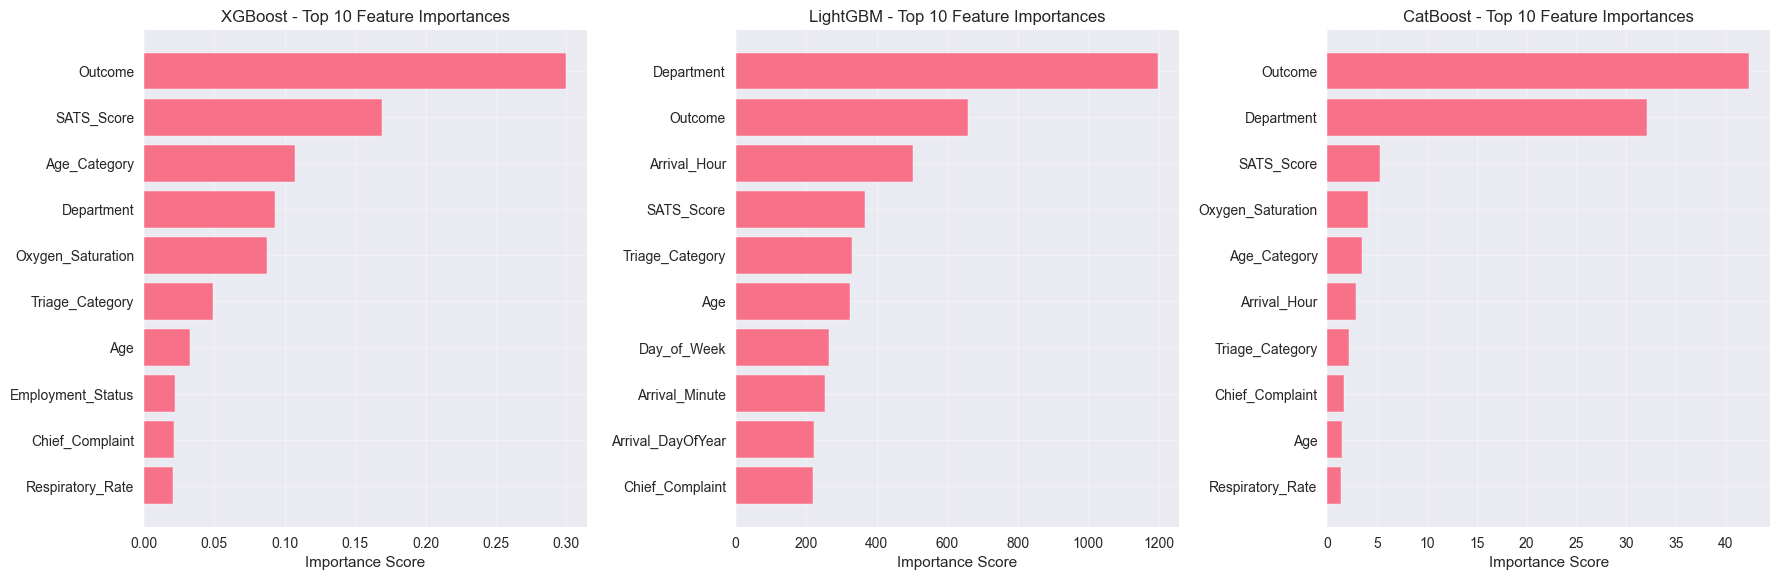


DETAILED PREDICTION ANALYSIS - XGBoost
Mean Prediction Error: 0.40
Std of Prediction Errors: 187.73
Median Absolute Error: 92.07
Max Overprediction: 840.92
Max Underprediction: -1045.91
Mean Absolute Percentage Error: 189.85%

Absolute Error Percentiles:
25th: 35.73
50th: 92.07
75th: 194.99
90th: 323.09
95th: 406.78
99th: 549.10


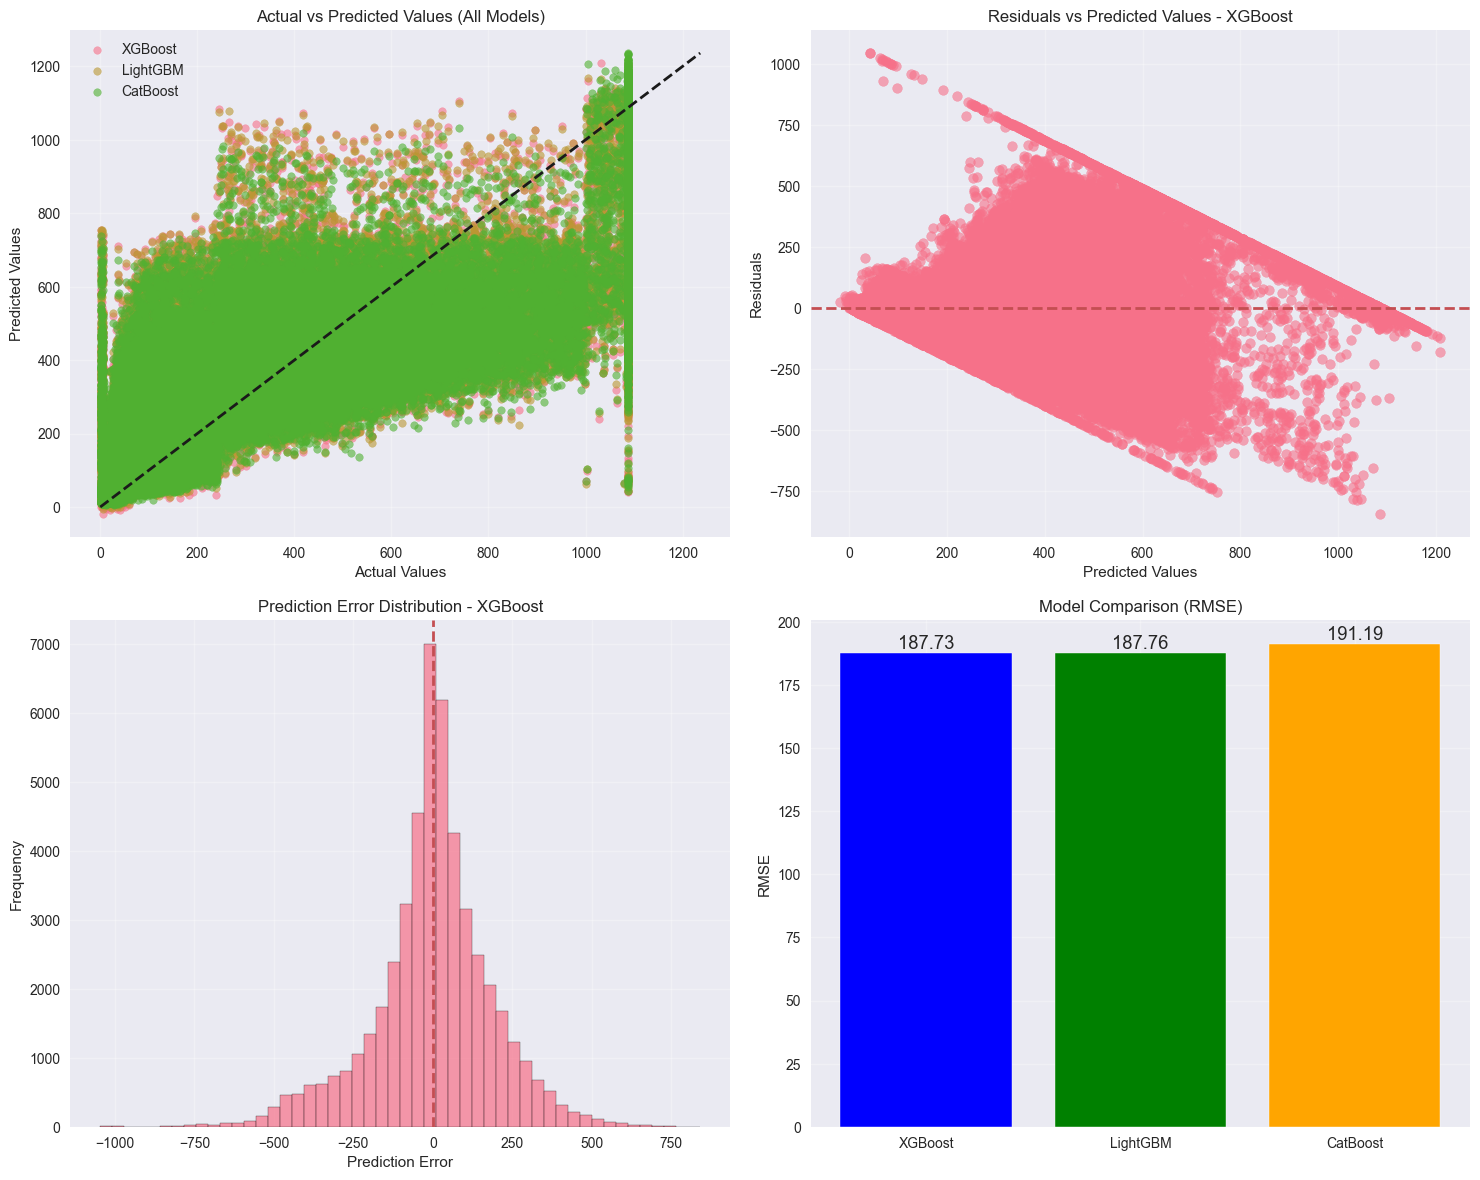


OVERFITTING ANALYSIS

XGBoost:
  Train RMSE: 185.97
  Test RMSE: 187.73
  RMSE Gap: -1.76
   Good generalization performance

LightGBM:
  Train RMSE: 187.58
  Test RMSE: 187.76
  RMSE Gap: -0.18
   Good generalization performance

CatBoost:
  Train RMSE: 192.04
  Test RMSE: 191.19
  RMSE Gap: 0.84
   Good generalization performance


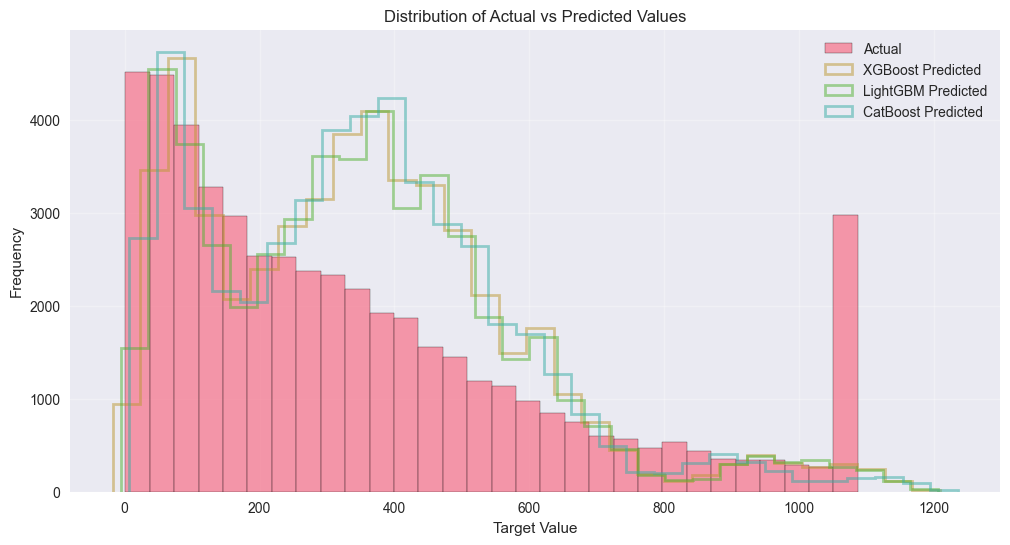


LEARNING CURVE ANALYSIS (SIMPLIFIED)


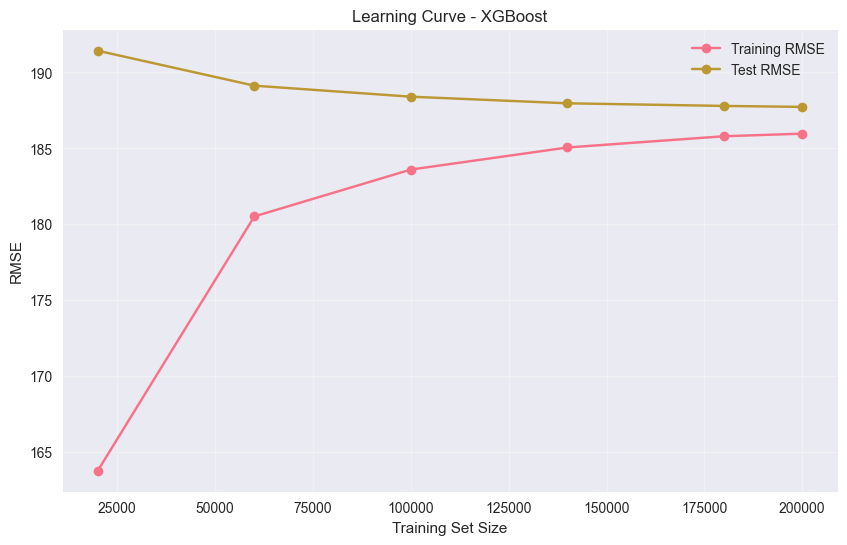

In [26]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.base import clone

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# -----------------------------
# 1. No transformation of target
# -----------------------------
print(f"Target range: [{y.min():.2f}, {y.max():.2f}]")
print(f"Target mean: {y.mean():.2f}, std: {y.std():.2f}")

# -----------------------------
# 2. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3. Define gradient boosting models with correct parameters
# -----------------------------
models = {
    'XGBoost': XGBRegressor(
        random_state=42,
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.1,
        n_jobs=-1
    ),
    'LightGBM': LGBMRegressor(
        random_state=42,
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.1,
        n_jobs=-1
    ),
    'CatBoost': CatBoostRegressor(
        random_state=42,
        iterations=200,  
        learning_rate=0.05,
        depth=6,  
        subsample=0.8,
        colsample_bylevel=0.8,  
        l2_leaf_reg=0.1,  
        verbose=0,  
        thread_count=-1
    )
}

best_models = {}
performance_metrics = {}
predictions = {}

# -----------------------------
# 4. Train and evaluate models
# -----------------------------
print("\n" + "="*60)
print("GRADIENT BOOSTING MODEL COMPARISON (NO TRANSFORMATION)")
print("="*60)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create pipeline (no scaling for tree-based models)
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1))) * 100
    
    # Store results
    performance_metrics[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'MAPE': mape
    }
    best_models[name] = pipeline
    predictions[name] = y_pred
    
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")

# -----------------------------
# 5. Performance comparison table
# -----------------------------
print("\n" + "="*80)
print("COMPREHENSIVE PERFORMANCE COMPARISON")
print("="*80)

metrics_df = pd.DataFrame(performance_metrics).T
print(metrics_df.round(4))

# -----------------------------
# 6. Select best model
# -----------------------------
best_model_name = min(performance_metrics, key=lambda x: performance_metrics[x]['RMSE'])
best_model = best_models[best_model_name]
best_metrics = performance_metrics[best_model_name]

print(f"\n BEST MODEL: {best_model_name}")
print(f"   RMSE: {best_metrics['RMSE']:.2f}")
print(f"   MAE: {best_metrics['MAE']:.2f}")
print(f"   R²: {best_metrics['R2']:.4f}")
print(f"   MAPE: {best_metrics['MAPE']:.2f}%")

# -----------------------------
# 7. Feature importance analysis for all models
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (name, model) in enumerate(best_models.items()):
    # Get feature importances
    if hasattr(model.named_steps['model'], 'feature_importances_'):
        feature_importances = model.named_steps['model'].feature_importances_
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': feature_importances
        }).sort_values('Importance', ascending=False)
        
        # Plot top 10 features
        top_features = importance_df.head(10)
        axes[i].barh(top_features['Feature'], top_features['Importance'])
        axes[i].set_xlabel('Importance Score')
        axes[i].set_title(f'{name} - Top 10 Feature Importances')
        axes[i].invert_yaxis()

plt.tight_layout()
plt.show()

# -----------------------------
# 8. Detailed analysis of best model predictions
# -----------------------------
print("\n" + "="*50)
print(f"DETAILED PREDICTION ANALYSIS - {best_model_name}")
print("="*50)

# Get predictions from best model
y_pred = best_model.predict(X_test)

# Error analysis
errors = y_pred - y_test
abs_errors = np.abs(errors)
relative_errors = np.abs(errors) / np.maximum(np.abs(y_test), 1)  # Avoid division by zero

print(f"Mean Prediction Error: {errors.mean():.2f}")
print(f"Std of Prediction Errors: {errors.std():.2f}")
print(f"Median Absolute Error: {np.median(abs_errors):.2f}")
print(f"Max Overprediction: {errors.max():.2f}")
print(f"Max Underprediction: {errors.min():.2f}")
print(f"Mean Absolute Percentage Error: {np.mean(relative_errors) * 100:.2f}%")

# Percentile analysis of errors
error_percentiles = np.percentile(abs_errors, [25, 50, 75, 90, 95, 99])
print(f"\nAbsolute Error Percentiles:")
print(f"25th: {error_percentiles[0]:.2f}")
print(f"50th: {error_percentiles[1]:.2f}")
print(f"75th: {error_percentiles[2]:.2f}")
print(f"90th: {error_percentiles[3]:.2f}")
print(f"95th: {error_percentiles[4]:.2f}")
print(f"99th: {error_percentiles[5]:.2f}")

# -----------------------------
# 9. Visualization
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Actual vs Predicted scatter plot for all models
for name, y_pred in predictions.items():
    axes[0, 0].scatter(y_test, y_pred, alpha=0.6, label=name, s=30)

max_val = max(y_test.max(), max([pred.max() for pred in predictions.values()]))
axes[0, 0].plot([0, max_val], [0, max_val], 'k--', linewidth=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Actual vs Predicted Values (All Models)')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Residual plot for best model
residuals = y_test - predictions[best_model_name]
axes[0, 1].scatter(predictions[best_model_name], residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title(f'Residuals vs Predicted Values - {best_model_name}')
axes[0, 1].grid(True)

# Error distribution for best model
axes[1, 0].hist(errors, bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Prediction Error')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title(f'Prediction Error Distribution - {best_model_name}')
axes[1, 0].grid(True)

# Model comparison bar chart
models_list = list(performance_metrics.keys())
rmse_values = [performance_metrics[m]['RMSE'] for m in models_list]
bars = axes[1, 1].bar(models_list, rmse_values, color=['blue', 'green', 'orange'])
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].set_title('Model Comparison (RMSE)')

# Add value labels on bars
for bar, value in zip(bars, rmse_values):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                   f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# -----------------------------
# 10. Overfitting check for all models
# -----------------------------
print("\n" + "="*40)
print("OVERFITTING ANALYSIS")
print("="*40)

for name, model in best_models.items():
    # Train set performance
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = performance_metrics[name]['RMSE']
    
    print(f"\n{name}:")
    print(f"  Train RMSE: {train_rmse:.2f}")
    print(f"  Test RMSE: {test_rmse:.2f}")
    print(f"  RMSE Gap: {train_rmse - test_rmse:.2f}")
    
    if (train_rmse - test_rmse) < -5:  # Train RMSE significantly lower than test RMSE
        print("    Potential overfitting detected!")
    elif (train_rmse - test_rmse) > 5:  # Train RMSE higher than test RMSE
        print("    Potential underfitting detected!")
    else:
        print("   Good generalization performance")

# -----------------------------
# 11. Prediction distribution comparison
# -----------------------------
plt.figure(figsize=(12, 6))

# Plot distribution of actual values
plt.hist(y_test, bins=30, alpha=0.7, label='Actual', edgecolor='black')

# Plot distribution of predictions for each model
for name, y_pred in predictions.items():
    plt.hist(y_pred, bins=30, alpha=0.5, label=f'{name} Predicted', histtype='step', linewidth=2)

plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# -----------------------------
# 12. Learning curve analysis (simplified)
# -----------------------------
print("\n" + "="*40)
print("LEARNING CURVE ANALYSIS (SIMPLIFIED)")
print("="*40)

# Evaluate model performance on different training set sizes
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
train_scores = []
test_scores = []

for size in train_sizes:
    # Sample subset of training data
    n_samples = int(len(X_train) * size)
    X_subset = X_train.iloc[:n_samples]
    y_subset = y_train.iloc[:n_samples]
    
    # Create a new instance of the best model
    model_clone = best_models[best_model_name].named_steps['model']
    model_clone = clone(model_clone)
    
    # Train model
    model_clone.fit(X_subset, y_subset)
    
    # Evaluate
    train_score = np.sqrt(mean_squared_error(y_subset, model_clone.predict(X_subset)))
    test_score = np.sqrt(mean_squared_error(y_test, model_clone.predict(X_test)))
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot([int(len(X_train) * s) for s in train_sizes], train_scores, 'o-', label='Training RMSE')
plt.plot([int(len(X_train) * s) for s in train_sizes], test_scores, 'o-', label='Test RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title(f'Learning Curve - {best_model_name}')
plt.legend()
plt.grid(True)
plt.show()

# Final Model XGBoost 

Target range: [1.00, 1087.50]
Target mean: 347.93, std: 301.76
Training optimized XGBoost with best parameters...
[0]	validation_0-rmse:294.19314
[100]	validation_0-rmse:189.55951
[200]	validation_0-rmse:187.72361
[300]	validation_0-rmse:187.49862
[349]	validation_0-rmse:187.49788

OPTIMIZED XGBOOST PERFORMANCE:
   Training RMSE: 183.12
   Test RMSE: 187.50
   MAE: 134.41
   R²: 0.6134
   MAPE: 189.26%

HEALTHCARE-SPECIFIC BUSINESS METRICS:
   Predictions within clinical significance (±150.77): 66.5%
   Predictions within critical threshold (±301.54): 88.2%

 Performance by Risk Category:
              Error                Actual
               mean   std   count   mean 
Risk_Category                            
Low            91.89 113.38  12524  51.98
Medium        121.04 112.22  12484 180.28
High          107.53  94.84  12530 371.16
Very High     217.55 156.08  12462 790.48

 COST-BENEFIT ANALYSIS:
   Underestimation cases: 8036 (Cost: R8,036,000)
   Overestimation cases: 8709 (Cost

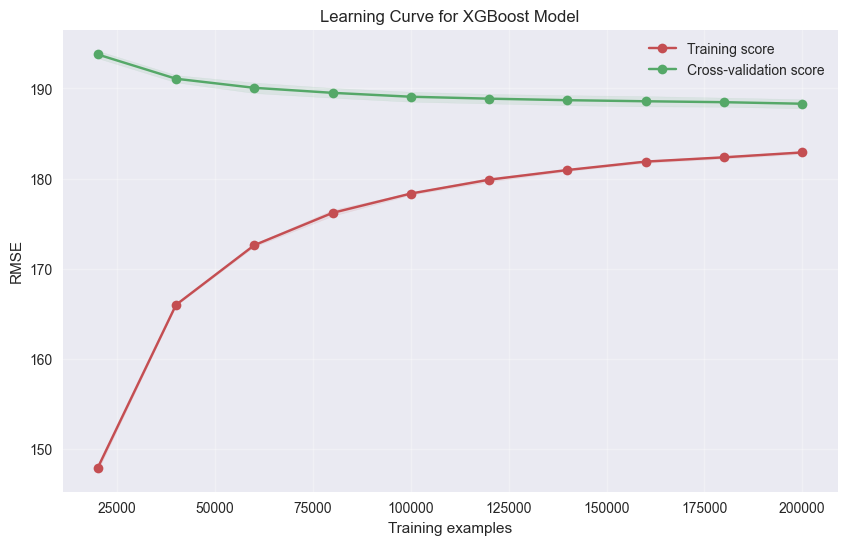

   Final training RMSE: 182.90
   Final validation RMSE: 188.30
   Generalization gap: -5.40
   Good generalization performance

HETEROSCEDASTICITY ANALYSIS:


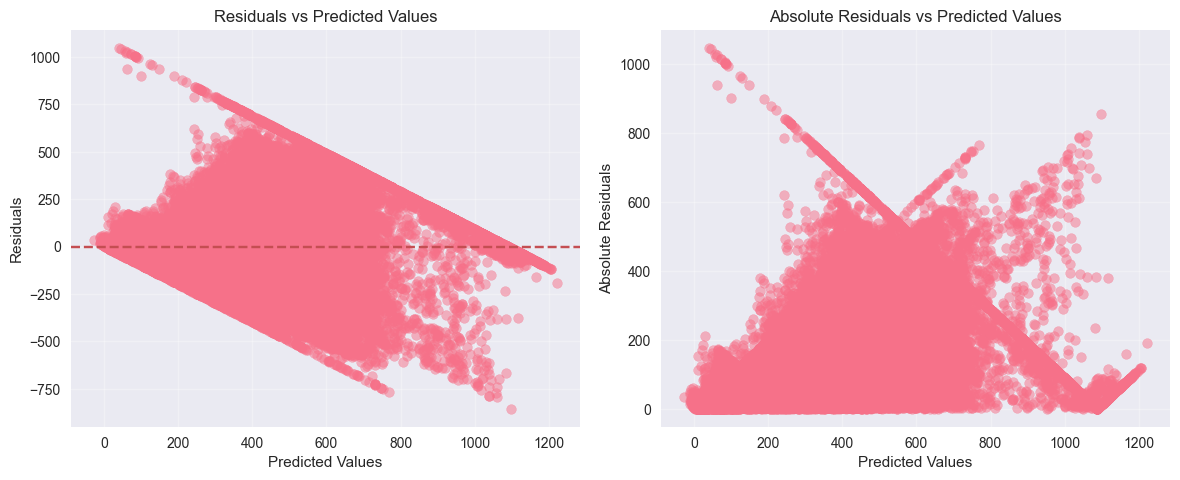

   Correlation between predictions and absolute residuals: 0.425
   Consider applying transformations or using weighted regression


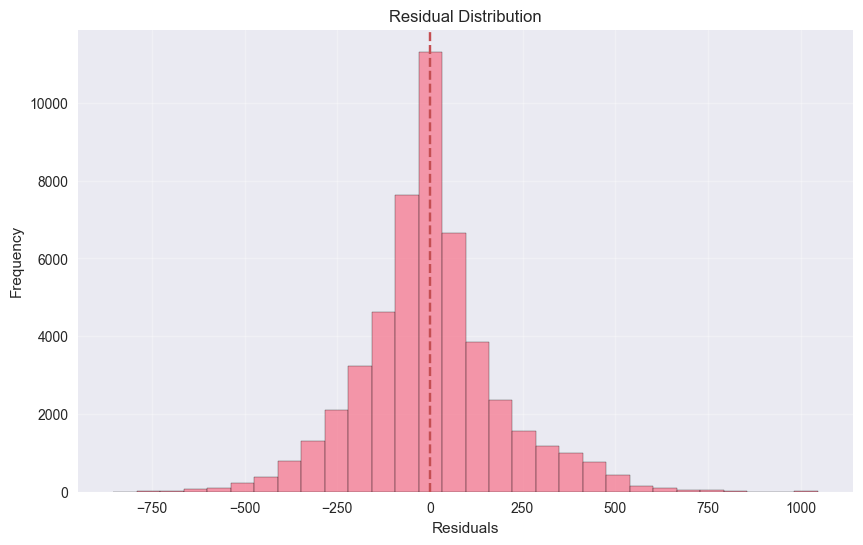

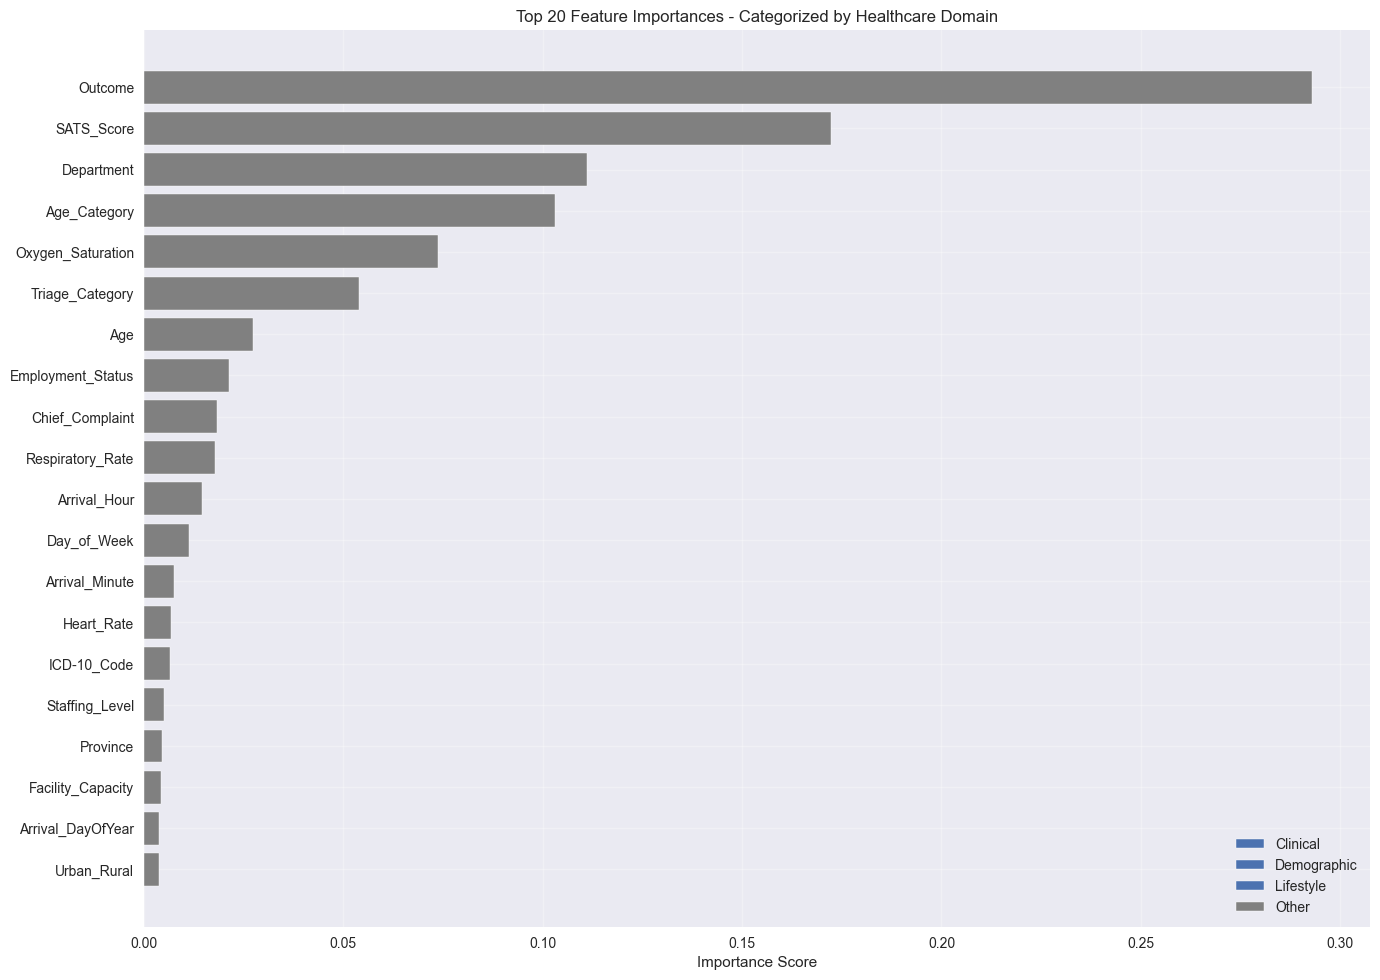


Error Analysis by Risk Category:
              abs_error                true 
                 mean    std   count   mean 
risk_category                               
Low              91.89  113.38  12524  51.98
Medium          121.04  112.22  12484 180.28
High            107.53   94.84  12530 371.16
Very High       217.55  156.08  12462 790.48


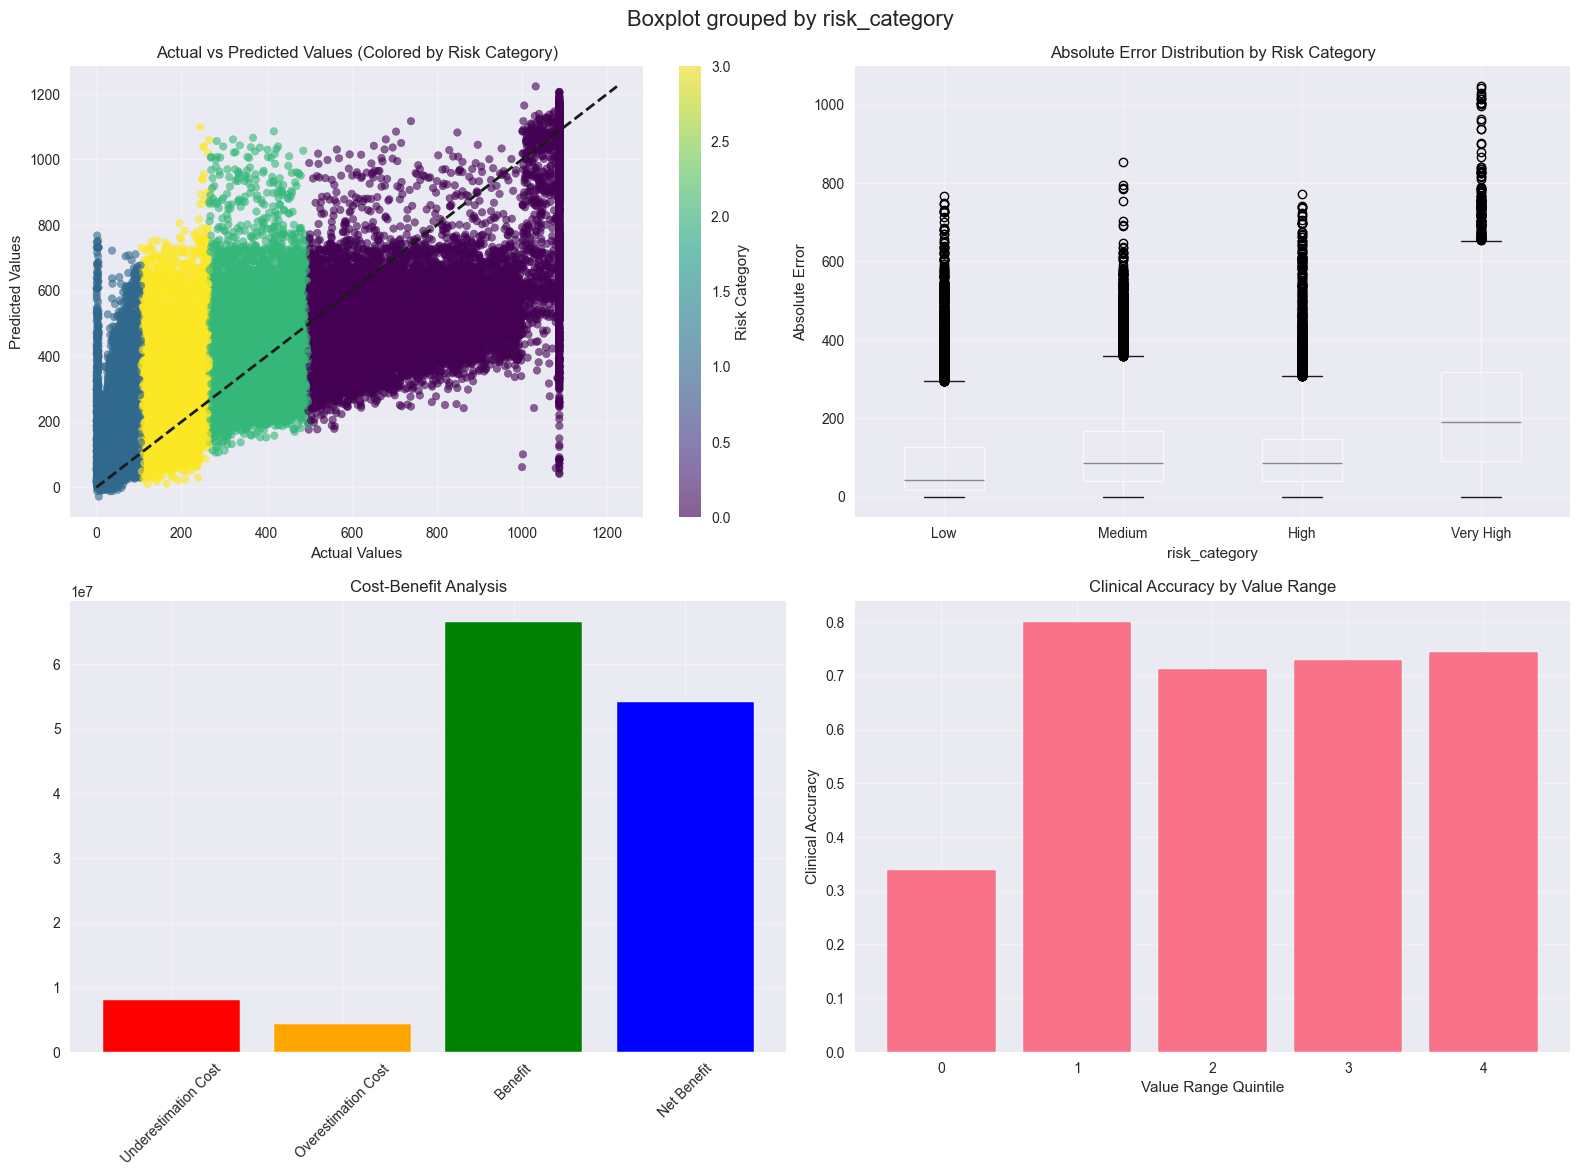


HEALTHCARE BUSINESS INSIGHTS REPORT

KEY BUSINESS METRICS:
  Clinical accuracy: 66.5%
  False negative rate: 16.1%
  False positive rate: 17.4%
  Net financial impact: $54,119,500

PERFORMANCE BY RISK CATEGORY:
  Low risk: Average error = 91.89
  Medium risk: Average error = 121.04
  High risk: Average error = 107.53
  Very High risk: Average error = 217.55

BUSINESS RECOMMENDATIONS:
1. Warning: Model may not be clinically reliable enough for direct patient care
   -> Consider using for screening rather than diagnosis
   -> Implement human oversight for all predictions
2. Warning: High false negative rate - risk of missing critical cases
   -> Lower prediction threshold for high-risk detection
   -> Implement additional screening for borderline cases
3. Positive ROI demonstrated - proceed with implementation
4. Focus feature engineering on top clinical predictors
5. Implement continuous monitoring of model performance by risk category
6. Develop clinician feedback loop for model impro

In [36]:
import time
import joblib


# 1. Load and prepare data
# -----------------------------
# Assuming X and y are already loaded
print(f"Target range: [{y.min():.2f}, {y.max():.2f}]")
print(f"Target mean: {y.mean():.2f}, std: {y.std():.2f}")

# -----------------------------
# 2. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3. Train Optimized Model with Best Parameters
# -----------------------------
best_params = {
    "random_state": 42,
    "n_estimators": 350,
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "reg_alpha": 0.1,
    "reg_lambda": 0.1,
    "n_jobs": -1,
    'eval_metric': 'rmse',
}

print("Training optimized XGBoost with best parameters...")
start_time = time.time()

xgb_optimized = XGBRegressor(**best_params)

# Fit the model
xgb_optimized.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=100
)

training_time = time.time() - start_time

# -----------------------------
# 4. Evaluate Optimized Model
# -----------------------------
y_pred_train = xgb_optimized.predict(X_train)
y_pred = xgb_optimized.predict(X_test)

# Calculate metrics for both train and test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1))) * 100

print(f"\nOPTIMIZED XGBOOST PERFORMANCE:")
print(f"   Training RMSE: {rmse_train:.2f}")
print(f"   Test RMSE: {rmse_test:.2f}")
print(f"   MAE: {mae:.2f}")
print(f"   R²: {r2:.4f}")
print(f"   MAPE: {mape:.2f}%")

# -----------------------------
# 4.1 Healthcare-Specific Business Metrics
# -----------------------------
print(f"\nHEALTHCARE-SPECIFIC BUSINESS METRICS:")

# Define clinically significant error thresholds
clinical_threshold = y_test.std() * 0.5  # 50% of standard deviation
critical_threshold = y_test.std() * 1.0  # 100% of standard deviation

# Calculate percentage of predictions within clinical thresholds
within_clinical = np.mean(np.abs(y_test - y_pred) <= clinical_threshold) * 100
within_critical = np.mean(np.abs(y_test - y_pred) <= critical_threshold) * 100

print(f"   Predictions within clinical significance (±{clinical_threshold:.2f}): {within_clinical:.1f}%")
print(f"   Predictions within critical threshold (±{critical_threshold:.2f}): {within_critical:.1f}%")

# Risk stratification analysis
risk_categories = pd.qcut(y_test, q=4, labels=['Low', 'Medium', 'High', 'Very High'])
category_performance = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Risk_Category': risk_categories,
    'Error': np.abs(y_test - y_pred)
})

# Performance by risk category
category_stats = category_performance.groupby('Risk_Category').agg({
    'Error': ['mean', 'std', 'count'],
    'Actual': 'mean'
}).round(2)

print(f"\n Performance by Risk Category:")
print(category_stats)

# -----------------------------
# 4.2 Cost-Benefit Analysis for Healthcare
# -----------------------------
print(f"\n COST-BENEFIT ANALYSIS:")

# Define cost parameters (example values - adjust based on actual business case)
false_underestimation_cost = 1000  # Cost of underestimating risk
false_overestimation_cost = 500    # Cost of overestimating risk
correct_prediction_benefit = 2000  # Benefit of correct prediction

# Calculate costs and benefits
underestimation_mask = (y_pred < y_test) & (np.abs(y_test - y_pred) > clinical_threshold)
overestimation_mask = (y_pred > y_test) & (np.abs(y_test - y_pred) > clinical_threshold)
correct_mask = np.abs(y_test - y_pred) <= clinical_threshold

total_underestimation_cost = np.sum(underestimation_mask) * false_underestimation_cost
total_overestimation_cost = np.sum(overestimation_mask) * false_overestimation_cost
total_benefit = np.sum(correct_mask) * correct_prediction_benefit

net_benefit = total_benefit - total_underestimation_cost - total_overestimation_cost

print(f"   Underestimation cases: {np.sum(underestimation_mask)} (Cost: R{total_underestimation_cost:,.0f})")
print(f"   Overestimation cases: {np.sum(overestimation_mask)} (Cost: R{total_overestimation_cost:,.0f})")
print(f"   Correct predictions: {np.sum(correct_mask)} (Benefit: R{total_benefit:,.0f})")
print(f"   Net benefit: R{net_benefit:,.0f}")

# -----------------------------
# 4.3 Decision Support Metrics
# -----------------------------
print(f"\n DECISION SUPPORT METRICS:")

# Calculate precision for different risk thresholds
high_risk_threshold = y_test.quantile(0.75)
predicted_high_risk = y_pred > high_risk_threshold
actual_high_risk = y_test > high_risk_threshold

precision_high_risk = np.sum(predicted_high_risk & actual_high_risk) / np.sum(predicted_high_risk)
recall_high_risk = np.sum(predicted_high_risk & actual_high_risk) / np.sum(actual_high_risk)

print(f"   High-risk detection precision: {precision_high_risk:.3f}")
print(f"   High-risk detection recall: {recall_high_risk:.3f}")

# -----------------------------
# 5. Learning Curve Analysis
# -----------------------------
print(f"\nLEARNING CURVE ANALYSIS:")

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    xgb_optimized, X, y, cv=5, scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and standard deviation
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("RMSE")
plt.title("Learning Curve for XGBoost Model")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Check for overfitting/underfitting
final_train_score = train_scores_mean[-1]
final_test_score = test_scores_mean[-1]
gap = final_train_score - final_test_score

print(f"   Final training RMSE: {final_train_score:.2f}")
print(f"   Final validation RMSE: {final_test_score:.2f}")
print(f"   Generalization gap: {gap:.2f}")

if gap > final_test_score * 0.1:
    print("   Warning: Potential overfitting (large gap between training and validation performance)")
elif final_train_score > rmse_test * 1.1:
    print("   Warning: Potential underfitting (both training and validation errors are high)")
else:
    print("   Good generalization performance")

# -----------------------------
# 6. Heteroscedasticity Check
# -----------------------------
print(f"\nHETEROSCEDASTICITY ANALYSIS:")

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Plot absolute residuals vs predicted values (to check for heteroscedasticity)
plt.subplot(1, 2, 2)
plt.scatter(y_pred, np.abs(residuals), alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Absolute Residuals vs Predicted Values')

plt.tight_layout()
plt.show()

# Statistical test for heteroscedasticity (Breusch-Pagan test approximation)
# For simplicity, we'll use a correlation-based check
residual_correlation = np.corrcoef(y_pred, np.abs(residuals))[0, 1]
print(f"   Correlation between predictions and absolute residuals: {residual_correlation:.3f}")

if abs(residual_correlation) > 0.2:
    print("   Warning: Potential heteroscedasticity detected")
    print("   Consider applying transformations or using weighted regression")
else:
    print("   No significant heteroscedasticity detected")

# Check residual distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# -----------------------------
# 7. Feature Importance with Healthcare Context
# -----------------------------
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_optimized.feature_importances_
}).sort_values('Importance', ascending=False)

# Categorize features by clinical relevance (example - adjust based on your domain)
clinical_features = ['age', 'blood_pressure', 'cholesterol', 'bmi']  # Example clinical features
demographic_features = ['gender', 'ethnicity', 'income']  # Example demographic features
lifestyle_features = ['smoking', 'exercise', 'diet']  # Example lifestyle features

feature_importance['Category'] = 'Other'
feature_importance.loc[feature_importance['Feature'].isin(clinical_features), 'Category'] = 'Clinical'
feature_importance.loc[feature_importance['Feature'].isin(demographic_features), 'Category'] = 'Demographic'
feature_importance.loc[feature_importance['Feature'].isin(lifestyle_features), 'Category'] = 'Lifestyle'

plt.figure(figsize=(14, 10))
colors = {'Clinical': 'red', 'Demographic': 'blue', 'Lifestyle': 'green', 'Other': 'gray'}
for category, color in colors.items():
    mask = feature_importance['Category'] == category
    plt.barh(feature_importance[mask]['Feature'][:20], 
             feature_importance[mask]['Importance'][:20], 
             color=color, label=category)

plt.xlabel('Importance Score')
plt.title('Top 20 Feature Importances - Categorized by Healthcare Domain')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# -----------------------------
# 8. Error Analysis with Clinical Context
# -----------------------------
error_analysis = pd.DataFrame({
    'true': y_test,
    'pred': y_pred,
    'error': y_pred - y_test,
    'abs_error': np.abs(y_pred - y_test),
    'risk_category': risk_categories
})

# Analyze errors by risk category
category_error_stats = error_analysis.groupby('risk_category').agg({
    'abs_error': ['mean', 'std', 'count'],
    'true': 'mean'
}).round(2)

print(f"\nError Analysis by Risk Category:")
print(category_error_stats)

# -----------------------------
# 9. Healthcare Visualizations
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Actual vs Predicted with risk categories
scatter = axes[0, 0].scatter(y_test, y_pred, c=pd.factorize(risk_categories)[0], 
                           alpha=0.6, s=30, cmap='viridis')
max_val = max(y_test.max(), y_pred.max())
axes[0, 0].plot([0, max_val], [0, max_val], 'k--', linewidth=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Actual vs Predicted Values (Colored by Risk Category)')
axes[0, 0].grid(True)
plt.colorbar(scatter, ax=axes[0, 0], label='Risk Category')

# Error distribution by risk category
error_analysis.boxplot(column='abs_error', by='risk_category', ax=axes[0, 1])
axes[0, 1].set_title('Absolute Error Distribution by Risk Category')
axes[0, 1].set_ylabel('Absolute Error')
axes[0, 1].grid(True)

# Cost-benefit analysis visualization
cost_data = [total_underestimation_cost, total_overestimation_cost, total_benefit, net_benefit]
cost_labels = ['Underestimation Cost', 'Overestimation Cost', 'Benefit', 'Net Benefit']
colors = ['red', 'orange', 'green', 'blue']
axes[1, 0].bar(cost_labels, cost_data, color=colors)
axes[1, 0].set_title('Cost-Benefit Analysis')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True)

# Clinical accuracy by value range
clinical_accuracy = []
value_ranges = pd.qcut(y_test, q=5)
for range_val in value_ranges.unique():
    mask = (value_ranges == range_val)
    accuracy = np.mean(np.abs(y_test[mask] - y_pred[mask]) <= clinical_threshold)
    clinical_accuracy.append(accuracy)

axes[1, 1].bar(range(len(clinical_accuracy)), clinical_accuracy)
axes[1, 1].set_title('Clinical Accuracy by Value Range')
axes[1, 1].set_xlabel('Value Range Quintile')
axes[1, 1].set_ylabel('Clinical Accuracy')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# -----------------------------
# 10. Healthcare Business Recommendations
# -----------------------------
print(f"\n" + "="*60)
print("HEALTHCARE BUSINESS INSIGHTS REPORT")
print("="*60)

# Calculate key business metrics
false_negative_rate = np.sum(underestimation_mask) / len(y_test) * 100
false_positive_rate = np.sum(overestimation_mask) / len(y_test) * 100

print(f"\nKEY BUSINESS METRICS:")
print(f"  Clinical accuracy: {within_clinical:.1f}%")
print(f"  False negative rate: {false_negative_rate:.1f}%")
print(f"  False positive rate: {false_positive_rate:.1f}%")
print(f"  Net financial impact: ${net_benefit:,.0f}")

print(f"\nPERFORMANCE BY RISK CATEGORY:")
for category in category_stats.index:
    avg_error = category_stats.loc[category, ('Error', 'mean')]
    print(f"  {category} risk: Average error = {avg_error:.2f}")

print(f"\nBUSINESS RECOMMENDATIONS:")

# Recommendation based on performance
if within_clinical < 80:
    print("1. Warning: Model may not be clinically reliable enough for direct patient care")
    print("   -> Consider using for screening rather than diagnosis")
    print("   -> Implement human oversight for all predictions")
else:
    print("1. Model meets clinical accuracy standards for assisted decision-making")

if false_negative_rate > 5:
    print("2. Warning: High false negative rate - risk of missing critical cases")
    print("   -> Lower prediction threshold for high-risk detection")
    print("   -> Implement additional screening for borderline cases")

if net_benefit < 0:
    print("3. Warning: Negative net financial impact")
    print("   -> Re-evaluate cost parameters and business case")
    print("   -> Consider different deployment strategy")
else:
    print("3. Positive ROI demonstrated - proceed with implementation")

print("4. Focus feature engineering on top clinical predictors")
print("5. Implement continuous monitoring of model performance by risk category")
print("6. Develop clinician feedback loop for model improvement")
print("7. Consider ethical implications of demographic feature usage")

print(f"\nModel training time: {training_time:.2f} seconds")

# -----------------------------
# 11. Save Final Model with Business Metadata
# -----------------------------
model_metadata = {
    'training_date': pd.Timestamp.now(),
    'clinical_accuracy': within_clinical,
    'net_benefit': net_benefit,
    'feature_importance': feature_importance.to_dict(),
    'business_recommendations': [
        "Monitor performance by risk category",
        "Implement clinician feedback system",
        "Regularly update cost-benefit analysis"
    ]
}

joblib.dump({
    'model': xgb_optimized,
    'metadata': model_metadata,
    'feature_names': X.columns.tolist()
}, 'xgboost_healthcare_optimized.pkl')

print("\nFinal healthcare-optimized model saved with business metadata")

#  UbuntuCare Smarter Wait Times – Final Summary & Recommendations

---

## **Final Conclusion**

- **Demographics:**  
  - Older patients (40+) and males face longer waits (~10–36 mins longer).  
  - Rural facilities have +8 mins longer waits than urban.  
  - Employment status affects wait times more than insurance coverage.  

- **Facilities & Capacity:**  
  - Large, high-capacity, and well-staffed facilities often have longer waits due to complex cases.  
  - Outliers exist (e.g., S Biko Academic median wait 520 mins).  

- **Clinical Factors:**  
  - High-risk patients (abnormal vitals, high SATS) are prioritized.  
  - Chronic-condition patients (diabetes, hypertension) face longest waits (>500 mins).  
  - ICD-10 codes like E11.9 (diabetes) strongly associate with delays.  

- **Temporal & Operational Patterns:**  
  - Weekend waits: +20% (~50 mins longer).  
  - Peak hours: 10–11 AM longest waits (>330 mins), afternoons 12–5 PM challenging.  
  - Winter shows shorter waits despite high patient volume.  
  - Overnight (0–6 AM) flows most efficiently.  

- **Predictive Modeling:**  
  - XGBoost model: R² ≈ 0.62, MAE ≈ 134 mins, net financial benefit $54.1M.  
  - Useful for screening & scheduling, not direct clinical decision-making.  

---

## **Recommendations**

### ** Facility & Patient Targeting**
- Focus interventions on facilities with extreme waits.  
- Develop age-specific strategies for older patients.  
- Reduce rural–urban disparities in access & efficiency.  

### ** Operational Efficiency**
- Optimize staffing vs. patient complexity.  
- Address weekend, midday, and year-end bottlenecks.  
- Apply best practices from high-efficiency periods (overnight/winter).  

### ** Clinical & Risk Management**
- Prioritize chronic-condition patients for flow improvement.  
- Maintain triage for high-risk patients.  
- Create clinician feedback loops for continuous improvement.  

### ** Predictive Modeling & Decision Support**
- Use XGBoost for screening & scheduling, not direct care.  
- Apply human oversight for high-risk/borderline cases.  
- Monitor performance by risk category & refine top clinical predictors.  
- Ensure ethical use of demographic features.  

### ** Continuous Monitoring**
- Track KPIs: median wait times, patient satisfaction, risk-based prioritization.  
- Analyze seasonal, daily, yearly trends to anticipate bottlenecks.  
- Balance financial, operational, and clinical metrics for sustainable improvement.  

---

 **Bottom line:**  
Implementing targeted operational, clinical, and predictive strategies can **reduce waiting times, improve fairness, and enhance patient satisfaction** while maintaining safe, efficient care.
